## Business Problem

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

So we need to analyse telecom industry data and predict high value customers who are at high risk of churn and identify main indicators of churn

#### Contributors :  Subhabrata Ghosh / Anusaa Vemuri

In [1]:
## Ignoring warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
## Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
## Setting the max display options
pd.set_option('display.max_columns',230)
pd.set_option('display.max_rows',230)

## 01. Data Import

In [4]:
## Let's import the data into the notebook and check the dimension of the data
df_churn= pd.read_csv('telecom_churn_data.csv')

In [5]:
## Let's have a preview of the data
df_churn.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [6]:
## Let's have a look at the shape of the data
df_churn.shape

(99999, 226)

In [7]:
## Let's check for the column info
df_churn.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [8]:
## Let's try to get more insight of the numerical features
df_churn.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

In [9]:
## Let's check for any duplicate data by mobile_number
original_rows = df_churn.shape[0]
print(df_churn.shape[0])
print(len(df_churn.mobile_number.unique()))

99999
99999


**Observation**
- We don't have any duplicate record in the dataset

In [10]:
## Let's check the features presents in the dataset
pd.DataFrame(df_churn.columns)

0
0               mobile_number
1                   circle_id
2              loc_og_t2o_mou
3              std_og_t2o_mou
4              loc_ic_t2o_mou
5        last_date_of_month_6
6        last_date_of_month_7
7        last_date_of_month_8
8        last_date_of_month_9
9                      arpu_6
10                     arpu_7
11                     arpu_8
12                     arpu_9
13                onnet_mou_6
14                onnet_mou_7
15                onnet_mou_8
16                onnet_mou_9
17               offnet_mou_6
18               offnet_mou_7
19               offnet_mou_8
20               offnet_mou_9
21              roam_ic_mou_6
22              roam_ic_mou_7
23              roam_ic_mou_8
24              roam_ic_mou_9
25              roam_og_mou_6
26              roam_og_mou_7
27              roam_og_mou_8
28              roam_og_mou_9
29           loc_og_t2t_mou_6
30           loc_og_t2t_mou_7
31           loc_og_t2t_mou_8
32           loc_og_t2t_mou_9
33           loc_og_t2m_mou_6
34           loc_og_t2m_mou_7
35           loc_og_t2m_mou_8
36           loc_og_t2m_mou_9
37           loc_og_t2f_mou_6
38           loc_og_t2f_mou_7
39           loc_og_t2f_mou_8
40           loc_og_t2f_mou_9
41           loc_og_t2c_mou_6
42           loc_og_t2c_mou_7
43           loc_og_t2c_mou_8
44           loc_og_t2c_mou_9
45               loc_og_mou_6
46               loc_og_mou_7
47               loc_og_mou_8
48               loc_og_mou_9
49           std_og_t2t_mou_6
50           std_og_t2t_mou_7
51           std_og_t2t_mou_8
52           std_og_t2t_mou_9
53           std_og_t2m_mou_6
54           std_og_t2m_mou_7
55           std_og_t2m_mou_8
56           std_og_t2m_mou_9
57           std_og_t2f_mou_6
58           std_og_t2f_mou_7
59           std_og_t2f_mou_8
60           std_og_t2f_mou_9
61           std_og_t2c_mou_6
62           std_og_t2c_mou_7
63           std_og_t2c_mou_8
64           std_og_t2c_mou_9
65               std_og_mou_6
66               std_og_mou_7
67               std_og_mou_8
68               std_og_mou_9
69               isd_og_mou_6
70               isd_og_mou_7
71               isd_og_mou_8
72               isd_og_mou_9
73               spl_og_mou_6
74               spl_og_mou_7
75               spl_og_mou_8
76               spl_og_mou_9
77                og_others_6
78                og_others_7
79                og_others_8
80                og_others_9
81             total_og_mou_6
82             total_og_mou_7
83             total_og_mou_8
84             total_og_mou_9
85           loc_ic_t2t_mou_6
86           loc_ic_t2t_mou_7
87           loc_ic_t2t_mou_8
88           loc_ic_t2t_mou_9
89           loc_ic_t2m_mou_6
90           loc_ic_t2m_mou_7
91           loc_ic_t2m_mou_8
92           loc_ic_t2m_mou_9
93           loc_ic_t2f_mou_6
94           loc_ic_t2f_mou_7
95           loc_ic_t2f_mou_8
96           loc_ic_t2f_mou_9
97               loc_ic_mou_6
98               loc_ic_mou_7
99               loc_ic_mou_8
100              loc_ic_mou_9
101          std_ic_t2t_mou_6
102          std_ic_t2t_mou_7
103          std_ic_t2t_mou_8
104          std_ic_t2t_mou_9
105          std_ic_t2m_mou_6
106          std_ic_t2m_mou_7
107          std_ic_t2m_mou_8
108          std_ic_t2m_mou_9
109          std_ic_t2f_mou_6
110          std_ic_t2f_mou_7
111          std_ic_t2f_mou_8
112          std_ic_t2f_mou_9
113          std_ic_t2o_mou_6
114          std_ic_t2o_mou_7
115          std_ic_t2o_mou_8
116          std_ic_t2o_mou_9
117              std_ic_mou_6
118              std_ic_mou_7
119              std_ic_mou_8
120              std_ic_mou_9
121            total_ic_mou_6
122            total_ic_mou_7
123            total_ic_mou_8
124            total_ic_mou_9
125              spl_ic_mou_6
126              spl_ic_mou_7
127              spl_ic_mou_8
128              spl_ic_mou_9
129              isd_ic_mou_6
130              isd_ic_mou_7
131              isd_ic_mou_8
132              isd_ic_mou_9
133     

#### Observation
- The customer information represented by total 226 features in the dataset.
- We have total 99999 numbers of unique customer in the dataset

## 02. Data Cleaning

In [11]:
## Check the percentage of missing value in the dataset
100*round((df_churn.isnull().sum()/len(df_churn.index)),2)


mobile_number                0.0
circle_id                    0.0
loc_og_t2o_mou               1.0
std_og_t2o_mou               1.0
loc_ic_t2o_mou               1.0
last_date_of_month_6         0.0
last_date_of_month_7         1.0
last_date_of_month_8         1.0
last_date_of_month_9         2.0
arpu_6                       0.0
arpu_7                       0.0
arpu_8                       0.0
arpu_9                       0.0
onnet_mou_6                  4.0
onnet_mou_7                  4.0
onnet_mou_8                  5.0
onnet_mou_9                  8.0
offnet_mou_6                 4.0
offnet_mou_7                 4.0
offnet_mou_8                 5.0
offnet_mou_9                 8.0
roam_ic_mou_6                4.0
roam_ic_mou_7                4.0
roam_ic_mou_8                5.0
roam_ic_mou_9                8.0
roam_og_mou_6                4.0
roam_og_mou_7                4.0
roam_og_mou_8                5.0
roam_og_mou_9                8.0
loc_og_t2t_mou_6             4.0
loc_og_t2t

#### Observation
- We have good number of columns with higher missing values. Let's analysis further

In [12]:
## This method will return all the features with the missing values above a given threshold
def find_missing_values(df,threshold):
    missing = 100*(df.isnull().sum()/len(df.index))
    return missing.loc[missing>threshold]

In [13]:
## Let's check for the features with more than 50% missing values
df_missing_50=find_missing_values(df_churn,50)
df_missing_50

date_of_last_rech_data_6    74.846748
date_of_last_rech_data_7    74.428744
date_of_last_rech_data_8    73.660737
date_of_last_rech_data_9    74.077741
total_rech_data_6           74.846748
total_rech_data_7           74.428744
total_rech_data_8           73.660737
total_rech_data_9           74.077741
max_rech_data_6             74.846748
max_rech_data_7             74.428744
max_rech_data_8             73.660737
max_rech_data_9             74.077741
count_rech_2g_6             74.846748
count_rech_2g_7             74.428744
count_rech_2g_8             73.660737
count_rech_2g_9             74.077741
count_rech_3g_6             74.846748
count_rech_3g_7             74.428744
count_rech_3g_8             73.660737
count_rech_3g_9             74.077741
av_rech_amt_data_6          74.846748
av_rech_amt_data_7          74.428744
av_rech_amt_data_8          73.660737
av_rech_amt_data_9          74.077741
arpu_3g_6                   74.846748
arpu_3g_7                   74.428744
arpu_3g_8   

In [14]:
print('This dataset contains total {} features with more than 50% missing values'.format(len(df_missing_50)))

This dataset contains total 40 features with more than 50% missing values


#### Observation:
- If we look carefully at the high missing value features , many of them are important customer KPI's. Hence, essential for our analysis. So, we need to find a way to impute the missing values. Let's analysis further on the missing values.

In [15]:
## Let's look at the missing values for the customer KPI's and find a stategy to impute them
df_churn[list(df_missing_50.index)].describe()

total_rech_data_6  total_rech_data_7  total_rech_data_8  \
count       25153.000000       25571.000000       26339.000000   
mean            2.463802           2.666419           2.651999   
std             2.789128           3.031593           3.074987   
min             1.000000           1.000000           1.000000   
25%             1.000000           1.000000           1.000000   
50%             1.000000           1.000000           1.000000   
75%             3.000000           3.000000           3.000000   
max            61.000000          54.000000          60.000000   

       total_rech_data_9  max_rech_data_6  max_rech_data_7  max_rech_data_8  \
count       25922.000000     25153.000000     25571.000000     26339.000000   
mean            2.441170       126.393392       126.729459       125.717301   
std             2.516339       108.477235       109.765267       109.437851   
min             1.000000         1.000000         1.000000         1.000000   
25%             1.000000        25.000000        25.000000        25.000000   
50%             2.000000       145.000000       145.000000       145.000000   
75%             3.000000       177.000000       177.000000       179.000000   
max            84.000000      1555.000000      1555.000000      1555.000000   

       max_rech_data_9  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  \
count      25922.00000     25153.000000     25571.000000     26339.000000   
mean         124.94144         1.864668         2.044699         2.016288   
std          111.36376         2.570254         2.768332         2.720132   
min            1.00000         0.000000         0.000000         0.000000   
25%           25.00000         1.000000         1.000000         1.000000   
50%          145.00000         1.000000         1.000000         1.000000   
75%          179.00000         2.000000         2.000000         2.000000   
max         1555.00000        42.000000        48.000000        44.000000   

       count_rech_2g_9  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  \
count     25922.000000     25153.000000     25571.000000     26339.000000   
mean          1.781807         0.599133         0.621720         0.635711   
std           2.214701         1.274428         1.394524         1.422827   
min           0.000000         0.000000         0.000000         0.000000   
25%           1.000000         0.000000         0.000000         0.000000   
50%           1.000000         0.000000         0.000000         0.000000   
75%           2.000000         1.000000         1.000000         1.000000   
max          40.000000        29.000000        35.000000        45.000000   

       count_rech_3g_9  av_rech_amt_data_6  av_rech_amt_data_7  \
count     25922.000000        25153.000000        25571.000000   
mean          0.659363          192.600982          200.981292   
std           1.411513          192.646318          196.791224   
min           0.000000            1.000000            0.500000   
25%           0.000000           82.000000           92.000000   
50%           0.000000          154.000000          154.000000   
75%           1.000000          252.000000          252.000000   
max          49.000000         7546.000000         4365.000000   

       av_rech_amt_data_8  av_rech_amt_data_9     arpu_3g_6     arpu_3g_7  \
count        26339.000000        25922.000000  25153.000000  25571.000000   
mean           197.526489          192.734315     89.555057     89.384120   
std            191.301305          188.400286    193.124653    195.893924   
min              0.500000            1.000000    -30.820000    -26.040000   
25%             87.000000           69.000000      0.000000      0.000000   
50%            154.000000          164.000000      0.480000      0.420000   
75%            252.000000          252.000000    122.070000    119.560000   
max           4076.000000         4061.000000   6362.280000   4980.900000   

          arpu_3g_8    

#### Observation:
- We can see the huge range of values in the customer KPIs . We cannot simply impute them with **Mean/Median**. This will distort the whole scenario. It is safer to assume that the missing customer KPIs did not have any values in the respective month. Hence, We can impute them with 0.

In [16]:
## Let's find all the Customer KPI's that requires the imputation
missing_KPIs=list(df_churn[list(df_missing_50.index)].select_dtypes(include=['int64','float']).columns)
print(missing_KPIs)

['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9']


In [17]:
## This method with impute all the missing values with a specific values
def impute_nan(df, missing_cols, impute_value):
    for col in missing_cols:
        df[col].fillna(impute_value, inplace=True)

In [18]:
## Imputing the KPIs - with 0
impute_nan(df_churn,missing_KPIs,0 )

In [19]:
## Let's find further missing values > 50%
missing_cols=find_missing_values(df_churn , 50)
missing_cols.index

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9'],
      dtype='object')

#### Observation:
- We have 4 high missing value features , which is not important for our analysis we can drop them.

In [20]:
## Let's drop thos columns
df_churn.drop(list(missing_cols.index),axis=1,inplace=True)

In [21]:
## Again check the shape of the dataset
df_churn.shape

(99999, 222)

In [22]:
## Let's check further for the other missing values
df_missing_5=find_missing_values(df_churn,5)
df_missing_5

onnet_mou_8         5.378054
onnet_mou_9         7.745077
offnet_mou_8        5.378054
offnet_mou_9        7.745077
roam_ic_mou_8       5.378054
roam_ic_mou_9       7.745077
roam_og_mou_8       5.378054
roam_og_mou_9       7.745077
loc_og_t2t_mou_8    5.378054
loc_og_t2t_mou_9    7.745077
loc_og_t2m_mou_8    5.378054
loc_og_t2m_mou_9    7.745077
loc_og_t2f_mou_8    5.378054
loc_og_t2f_mou_9    7.745077
loc_og_t2c_mou_8    5.378054
loc_og_t2c_mou_9    7.745077
loc_og_mou_8        5.378054
loc_og_mou_9        7.745077
std_og_t2t_mou_8    5.378054
std_og_t2t_mou_9    7.745077
std_og_t2m_mou_8    5.378054
std_og_t2m_mou_9    7.745077
std_og_t2f_mou_8    5.378054
std_og_t2f_mou_9    7.745077
std_og_t2c_mou_8    5.378054
std_og_t2c_mou_9    7.745077
std_og_mou_8        5.378054
std_og_mou_9        7.745077
isd_og_mou_8        5.378054
isd_og_mou_9        7.745077
spl_og_mou_8        5.378054
spl_og_mou_9        7.745077
og_others_8         5.378054
og_others_9         7.745077
loc_ic_t2t_mou

In [23]:
print('We have total of {} feature with 5% or more missing values'.format(len(df_missing_5.index)))

We have total of 58 feature with 5% or more missing values


In [24]:
missingcol=list(df_missing_5.index)
df_churn[df_churn[missingcol].isnull().all(axis=1)][missingcol].shape

(4392, 58)

#### Observation:
- We have total 4392 customers with all these features are empty together

In [25]:
## Let's find out an imputation strategy for the missing values
df_churn[list(df_missing_5.index)].describe()

onnet_mou_8   onnet_mou_9  offnet_mou_8  offnet_mou_9  roam_ic_mou_8  \
count  94621.000000  92254.000000  94621.000000  92254.000000   94621.000000   
mean     133.018098    130.302327    196.574803    190.337222       7.292981   
std      308.951589    308.477668    327.170662    319.396092      68.402466   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%        6.460000      5.330000     31.630000     27.130000       0.000000   
50%       32.360000     29.840000     92.140000     87.290000       0.000000   
75%      115.860000    112.130000    228.260000    220.505000       0.000000   
max    10752.560000  10427.460000  14007.340000  10310.760000   13095.360000   

       roam_ic_mou_9  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_8  \
count   92254.000000   94621.000000   92254.000000      94621.000000   
mean        6.343841       9.971890       8.555519         45.887806   
std        57.137537      64.713221      58.438186        151.184830   
min         0.000000       0.000000       0.000000          0.000000   
25%         0.000000       0.000000       0.000000          1.600000   
50%         0.000000       0.000000       0.000000         11.730000   
75%         0.000000       0.000000       0.000000         40.110000   
max      8464.030000    5337.040000    4428.460000      10752.560000   

       loc_og_t2t_mou_9  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_8  \
count      92254.000000      94621.000000      92254.000000      94621.000000   
mean          44.584446         91.755128         90.463192          3.677991   
std          147.995390        156.537048        158.681454         13.270996   
min            0.000000          0.000000          0.000000          0.000000   
25%            1.360000          9.810000          8.810000          0.000000   
50%           11.260000         40.360000         39.120000          0.000000   
75%           39.280000        109.090000        106.810000          2.040000   
max        10389.240000       4961.330000       4429.880000        928.490000   

       loc_og_t2f_mou_9  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_8  \
count      92254.000000      94621.000000      92254.000000  94621.000000   
mean           3.655123          1.433821          1.232726    141.328209   
std           13.457549          6.783335          5.619021    245.914311   
min            0.000000          0.000000          0.000000      0.000000   
25%            0.000000          0.000000          0.000000     17.110000   
50%            0.000000          0.000000          0.000000     63.730000   
75%            1.940000          0.000000          0.000000    166.110000   
max          927.410000        502.090000        339.840000  11039.910000   

       loc_og_mou_9  std_og_t2t_mou_8  std_og_t2t_mou_9  std_og_t2m_mou_8  \
count  92254.000000      94621.000000      92254.000000      94621.000000   
mean     138.709970         83.282673         82.342919         89.838390   
std      245.934517        265.486090        267.184991        271.757783   
min        0.000000          0.000000          0.000000          0.000000   
25%       15.560000          0.000000          0.000000          0.000000   
50%       61.840000          0.000000          0.000000          3.310000   
75%      162.225000         30.580000         28.230000         52.490000   
max    11099.260000       8014.430000       9382.580000      13950.040000   

       std_og_t2m_mou_9  std_og_t2f_mou_8  std_og_t2f_mou_9  std_og_t2c_mou_8  \
count      92254.000000      94621.000000      92254.000000           94621.0   
mean          86.276622          1.067792          1.042362               0.0   
std          261.407396          7.905971          8.261770               0.0   
min            0.000000          0.000000          0.000000               0.0   
25%            0.000000          0.000000          0.000000               0.0   
50%            2.500000          0

#### Observation:
- Looking at the range of the data , it is safer to impute the missing values with 0.

In [26]:
## Let's find all the Customer KPI's that requires the imputation
missing_KPIs=list(df_churn[list(df_missing_5.index)].select_dtypes(include=['int64','float']).columns)
## Imputing the KPIs - with 0
impute_nan(df_churn,missing_KPIs,0 )

In [27]:
## Let's check further for the other missing values
df_missing_2=find_missing_values(df_churn,2)
df_missing_2

onnet_mou_6            3.937039
onnet_mou_7            3.859039
offnet_mou_6           3.937039
offnet_mou_7           3.859039
roam_ic_mou_6          3.937039
roam_ic_mou_7          3.859039
roam_og_mou_6          3.937039
roam_og_mou_7          3.859039
loc_og_t2t_mou_6       3.937039
loc_og_t2t_mou_7       3.859039
loc_og_t2m_mou_6       3.937039
loc_og_t2m_mou_7       3.859039
loc_og_t2f_mou_6       3.937039
loc_og_t2f_mou_7       3.859039
loc_og_t2c_mou_6       3.937039
loc_og_t2c_mou_7       3.859039
loc_og_mou_6           3.937039
loc_og_mou_7           3.859039
std_og_t2t_mou_6       3.937039
std_og_t2t_mou_7       3.859039
std_og_t2m_mou_6       3.937039
std_og_t2m_mou_7       3.859039
std_og_t2f_mou_6       3.937039
std_og_t2f_mou_7       3.859039
std_og_t2c_mou_6       3.937039
std_og_t2c_mou_7       3.859039
std_og_mou_6           3.937039
std_og_mou_7           3.859039
isd_og_mou_6           3.937039
isd_og_mou_7           3.859039
spl_og_mou_6           3.937039
spl_og_m

In [28]:
missingcol=list(df_missing_2.index)
df_churn[df_churn[missingcol].isnull().all(axis=1)][missingcol].shape

(382, 60)

#### Observation:
- We have total 382 customers where we have total 60 features are missing together. Since ,this is very a small group of customers .We can remove them from our analysis

In [29]:
## We can drop them from the dataset and go for further analysis
df_churn=df_churn[~df_churn[missingcol].isnull().all(axis=1)]
df_churn.shape

(99617, 222)

In [30]:
## Let's find all the Customer KPI's that requires the imputation
missing_KPIs=list(df_churn[list(df_missing_2.index)].select_dtypes(include=['int64','float']).columns)
## Imputing the KPIs - with 0
impute_nan(df_churn,missing_KPIs,0 )

In [31]:
# Missing values per column expressed as % of total number of values
df_missing_0=find_missing_values(df_churn,0)
df_missing_0

loc_og_t2o_mou          0.639449
std_og_t2o_mou          0.639449
loc_ic_t2o_mou          0.639449
last_date_of_month_7    0.318219
last_date_of_month_8    0.753887
last_date_of_month_9    1.300983
date_of_last_rech_6     1.486694
date_of_last_rech_7     1.465613
date_of_last_rech_8     3.252457
date_of_last_rech_9     4.394832
dtype: float64

In [32]:
## Let's check for different values in the above columns
cols = list(df_missing_0.index)
for col in cols:
    print(col)
    print(df_churn[col].unique())    

loc_og_t2o_mou
[ 0. nan]
std_og_t2o_mou
[ 0. nan]
loc_ic_t2o_mou
[ 0. nan]
last_date_of_month_7
['7/31/2014' nan]
last_date_of_month_8
['8/31/2014' nan]
last_date_of_month_9
['9/30/2014' nan]
date_of_last_rech_6
['6/21/2014' '6/29/2014' '6/17/2014' '6/28/2014' '6/26/2014' '6/19/2014'
 '6/27/2014' '6/25/2014' '6/14/2014' '6/18/2014' '6/20/2014' '6/30/2014'
 '6/23/2014' nan '6/22/2014' '6/24/2014' '6/12/2014' '6/3/2014'
 '6/11/2014' '6/16/2014' '6/10/2014' '6/15/2014' '6/13/2014' '6/7/2014'
 '6/8/2014' '6/6/2014' '6/2/2014' '6/4/2014' '6/5/2014' '6/1/2014'
 '6/9/2014']
date_of_last_rech_7
['7/16/2014' '7/31/2014' '7/24/2014' '7/28/2014' '7/17/2014' '7/25/2014'
 '7/23/2014' '7/5/2014' '7/10/2014' '7/22/2014' '7/30/2014' '7/3/2014'
 '7/7/2014' '7/29/2014' '7/27/2014' '7/19/2014' '7/14/2014' '7/20/2014'
 '7/4/2014' '7/12/2014' nan '7/26/2014' '7/11/2014' '7/6/2014' '7/21/2014'
 '7/13/2014' '7/15/2014' '7/18/2014' '7/9/2014' '7/2/2014' '7/8/2014'
 '7/1/2014']
date_of_last_rech_8
['8/8/2014' 

In [33]:
## Some features above take one value only. Let's impute them with mode

for col in cols:
    if df_churn[col].nunique()==1:
         df_churn[col].fillna(df_churn[col].mode()[0], inplace=True)

In [34]:
# Missing values per column expressed as % of total number of values
df_missing_0=find_missing_values(df_churn,0)
df_missing_0.index

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_9'],
      dtype='object')

In [35]:
## The remaining features are dates of the last recharge. 
## We can impute them with the last date of the respective months.
df_churn['date_of_last_rech_6'].fillna('6/30/2014',inplace=True)
df_churn['date_of_last_rech_7'].fillna('7/31/2014',inplace=True)
df_churn['date_of_last_rech_8'].fillna('8/31/2014',inplace=True)
df_churn['date_of_last_rech_9'].fillna('9/30/2014',inplace=True)


In [36]:
## Let's check if we have treated all the missing values
find_missing_values(df_churn,0)

Series([], dtype: float64)

#### Observation:
- We have eliminated all the missing values from the dataset

In [37]:
## Let's try to get an insight of the data after missing value treatment
df_churn.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.961700e+04    99617.0         99617.0         99617.0   
mean    7.001208e+09      109.0             0.0             0.0   
std     6.957287e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000607e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001813e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         99617.0  99617.000000  99617.000000  99617.000000  99617.000000   
mean              0.0    283.219922    279.474939    280.191093    262.644691   
std               0.0    328.298768    338.422240    344.715126    342.271184   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.620000     87.712000     85.170000     63.843000   
50%               0.0    198.010000    192.697000    193.138000    177.738000   
75%               0.0    371.304000    366.333000    370.329000    354.622000   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8  onnet_mou_9  offnet_mou_6  \
count  99617.000000  99617.000000  99617.000000  99617.00000  99617.000000   
mean     127.671105    129.005202    126.346857    120.67128    190.871914   
std      292.887604    304.347640    302.501037    298.80955    313.305626   
min        0.000000      0.000000      0.000000      0.00000      0.000000   
25%        5.590000      5.040000      4.240000      2.31000     29.360000   
50%       31.280000     29.560000     28.360000     24.09000     90.260000   
75%      113.240000    109.460000    107.410000     99.63000    223.460000   
max     7376.710000   8157.780000  10752.560000  10427.46000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  99617.000000  99617.000000   99617.00000   99617.000000   99617.000000   
mean     190.167533    186.716164     176.26881       9.594930       6.900341   
std      322.161662    321.734461     311.37353      71.537961      72.166680   
min        0.000000      0.000000       0.00000       0.000000       0.000000   
25%       27.190000     24.390000      16.54000       0.000000       0.000000   
50%       86.010000     83.740000      75.29000       0.000000       0.000000   
75%      218.690000    216.340000     203.63000       0.000000       0.000000   
max     9667.130000  14007.340000   10310.76000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   99617.000000   99617.000000   99617.000000   99617.000000   
mean        6.927223       5.874948      13.414888       9.476022   
std        66.684123      55.010422      70.204266      57.454800   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   99617.000000   99617.000000      99617.000000      99617.000000   
mean        9.471779       7.923154         45.419893         44.850931   
std        63.107123      56.281566        148.397587        152.822221   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.040000          1.050000   
50%         0.000000       0.000000         10.810000         10.540000   
75%         0.000000       0.000000         39.010000         38.090000   
max      5337.0400

In [38]:
## As we can see there are few features with 0 value only , Like 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou' etc.
## Let's find out all the columns with value 0.

zero_columns=df_churn.columns[(df_churn == 0).all()]
print ("There are {} features which has only 0 as values. These features are \n{}".format(len(zero_columns),zero_columns))

There are 11 features which has only 0 as values. These features are 
Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7',
       'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9'],
      dtype='object')


In [39]:
## Let's drop all the features with 0 values . Since, they are not important for the analysis.
# Let's remove these columns as well. All take a single value '0'. 
df_churn.drop(zero_columns,axis=1,inplace=True)

In [40]:
print('Summary: ')
print('After missing value treatment:')
print('Total number of customers {}'.format(df_churn.shape[0]))
print('Total number of features {}'.format(df_churn.shape[1]))
print('Percentage of date retained after null value treatement {}%'.format( 100*(df_churn.shape[0]/original_rows)))

Summary: 
After missing value treatment:
Total number of customers 99617
Total number of features 211
Percentage of date retained after null value treatement 99.61799617996179%


#### standardize the data types 

In [41]:
## Find all the date columns
date_cols =  [col for col in df_churn.columns if 'date' in col ]
print(date_cols)

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']


In [42]:
## Formatting all the date columns as per '%m/%d/%Y'
for col in date_cols:
    df_churn[col] = pd.to_datetime(df_churn[col], format='%m/%d/%Y')

In [43]:
df_churn.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99617 entries, 0 to 99998
Data columns (total 211 columns):
 #   Column                Dtype         
---  ------                -----         
 0   mobile_number         int64         
 1   circle_id             int64         
 2   last_date_of_month_6  datetime64[ns]
 3   last_date_of_month_7  datetime64[ns]
 4   last_date_of_month_8  datetime64[ns]
 5   last_date_of_month_9  datetime64[ns]
 6   arpu_6                float64       
 7   arpu_7                float64       
 8   arpu_8                float64       
 9   arpu_9                float64       
 10  onnet_mou_6           float64       
 11  onnet_mou_7           float64       
 12  onnet_mou_8           float64       
 13  onnet_mou_9           float64       
 14  offnet_mou_6          float64       
 15  offnet_mou_7          float64       
 16  offnet_mou_8          float64       
 17  offnet_mou_9          float64       
 18  roam_ic_mou_6         float64       
 19  roa

**We have converted all the object types to the standard data types**

#### Churn definition - (As given by the problem statement) 

Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time. In our analysis we are concentrating on high value customers, as approximately 80% of revenue comes from the top 20% customers. Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

Our dataset is divided into 3 phases:
- Good phase wherein the customer is happy with the service
- Action pase wherein the customer wasn't happy with service or got a better offer from competitor etc. In this phase, the customer usually shows different behaviour than the good phase. Also, it is crucial to identify high-churn-risk customers in this phase, so that some corrective actions can be taken at this point to prevet churn-
- Churn phase wherein the customer would have churned

High-value customers are those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).
After identifying high value customers, we will tag churn customers based on those who have not made any calls (either incoming or outgoing) and have not used mobile internet even once in the churn phase. 

In [44]:
## Let's try to identify the high value customers

df_churn['total_data_rech_6'] = df_churn['total_rech_data_6'] * df_churn['av_rech_amt_data_6']
df_churn['total_data_rech_7'] = df_churn['total_rech_data_7'] * df_churn['av_rech_amt_data_7']
df_churn['total_data_rech_8'] = df_churn['total_rech_data_8'] * df_churn['av_rech_amt_data_8']


df_churn['amt_data_6'] = df_churn[['total_rech_amt_6','total_data_rech_6']].sum(axis=1)
df_churn['amt_data_7'] = df_churn[['total_rech_amt_7','total_data_rech_7']].sum(axis=1)
df_churn['amt_data_8'] = df_churn[['total_rech_amt_8','total_data_rech_8']].sum(axis=1)

df_churn['AVG_amt_data_6_7'] = df_churn[['amt_data_6','amt_data_7']].mean(axis=1)

In [45]:
df_churn.head()

mobile_number  circle_id last_date_of_month_6 last_date_of_month_7  \
0     7000842753        109           2014-06-30           2014-07-31   
1     7001865778        109           2014-06-30           2014-07-31   
2     7001625959        109           2014-06-30           2014-07-31   
3     7001204172        109           2014-06-30           2014-07-31   
4     7000142493        109           2014-06-30           2014-07-31   

  last_date_of_month_8 last_date_of_month_9   arpu_6   arpu_7   arpu_8  \
0           2014-08-31           2014-09-30  197.385  214.816  213.803   
1           2014-08-31           2014-09-30   34.047  355.074  268.321   
2           2014-08-31           2014-09-30  167.690  189.058  210.226   
3           2014-08-31           2014-09-30  221.338  251.102  508.054   
4           2014-08-31           2014-09-30  261.636  309.876  238.174   

    arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  \
0   21.100         0.00         0.00         0.00         0.00          0.00   
1   86.285        24.11        78.68         7.68        18.34         15.74   
2  290.714        11.54        55.24        37.26        74.81        143.33   
3  389.500        99.91        54.39       310.98       241.71        123.31   
4  163.426        50.31       149.44        83.89        58.78         76.96   

   offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
0          0.00          0.00          0.00            0.0           0.00   
1         99.84        304.76         53.76            0.0           0.00   
2        220.59        208.36        118.91            0.0           0.00   
3        109.01         71.68        113.54            0.0          54.86   
4         91.88        124.26         45.81            0.0           0.00   

   roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0           0.00           0.00            0.0           0.00           0.00   
1           0.00           0.00            0.0           0.00           0.00   
2           0.00          38.49            0.0           0.00           0.00   
3          44.38           0.00            0.0          28.09          39.04   
4           0.00           0.00            0.0           0.00           0.00   

   roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
0           0.00              0.00              0.00              0.00   
1           0.00             23.88             74.56              7.68   
2          70.94              7.19             28.74             13.58   
3           0.00             73.68             34.81             10.61   
4           0.00             50.31            149.44             83.89   

   loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
0              0.00              0.00              0.00              0.00   
1             18.34             11.51             75.94            291.86   
2             14.39             29.34             16.86             38.46   
3             15.49            107.43             83.21             22.46   
4             58.78             67.64             91.88            124.26   

   loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              0.00              0.00              0.00              0.00   
1             53.76              0.00              0.00              0.00   
2             28.16             24.11             21.79             15.61   
3             65.46              1.91              0.65              4.91   
4             37.89              0.00              0.00              0.00   

   loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00               0.0              0.00              0.00   
1              0.00               0.0              2.91              0.00   
2             22.24               0.0            135.54             45.76   
3              

In [46]:
## Let's have a look at different quantile values for the recharge amount
df_churn[['total_rech_amt_6','total_rech_amt_7','AVG_amt_data_6_7']].quantile(np.linspace(.1, 1, 9, 0))

total_rech_amt_6  total_rech_amt_7  AVG_amt_data_6_7
0.1               0.0               0.0              60.0
0.2              80.0              69.0             110.0
0.3             120.0             115.0             155.0
0.4             170.0             160.0             210.0
0.5             230.0             220.0             276.0
0.6             290.0             285.0             361.0
0.7             379.0             370.0             479.5
0.8             504.0             500.0             658.4
0.9             733.0             733.0            1030.0

**As per the definition of high value customers are those whose recharge amount should be more than or equal to 70th percentile of the average recharge amount in the first two months (the good phase).**

In [47]:
df_churn = df_churn[(df_churn['AVG_amt_data_6_7']>= df_churn['AVG_amt_data_6_7'].quantile(0.7))]
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29906 entries, 0 to 99997
Columns: 218 entries, mobile_number to AVG_amt_data_6_7
dtypes: datetime64[ns](8), float64(175), int64(35)
memory usage: 50.0 MB


#### Number of high value customers in the data set : 29906

#### Churn customers

#### Identifying churn customers from the high value customers - using the following steps mentioned in the problem statement

Tag churners and remove attributes of the churn phase

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:
- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9

After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

In [48]:
df_churn['churn_flag'] = np.where(
                            (df_churn['total_ic_mou_9']  + df_churn['total_og_mou_9'] 
                             + df_churn['vol_2g_mb_9'] +   df_churn['vol_3g_mb_9'])==0
                            , 1, 0
                           )

In [49]:
## Let's check the newly derived column
df_churn['churn_flag'].value_counts()

0    27488
1     2418
Name: churn_flag, dtype: int64

In [50]:
## Percentage of churn customers
100*df_churn['churn_flag'].value_counts(normalize=True)

0    91.914666
1     8.085334
Name: churn_flag, dtype: float64

In [51]:
## Let's drop all features related to churn phase i.e. 9th month given in the problem statement
df_churn = df_churn.drop(df_churn.filter(regex='_9|sep', axis = 1).columns, axis=1)


In [52]:
## Let's check the new dataset
df_churn.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29906 entries, 0 to 99997
Data columns (total 167 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   mobile_number         29906 non-null  int64         
 1   circle_id             29906 non-null  int64         
 2   last_date_of_month_6  29906 non-null  datetime64[ns]
 3   last_date_of_month_7  29906 non-null  datetime64[ns]
 4   last_date_of_month_8  29906 non-null  datetime64[ns]
 5   arpu_6                29906 non-null  float64       
 6   arpu_7                29906 non-null  float64       
 7   arpu_8                29906 non-null  float64       
 8   onnet_mou_6           29906 non-null  float64       
 9   onnet_mou_7           29906 non-null  float64       
 10  onnet_mou_8           29906 non-null  float64       
 11  offnet_mou_6          29906 non-null  float64       
 12  offnet_mou_7          29906 non-null  float64       
 13  offnet_mou_8   

## 03. Data Analysis

#### Let's try to find more insights into the data and find the patterns and relationships among the different features

### Churn flag :  Target variable , flags -  0 : Non-churn , 1: Churn

In [53]:
100*df_churn['churn_flag'].value_counts(normalize=True)

0    91.914666
1     8.085334
Name: churn_flag, dtype: float64

#### Observation: 
We can clearly see that the churn customers are 8.08% only. So, we can infer that the dataset is an **imbalanced** one.

Please find the simple defination of imbalance dataset -

An imbalanced classification problem is an example of a classification problem where the distribution of examples across the known classes is biased or skewed. The distribution can vary from a slight bias to a severe imbalance where there is one example in the minority class for hundreds, thousands, or millions of examples in the majority class or classes.

for more details please have a look at https://machinelearningmastery.com/what-is-imbalanced-classification/

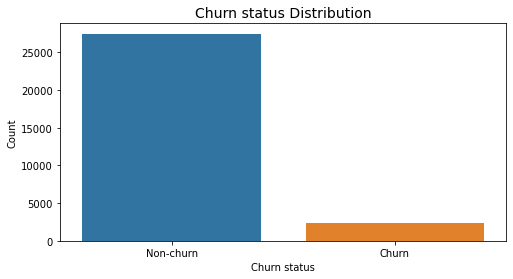

In [54]:
## Let's check the distribution

plt.figure(figsize=(8,4))
sns.countplot(data=df_churn, x='churn_flag', order=df_churn.churn_flag.value_counts().index)
plt.ylabel('Count')
plt.xlabel('Churn status')
plt.xticks([0,1],['Non-churn','Churn'])
plt.title('Churn status Distribution',fontsize=14)
plt.show()

In [55]:
# There are some monthly features with jun_ , jul_, aug_ 
# We need to standarize them for EDA
# renaming columns,
#'jun_vbc_3g' : 'vbc_3g_6'
#'jul_vbc_3g' : 'vbc_3g_7'
#'aug_vbc_3g' : 'vbc_3g_8'

df_churn.rename(columns={'jun_vbc_3g' : 'vbc_3g_6', 'jul_vbc_3g' : 'vbc_3g_7', 'aug_vbc_3g' : 'vbc_3g_8'}, inplace=True)

In [56]:
## Let's apply EDA on the features
## Find the monthly columns
all_monthly_features = []
for i in range(6,9):
    reg = '_'+str(i)
    cols=df_churn.filter(regex=(reg)).columns
    all_monthly_features.extend(cols)

all_monthly_features

['last_date_of_month_6',
 'arpu_6',
 'onnet_mou_6',
 'offnet_mou_6',
 'roam_ic_mou_6',
 'roam_og_mou_6',
 'loc_og_t2t_mou_6',
 'loc_og_t2m_mou_6',
 'loc_og_t2f_mou_6',
 'loc_og_t2c_mou_6',
 'loc_og_mou_6',
 'std_og_t2t_mou_6',
 'std_og_t2m_mou_6',
 'std_og_t2f_mou_6',
 'std_og_mou_6',
 'isd_og_mou_6',
 'spl_og_mou_6',
 'og_others_6',
 'total_og_mou_6',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2f_mou_6',
 'loc_ic_mou_6',
 'std_ic_t2t_mou_6',
 'std_ic_t2m_mou_6',
 'std_ic_t2f_mou_6',
 'std_ic_mou_6',
 'total_ic_mou_6',
 'spl_ic_mou_6',
 'isd_ic_mou_6',
 'ic_others_6',
 'total_rech_num_6',
 'total_rech_amt_6',
 'max_rech_amt_6',
 'date_of_last_rech_6',
 'last_day_rch_amt_6',
 'total_rech_data_6',
 'max_rech_data_6',
 'count_rech_2g_6',
 'count_rech_3g_6',
 'av_rech_amt_data_6',
 'vol_2g_mb_6',
 'vol_3g_mb_6',
 'arpu_3g_6',
 'arpu_2g_6',
 'night_pck_user_6',
 'monthly_2g_6',
 'sachet_2g_6',
 'monthly_3g_6',
 'sachet_3g_6',
 'fb_user_6',
 'vbc_3g_6',
 'total_data_rech_6',
 'amt_d

In [57]:
## Let's identify all the non-monthly features
# list of column which are not monthly columns
non_monthly_features = [col for col in df_churn.columns if col not in all_monthly_features ]
non_monthly_features

['mobile_number', 'circle_id', 'aon', 'churn_flag']

### MOBILE_NUMBER - Customer phone number

In [58]:
df_churn['mobile_number'].value_counts().sort_values(ascending = False).head()

7000883200    1
7001560797    1
7002001474    1
7000688705    1
7001669696    1
Name: mobile_number, dtype: int64

**We can infer that the mobile_number is an unique column, means it's repeated multiple times. So we can safely ignore as it's not going to add any value for our analysis**

In [59]:
df_churn.drop('mobile_number', axis=1, inplace=True)

### CIRCLE_ID - Telecom circle area to which the customer belongs to

In [60]:
# Getting the distinct circle_id's in the data
df_churn.circle_id.value_counts()



109    29906
Name: circle_id, dtype: int64

Looks like the data at hand is only for a single circle_id 109.
We can remove this feature going forward as it is not contributing to analysis and model building.

In [61]:
df_churn.drop('circle_id',axis=1,inplace=True)

### AON - Age on network - number of days the customer is using the operator T network

In [62]:
df_churn['aon'].describe()

count    29906.000000
mean      1209.062396
std        957.342718
min        180.000000
25%        460.000000
50%        846.000000
75%       1755.000000
max       4321.000000
Name: aon, dtype: float64

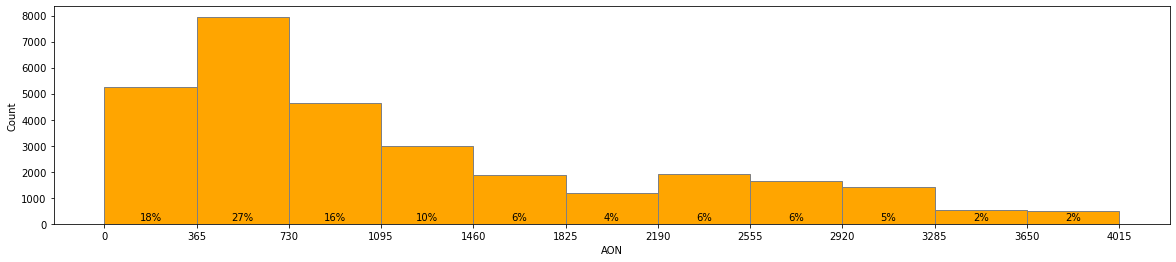

In [63]:
## The following method will draw the distributin plot based on the bin size
## We have took the reference from the followig article - https://stackoverflow.com/questions/6352740/matplotlib-label-each-bin
## We have labelled each bins with the percentage counts
def plot_distribution(dataset,col,binsize):
    fig, ax = plt.subplots(figsize=(20,4))
    counts, bins, patches = ax.hist(dataset[col],bins=range(0,dataset[col].max(),round(binsize)), facecolor='orange', edgecolor='gray')
    
    # Set the ticks to be at the edges of the bins.
    ax.set_xticks(bins)
    bin_centers = 0.5 * np.diff(bins) + bins[:-1]
    for count, x in zip(counts, bin_centers):
        # Label the percentages
        percent = '%0.0f%%' % (100 * float(count) / counts.sum())
        ax.annotate(percent, xy=(x,0.2), xycoords=('data', 'axes fraction'),
        xytext=(0, -32), textcoords='offset points', va='top', ha='center')
    
    ax.set_xlabel(col.upper())
    ax.set_ylabel('Count')
    plt.show()



plot_distribution(df_churn,'aon',365)

#### Observation:
 - Minimun Age on network is 180 days.
 - Average age on network for customers is 1200 days (3.2 years).
 - 27% of the HV users are in their 2nd year with the network.
 - Almost 71% users have Age on network less than 4 years.
 - 15% users are with the network from over 7 years.



In [64]:
#Create Derived categorical variable
df_churn['aon_bin'] = pd.cut(df_churn['aon'], range(0,df_churn['aon'].max(),365), labels=range(0,int(round(df_churn['aon'].max()/365))-1))

In [65]:
## This plot will show 
def distribution_by_churn(data,col):
    # per month churn vs Non-Churn
    fig, ax = plt.subplots(figsize=(7,4))
    colList=list(data.filter(regex=(col)).columns)
    colList = colList[:3]
    #print(colList)
    plt.plot(data.groupby('churn_flag')[colList].mean().T)
    ax.set_xticklabels(['Jun','Jul','Aug'])
    ## Add legend
    plt.legend(['Non-Churn', 'Churn'])
    # Add titles
    plt.title( str(col) +" V/S Month", loc='left', fontsize=12, fontweight=0, color='orange')
    plt.xlabel("Month")
    plt.ylabel(col)
    plt.show()
    # Numeric stats for per month churn vs Non-Churn
    return data.groupby('churn_flag')[colList].mean()

### APRU - Average revenue per user

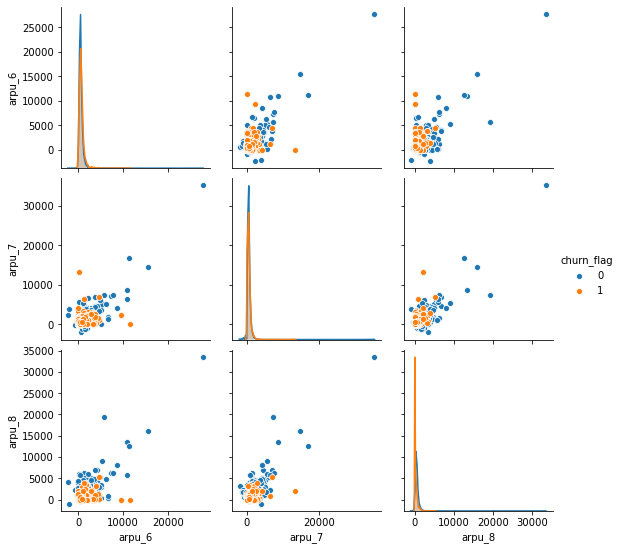

In [66]:
sns.pairplot(data=df_churn[['arpu_6','arpu_7','arpu_8','churn_flag']],hue='churn_flag')
plt.show()

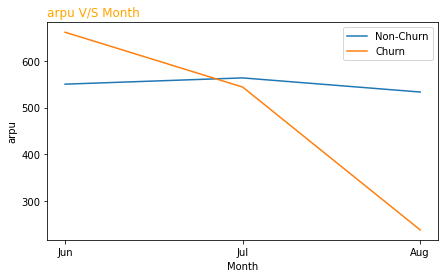

arpu_6      arpu_7      arpu_8
churn_flag                                    
0           549.843524  563.190828  533.052496
1           660.695411  543.722952  238.631887

In [67]:
distribution_by_churn(df_churn,'arpu')

#### Observation:
- Average revenue per user,arpu also drops significantly for churners from month Jul(7) to Aug(8).
- While it remains almost consistent for the non-churners.



### onnet_mou - On network/ within the same network usage

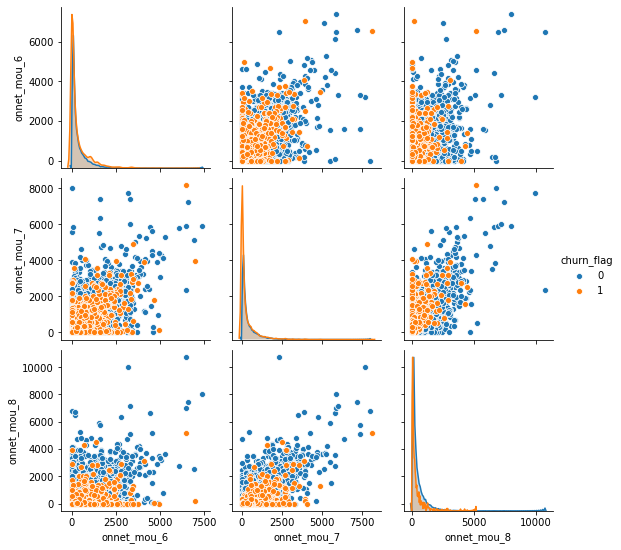

In [68]:
sns.pairplot(data=df_churn[['onnet_mou_6','onnet_mou_7','onnet_mou_8','churn_flag']],hue='churn_flag')
plt.show()

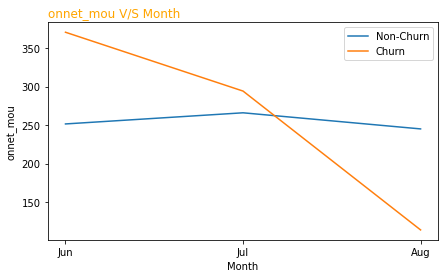

onnet_mou_6  onnet_mou_7  onnet_mou_8
churn_flag                                       
0            251.547425   266.008146   245.102132
1            370.576154   294.216960   113.978333

In [69]:
distribution_by_churn(df_churn,'onnet_mou')

#### Observation:
- Within the network monthly usage, onnet also drops significantly for churners from month Jul(7) to Aug(8).
- While it remains almost consistent for the non-churners.


### Offnet_mou - All kind of calls outside the operator T network

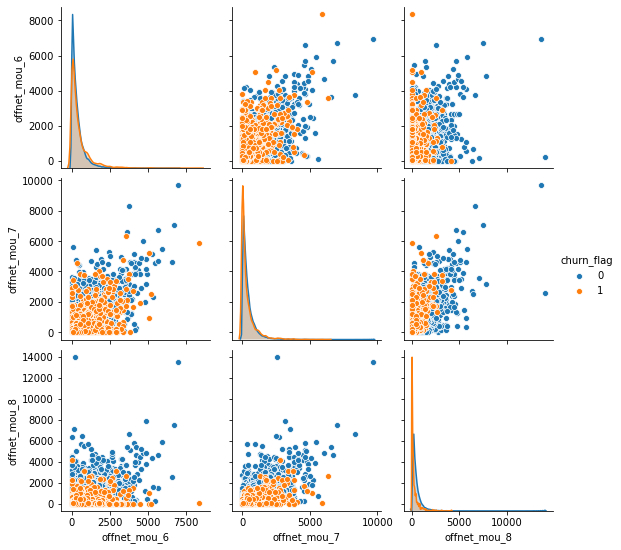

In [70]:
sns.pairplot(data=df_churn[['offnet_mou_6','offnet_mou_7','offnet_mou_8','churn_flag']],hue='churn_flag')
plt.show()

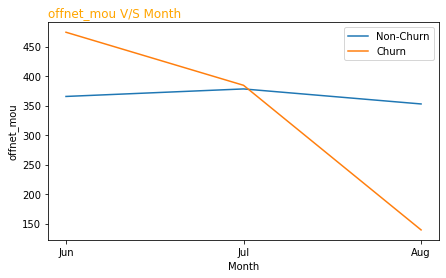

offnet_mou_6  offnet_mou_7  offnet_mou_8
churn_flag                                          
0             365.379578    378.118875    352.651469
1             474.204892    384.290583    139.157556

In [71]:
distribution_by_churn(df_churn,'offnet_mou')

#### Observation:
- Outside the network monthly usage, offnet also drops significantly for churners from month Jul(7) to Aug(8).
- While it remains almost consistent for the non-churners.

### roam_ic_mou - Indicates that customer is in roaming zone during the call

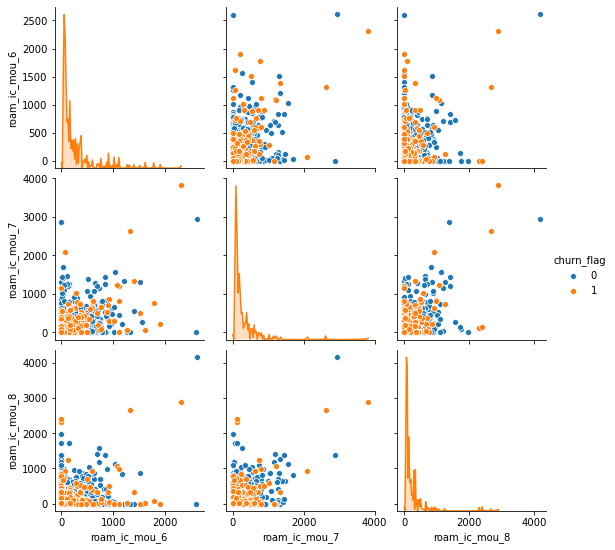

In [72]:
sns.pairplot(data=df_churn[['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8','churn_flag']],hue='churn_flag')
plt.show()

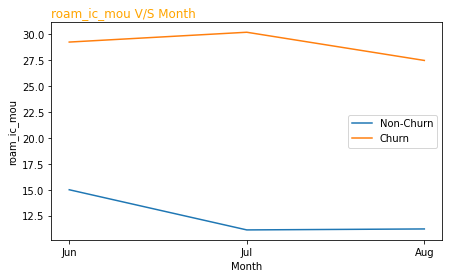

roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8
churn_flag                                             
0               14.993915      11.124666      11.217856
1               29.217630      30.163660      27.447610

In [73]:
distribution_by_churn(df_churn,'roam_ic_mou')

#### Observation:
- It remains almost consistent for both churners and non-churners.
- Hence , it does not appear as a key feature . We need to analyze further

### loc_og_mou - within the circle outgoing call

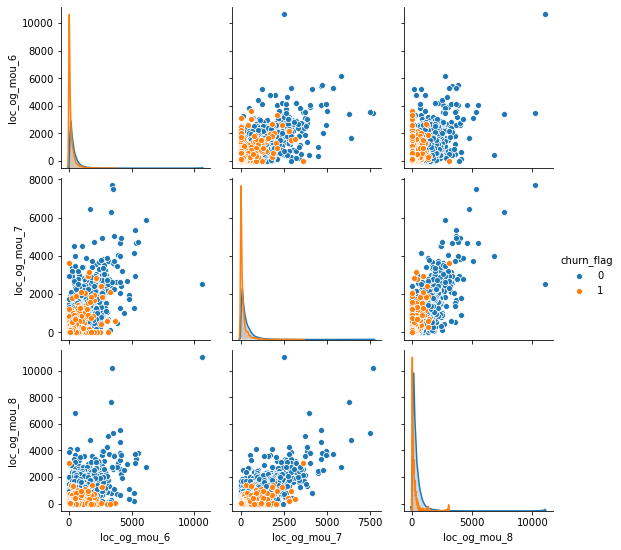

In [74]:
sns.pairplot(data=df_churn[['loc_og_mou_6','loc_og_mou_7','loc_og_mou_8','churn_flag']],hue='churn_flag')
plt.show()

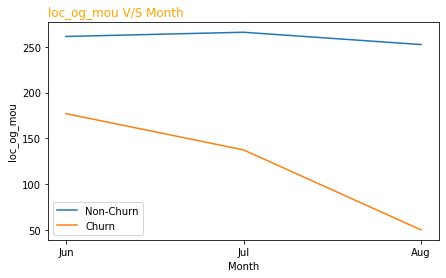

loc_og_mou_6  loc_og_mou_7  loc_og_mou_8
churn_flag                                          
0             261.299024    265.909525    252.437484
1             176.932953    137.287308     49.786795

In [75]:
distribution_by_churn(df_churn,'loc_og_mou')

#### Observation:
- local outgoing calls drops significantly for churners from month Jun(6) to Aug(8).
- While it remains almost consistent for the non-churners.

### std_og_mou - STD calls - outside the calling circle 

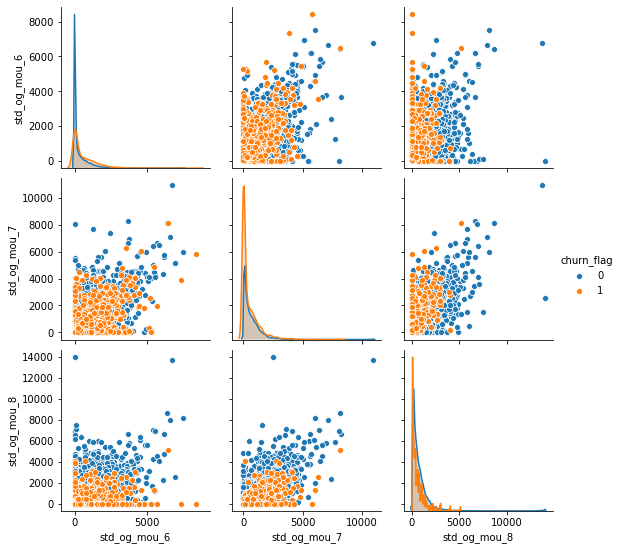

In [76]:
sns.pairplot(data=df_churn[['std_og_mou_6','std_og_mou_7','std_og_mou_8','churn_flag']],hue='churn_flag')
plt.show()

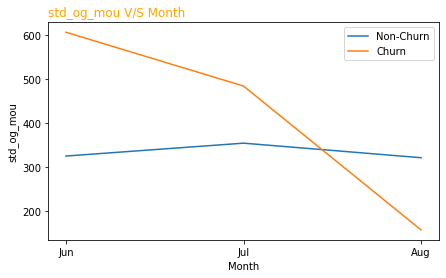

std_og_mou_6  std_og_mou_7  std_og_mou_8
churn_flag                                          
0             324.765008    354.036782    320.974319
1             606.241762    483.865877    156.794562

In [77]:
distribution_by_churn(df_churn,'std_og_mou')

#### Observation:
- STD outgoing calls drops significantly for churners from month Jun(6) to Aug(8).
- While it remains almost consistent for the non-churners.

### isd_og - ISD/International outgoing calls

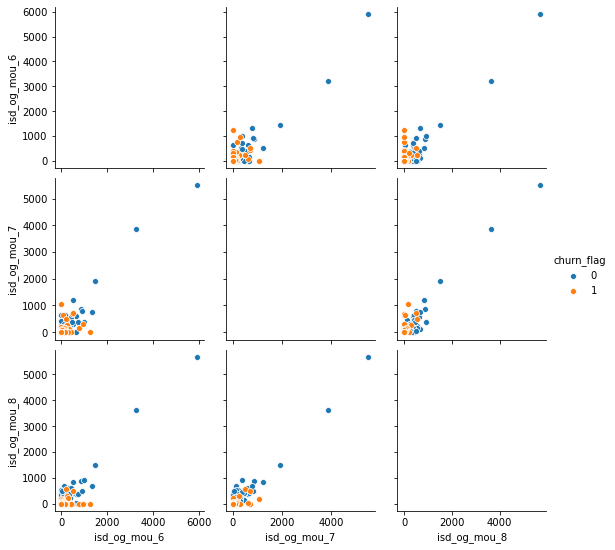

In [78]:
sns.pairplot(data=df_churn[['isd_og_mou_6','isd_og_mou_7','isd_og_mou_8','churn_flag']],hue='churn_flag')
plt.show()

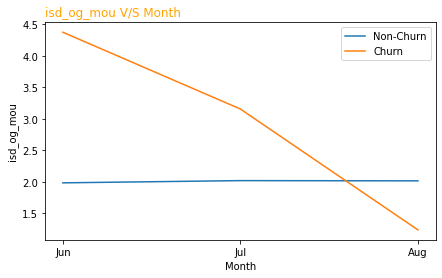

isd_og_mou_6  isd_og_mou_7  isd_og_mou_8
churn_flag                                          
0               1.984966      2.020308      2.016684
1               4.374148      3.156104      1.238193

In [79]:
distribution_by_churn(df_churn,'isd_og_mou')

#### Observation:
- ISD outgoing calls drops significantly for churners from month Jun(6) to Aug(8).
- While it remains almost consistent for the non-churners.
- However the average international calls are very low compared to Local and STD calls

### total_og_mou - Total outgoing calls per customer

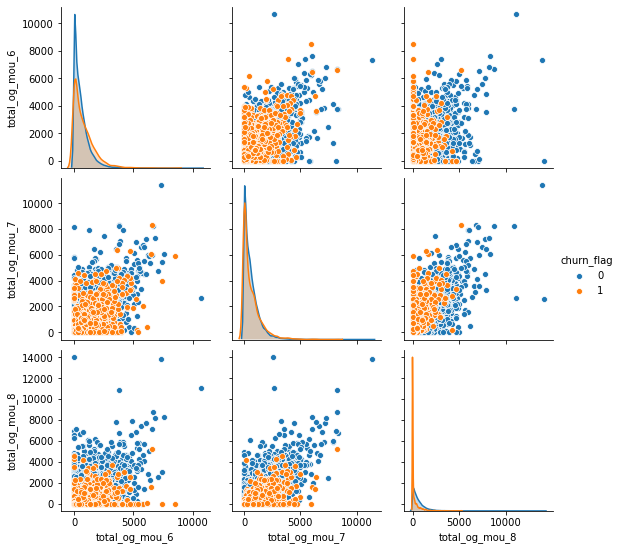

In [80]:
sns.pairplot(data=df_churn[['total_og_mou_6','total_og_mou_7','total_og_mou_8','churn_flag']],hue='churn_flag')
plt.show()

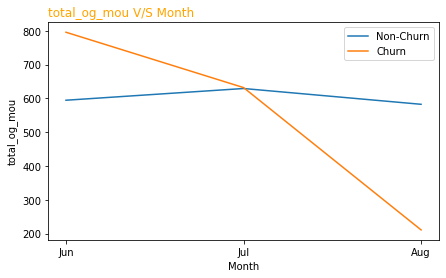

total_og_mou_6  total_og_mou_7  total_og_mou_8
churn_flag                                                
0               594.414582      629.096568      582.380539
1               795.591038      631.859433      210.659326

In [81]:
distribution_by_churn(df_churn,'total_og_mou')

#### Observation:
- Total outgoing voice calls drops significantly for churners from month Jun(6) to Aug(8).
- While it remains almost consistent for the non-churners.

### loc_ic_moc - incoming local calls

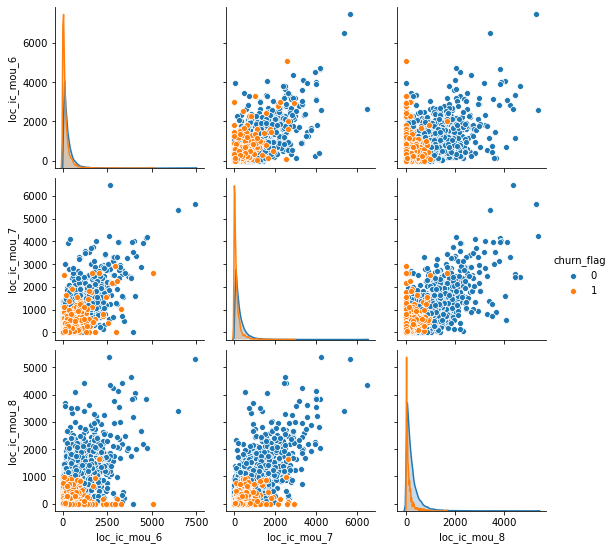

In [82]:
sns.pairplot(data=df_churn[['loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8','churn_flag']],hue='churn_flag')
plt.show()

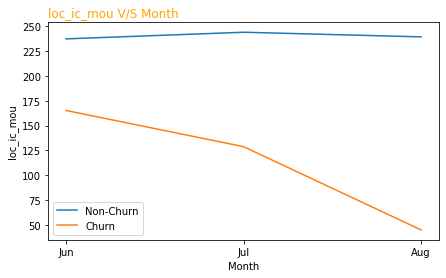

loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8
churn_flag                                          
0             237.249945    243.925686    239.268116
1             165.180509    128.738358     44.914359

In [83]:
distribution_by_churn(df_churn,'loc_ic_mou')

#### Observation:
- Local incoming calls drops significantly for churners from month Jun(6) to Aug(8).
- While it remains almost consistent for the non-churners.

### std_ic_mou - Outside the circle incoming calls / STD incoming calls

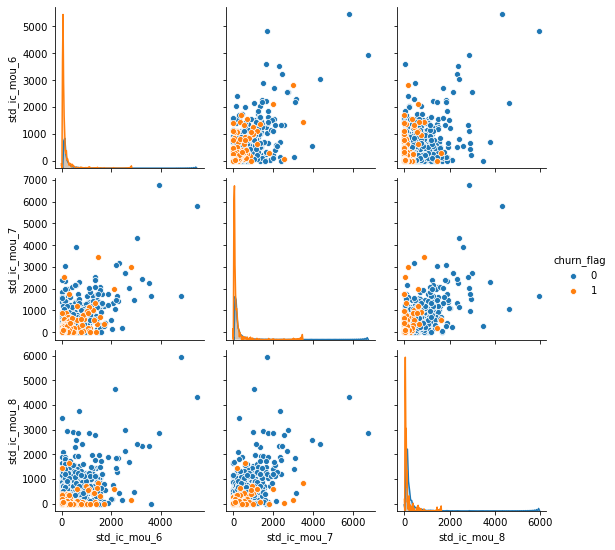

In [84]:
sns.pairplot(data=df_churn[['std_ic_mou_6','std_ic_mou_7','std_ic_mou_8','churn_flag']],hue='churn_flag')
plt.show()

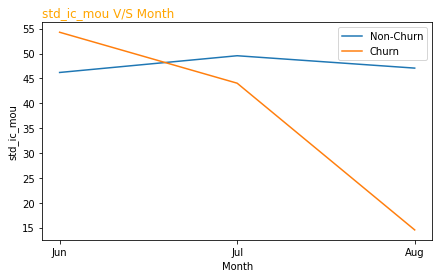

std_ic_mou_6  std_ic_mou_7  std_ic_mou_8
churn_flag                                          
0              46.185673     49.550576     47.063038
1              54.274396     44.029272     14.529256

In [85]:
distribution_by_churn(df_churn,'std_ic_mou')

#### Observation:
- STD incoming calls drops significantly for churners from month Jun(6) to Aug(8). Which is similar to the local incoming calls
- While it remains almost consistent for the non-churners.

### total_ic_mou - total incoming call for the person.

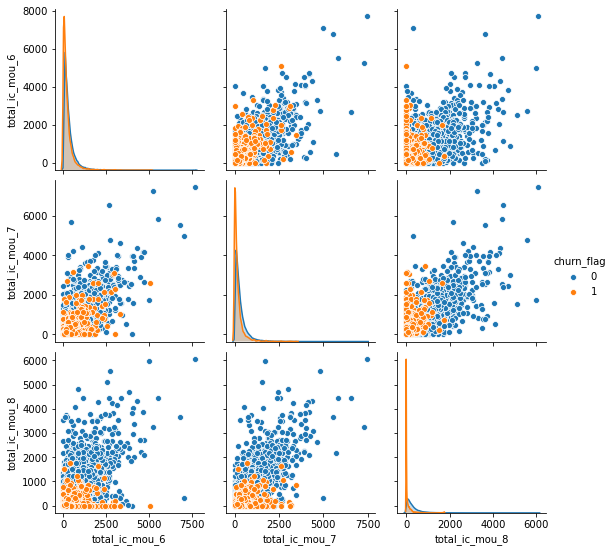

In [86]:
sns.pairplot(data=df_churn[['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8','churn_flag']],hue='churn_flag')
plt.show()

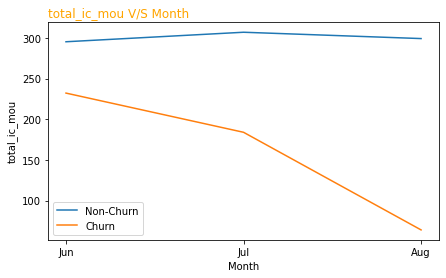

total_ic_mou_6  total_ic_mou_7  total_ic_mou_8
churn_flag                                                
0               295.401726      307.108317      299.319664
1               232.221162      183.978888       63.813168

In [87]:
distribution_by_churn(df_churn,'total_ic_mou')

#### Observation:
- As expected total incoming calls drops significantly for churners from month Jun(6) to Aug(8). 
- While it remains almost consistent for the non-churners.

### total_rech_num - Number of times a subscriber recharged his/her mobile

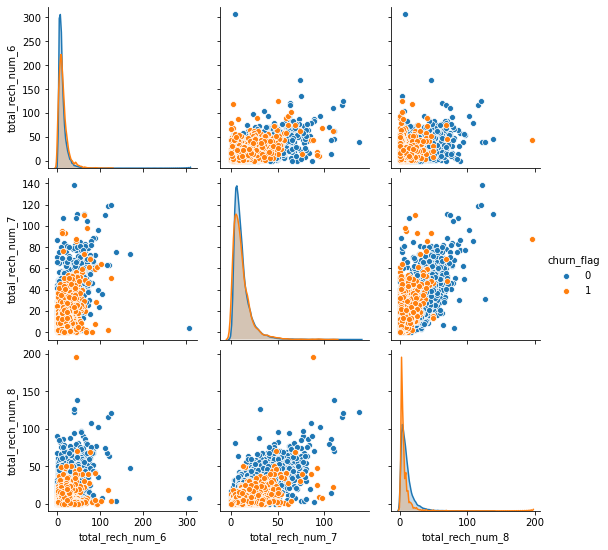

In [88]:
sns.pairplot(data=df_churn[['total_rech_num_6','total_rech_num_7','total_rech_num_8','churn_flag']],hue='churn_flag')
plt.show()

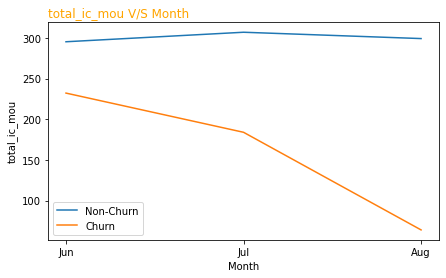

total_ic_mou_6  total_ic_mou_7  total_ic_mou_8
churn_flag                                                
0               295.401726      307.108317      299.319664
1               232.221162      183.978888       63.813168

In [89]:
distribution_by_churn(df_churn,'total_ic_mou')

### Observation:
- As expected , the total number of recharge dropped significantly from the month of June to Aug.
- It is almost same for the non-churners

### total_rech_amt - Total recharge amount of a particular month

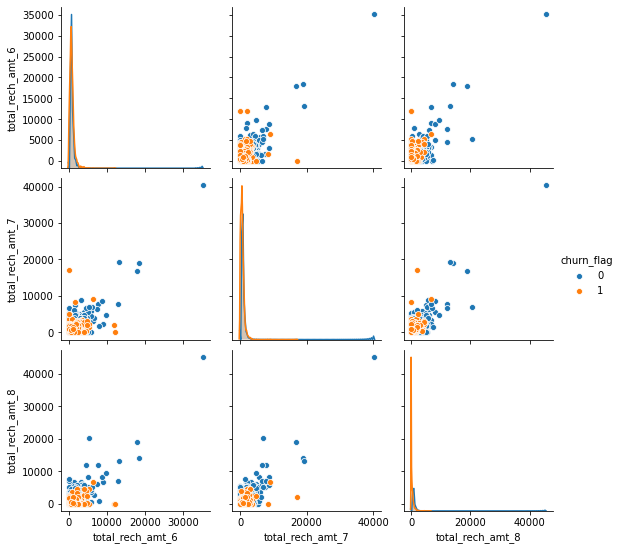

In [90]:
sns.pairplot(data=df_churn[['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','churn_flag']],hue='churn_flag')

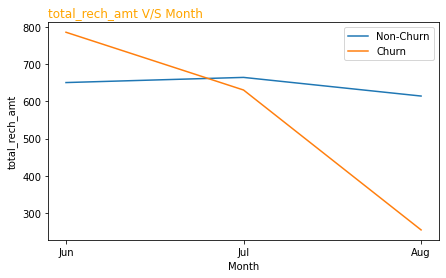

total_rech_amt_6  total_rech_amt_7  total_rech_amt_8
churn_flag                                                      
0                 650.359357        664.195140        614.169092
1                 785.353598        630.369313        255.001654

In [91]:
distribution_by_churn(df_churn,'total_rech_amt')

### Observation:
- Total recharge amount dropped by 66% on an average from Jun(6) to Aug(8) for the churn cases

### total_rech_data - Total number of times the data has been recharged

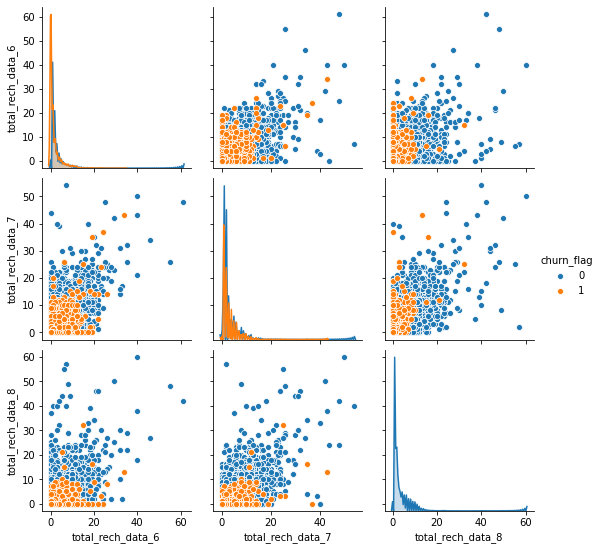

In [92]:
sns.pairplot(data=df_churn[['total_rech_data_6','total_rech_data_7','total_rech_data_8','churn_flag']],hue='churn_flag')
plt.show()

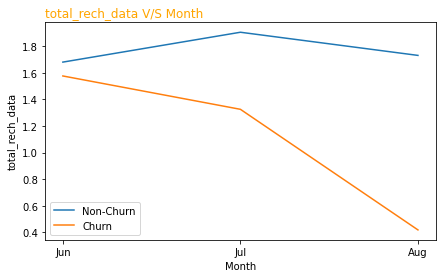

total_rech_data_6  total_rech_data_7  total_rech_data_8
churn_flag                                                         
0                    1.679824           1.904286           1.730246
1                    1.575682           1.325062           0.418528

In [93]:
distribution_by_churn(df_churn,'total_rech_data')

### Observation:
- Total data recharge dropped by 73.5% on an average from Jun(6) to Aug(8) for the churn cases

### vol_2g_mb - 2G Internet usage in MB

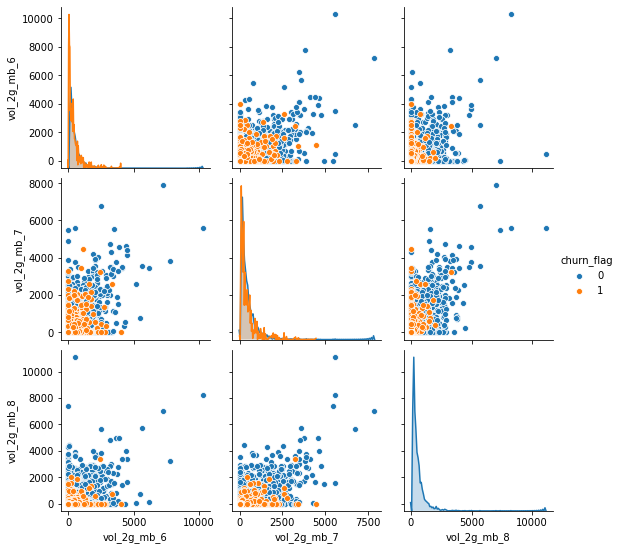

In [94]:
sns.pairplot(data=df_churn[['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8','churn_flag']],hue='churn_flag')
plt.show()

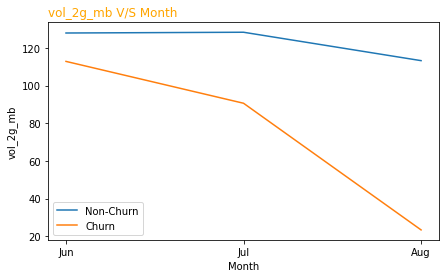

vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8
churn_flag                                       
0            127.877567   128.280903   113.205425
1            112.801472    90.589309    23.348168

In [95]:
distribution_by_churn(df_churn,'vol_2g_mb')

### Observation:
- 2G Internet usage dropped by 80% on an average from Jun(6) to Aug(8) for the churn cases

### vol_3g_mb - 3G Internet usage in MB

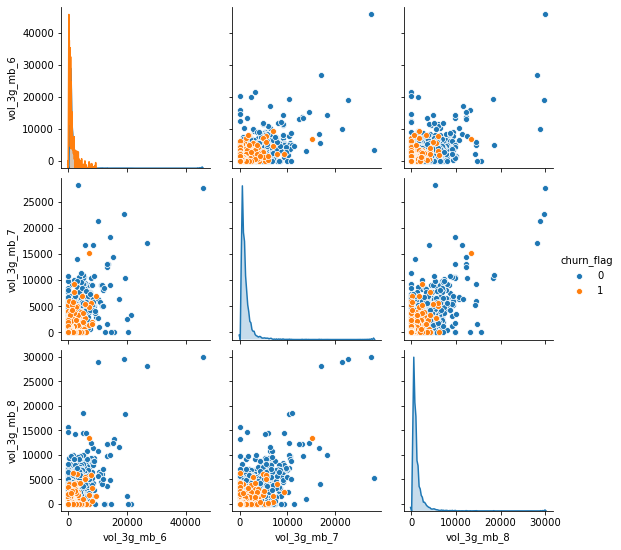

In [96]:
sns.pairplot(data=df_churn[['vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8','churn_flag']],hue='churn_flag')
plt.show()

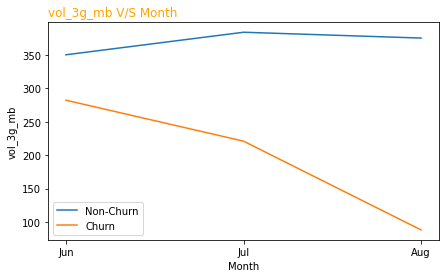

vol_3g_mb_6  vol_3g_mb_7  vol_3g_mb_8
churn_flag                                       
0            350.420140   384.153945   375.438136
1            282.359723   221.094177    88.192399

In [97]:
distribution_by_churn(df_churn,'vol_3g_mb')

### Observation:
- 3G Internet usage dropped by 69% on an average from Jun(6) to Aug(8) for the churn cases

### vbc_3g - Volume based cost - paid per user

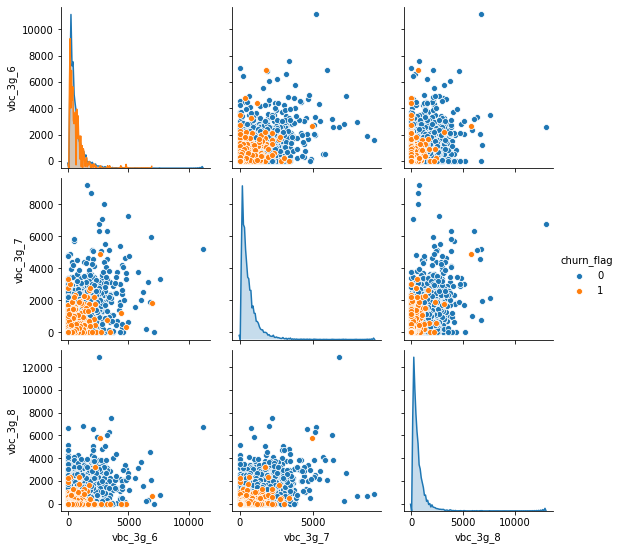

In [98]:
sns.pairplot(data=df_churn[['vbc_3g_6','vbc_3g_7','vbc_3g_8','churn_flag']],hue='churn_flag')
plt.show()

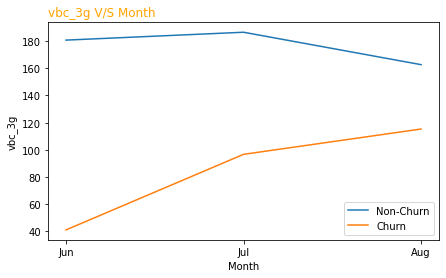

vbc_3g_8    vbc_3g_7    vbc_3g_6
churn_flag                                    
0           180.707918  186.490334  162.660451
1            41.146737   96.715108  115.330000

In [99]:
distribution_by_churn(df_churn,'vbc_3g')

### Observation:
- The volumn based cost paid by the users became double from Jun(6) to Aug(8) for the churn cases.

### Further analysis on all the monthly features - 

1. Extract all the features for the month
2. Try to compare the average usage with the good months (June & July ) and August

In [100]:
## Extract all the monthly features for June , July , August
month_features = []

for f in all_monthly_features:
    if f.endswith('_6')==True:
        feature = f.replace('_6','').strip()
        month_features.append(feature)
        
month_features


['last_date_of_month',
 'arpu',
 'onnet_mou',
 'offnet_mou',
 'roam_ic_mou',
 'roam_og_mou',
 'loc_og_t2t_mou',
 'loc_og_t2m_mou',
 'loc_og_t2f_mou',
 'loc_og_t2c_mou',
 'loc_og_mou',
 'std_og_t2t_mou',
 'std_og_t2m_mou',
 'std_og_t2f_mou',
 'std_og_mou',
 'isd_og_mou',
 'spl_og_mou',
 'og_others',
 'total_og_mou',
 'loc_ic_t2t_mou',
 'loc_ic_t2m_mou',
 'loc_ic_t2f_mou',
 'loc_ic_mou',
 'std_ic_t2t_mou',
 'std_ic_t2m_mou',
 'std_ic_t2f_mou',
 'std_ic_mou',
 'total_ic_mou',
 'spl_ic_mou',
 'isd_ic_mou',
 'ic_others',
 'total_rech_num',
 'total_rech_amt',
 'max_rech_amt',
 'date_of_last_rech',
 'last_day_rch_amt',
 'total_rech_data',
 'max_rech_data',
 'count_rech_2g',
 'count_rech_3g',
 'av_rech_amt_data',
 'vol_2g_mb',
 'vol_3g_mb',
 'arpu_3g',
 'arpu_2g',
 'night_pck_user',
 'monthly_2g',
 'sachet_2g',
 'monthly_3g',
 'sachet_3g',
 'fb_user',
 'vbc_3g',
 'total_data_rech',
 'amt_data']

------------------------------------------------------------------------------------
Feature name:  arpu


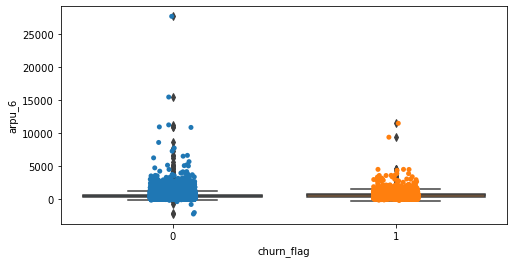

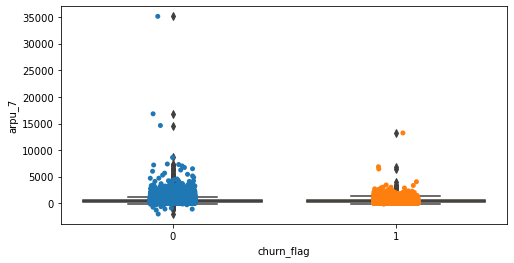

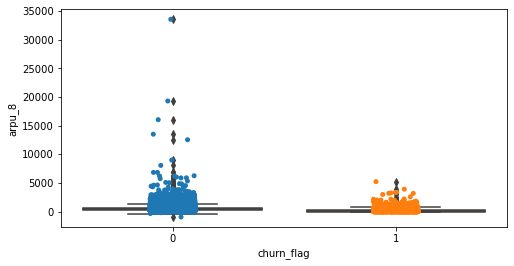

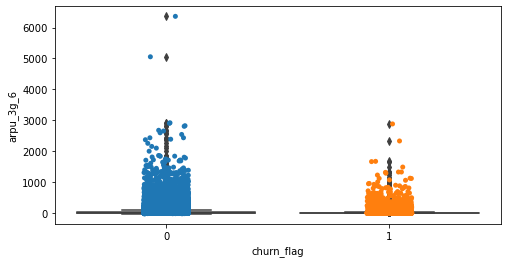

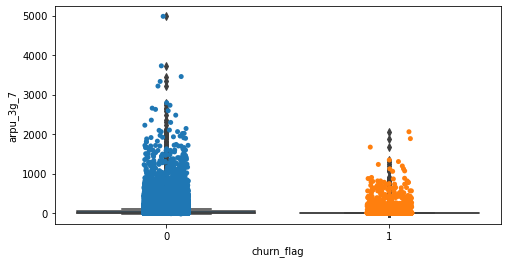

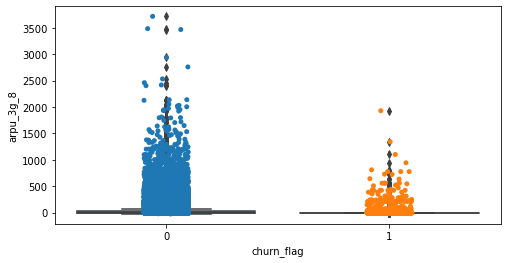

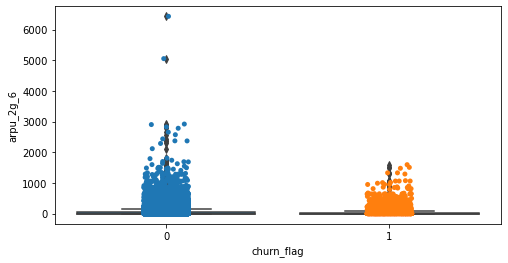

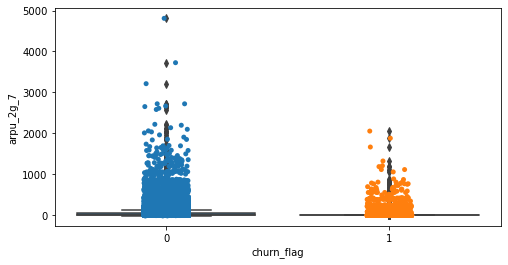

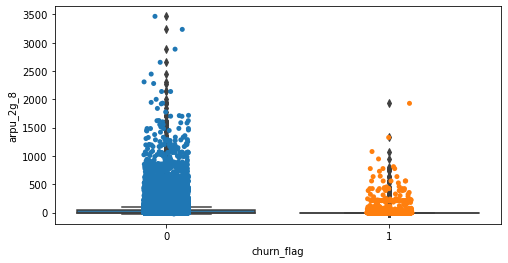

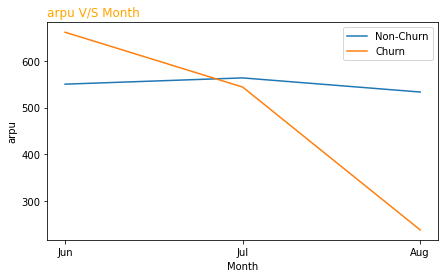

------------------------------------------------------------------------------------
Feature name:  onnet_mou


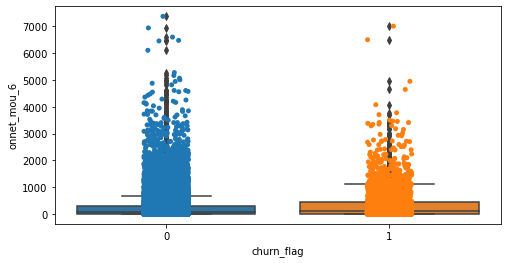

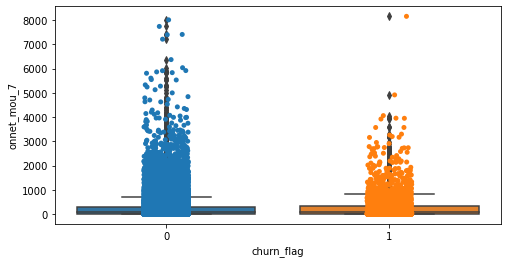

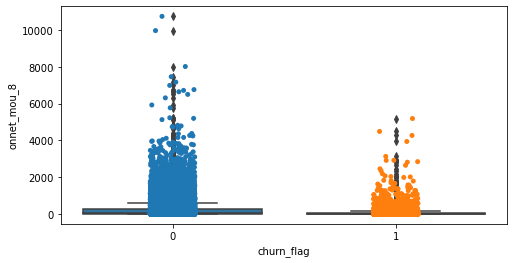

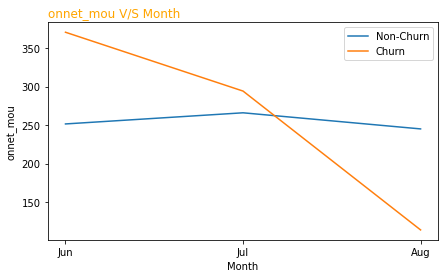

------------------------------------------------------------------------------------
Feature name:  offnet_mou


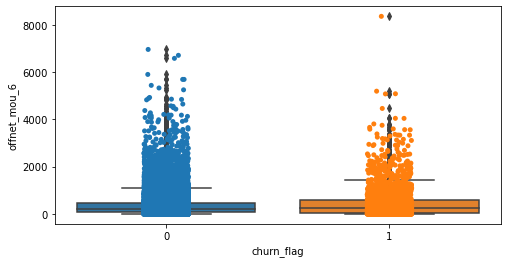

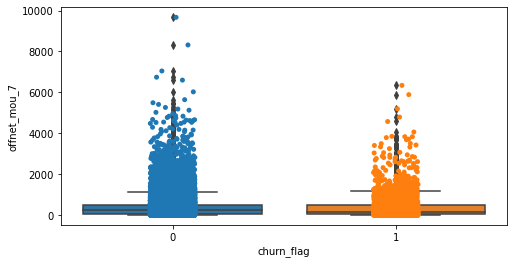

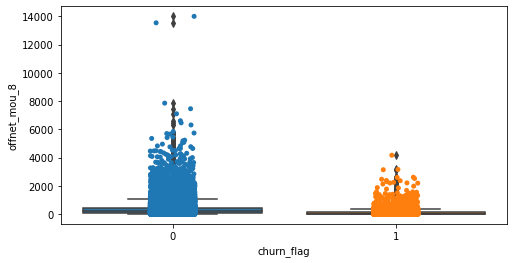

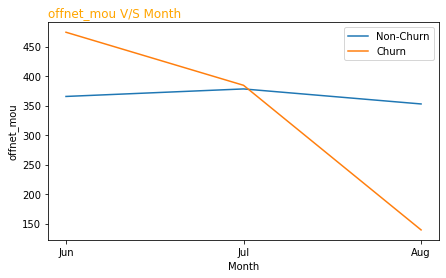

------------------------------------------------------------------------------------
Feature name:  roam_ic_mou


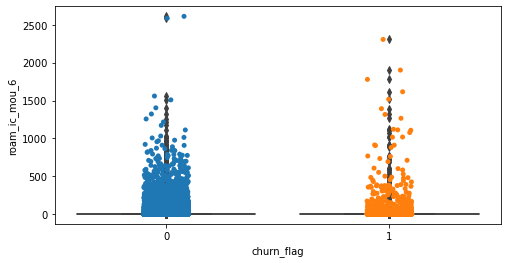

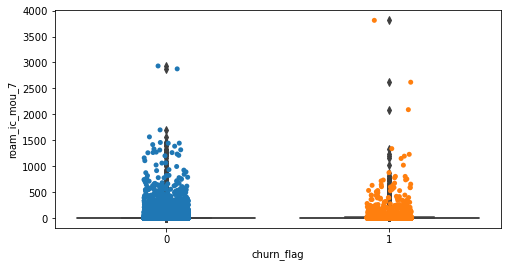

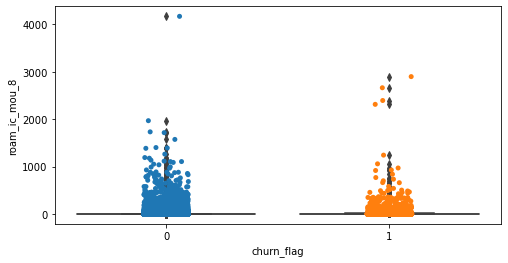

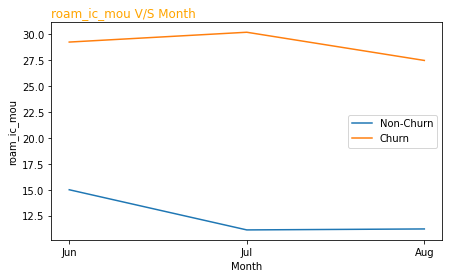

------------------------------------------------------------------------------------
Feature name:  roam_og_mou


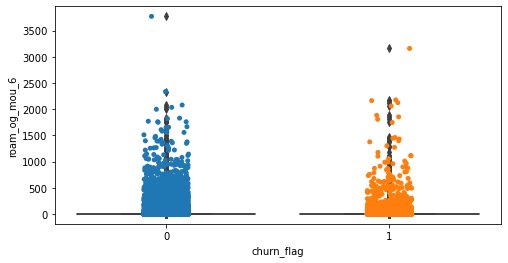

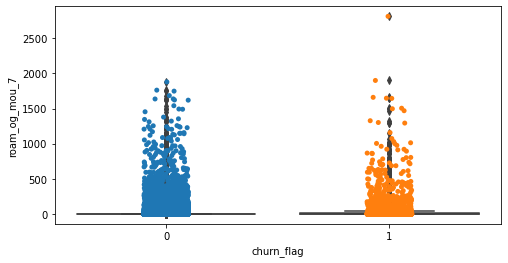

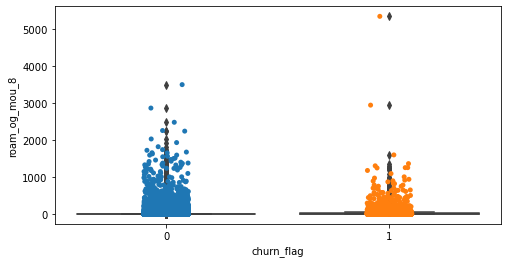

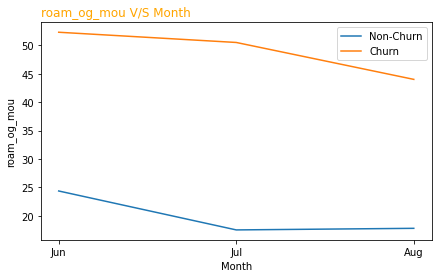

------------------------------------------------------------------------------------
Feature name:  loc_og_t2t_mou


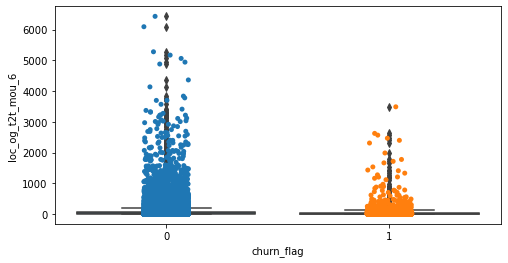

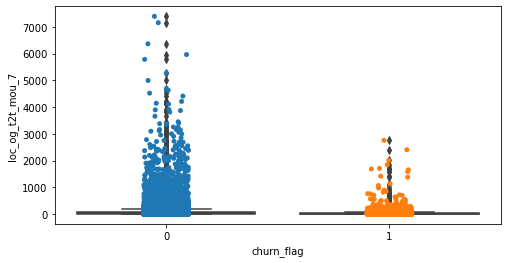

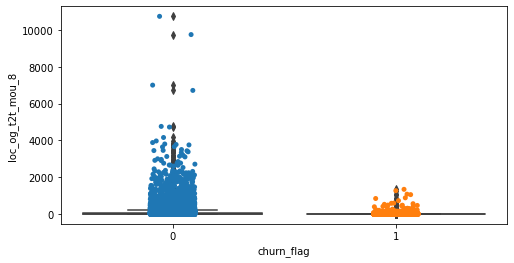

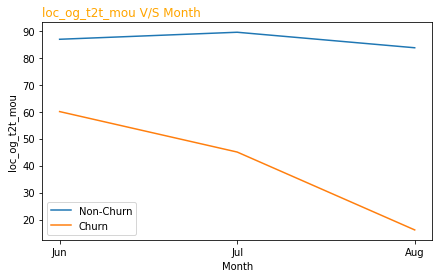

------------------------------------------------------------------------------------
Feature name:  loc_og_t2m_mou


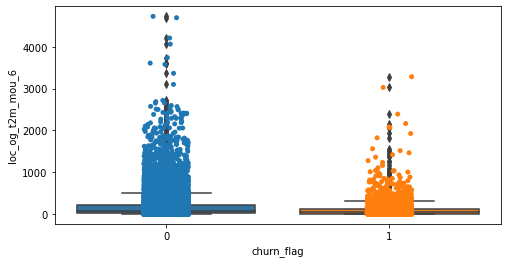

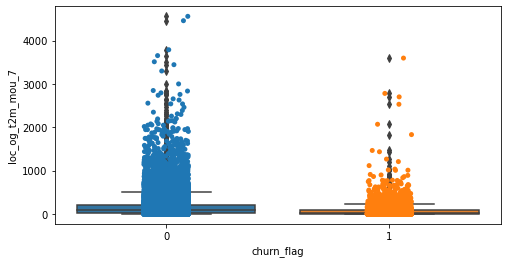

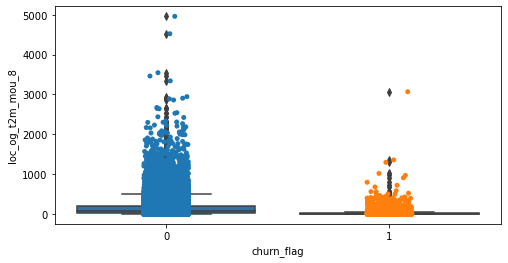

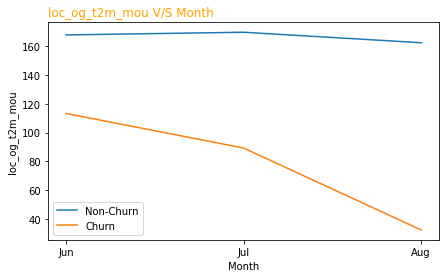

------------------------------------------------------------------------------------
Feature name:  loc_og_t2f_mou


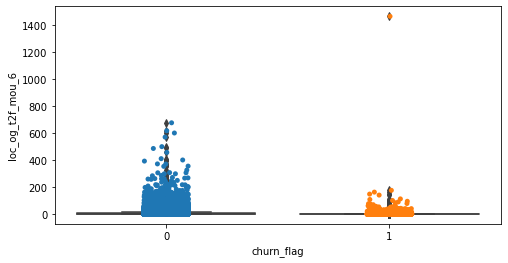

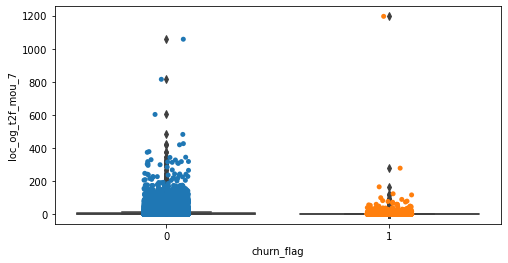

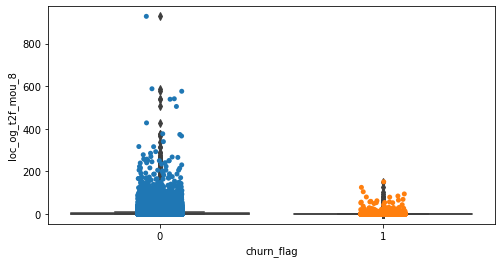

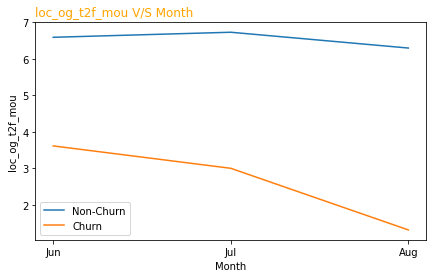

------------------------------------------------------------------------------------
Feature name:  loc_og_t2c_mou


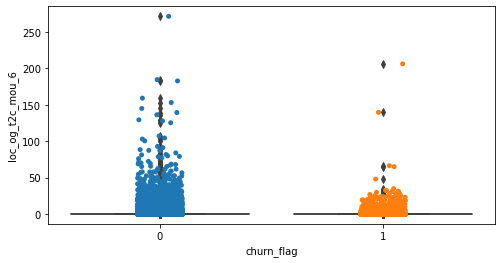

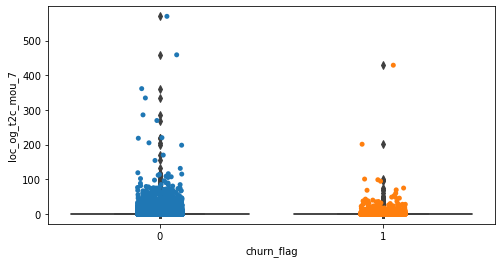

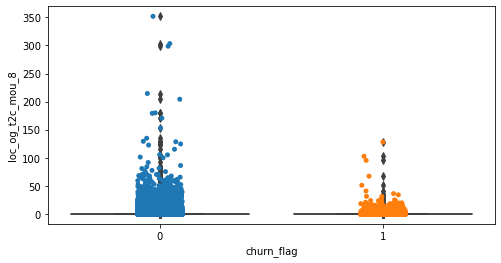

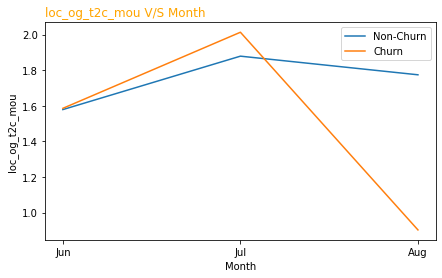

------------------------------------------------------------------------------------
Feature name:  loc_og_mou


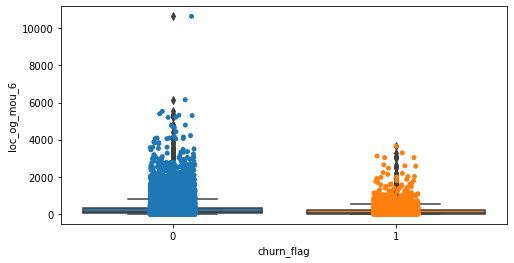

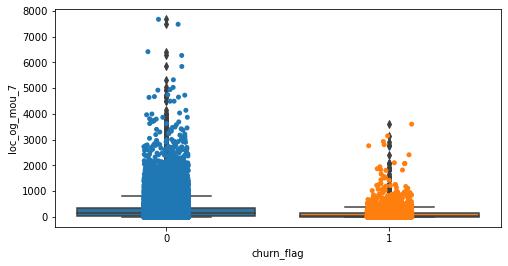

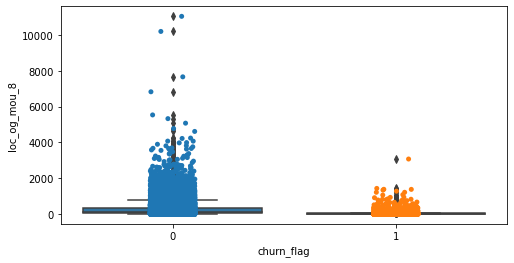

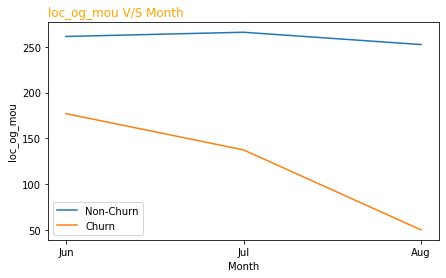

------------------------------------------------------------------------------------
Feature name:  std_og_t2t_mou


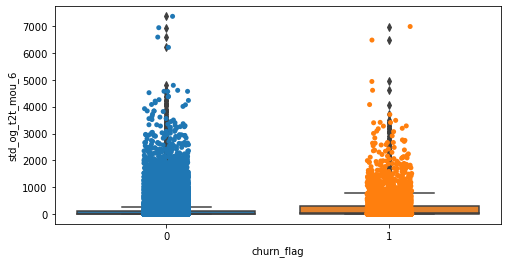

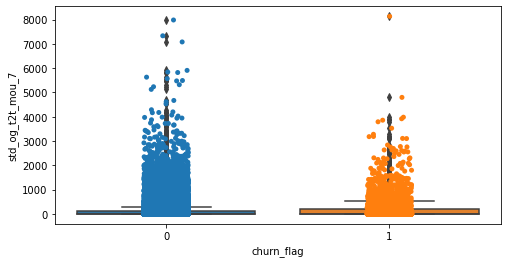

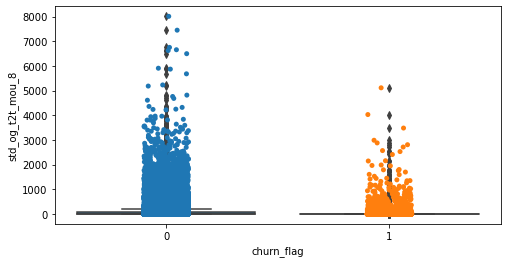

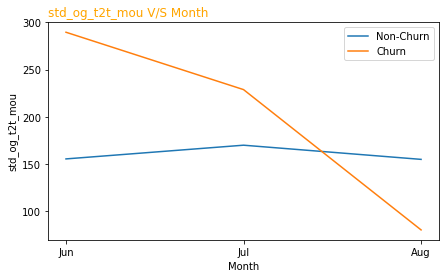

------------------------------------------------------------------------------------
Feature name:  std_og_t2m_mou


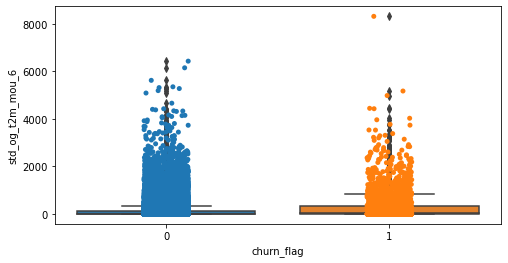

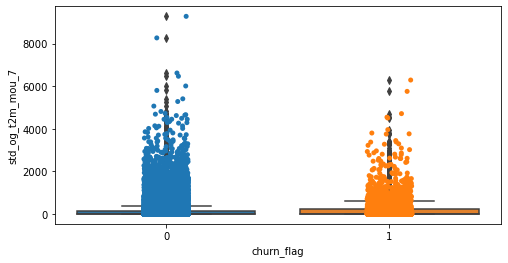

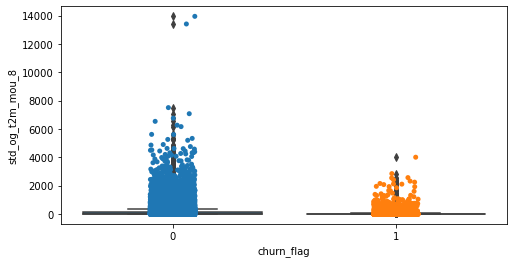

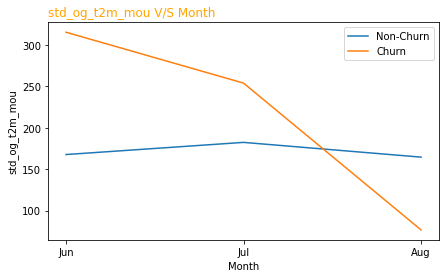

------------------------------------------------------------------------------------
Feature name:  std_og_t2f_mou


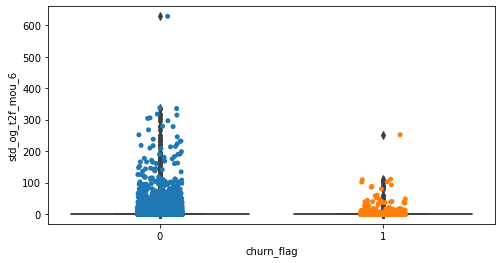

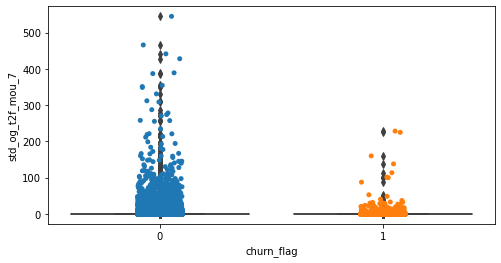

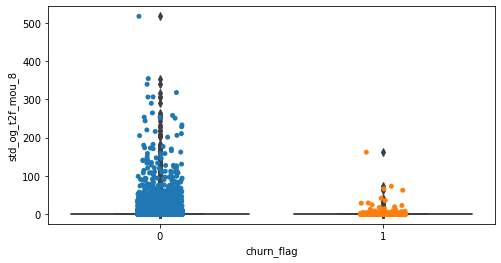

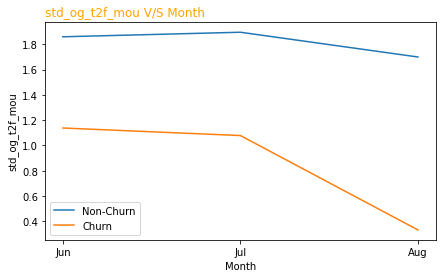

------------------------------------------------------------------------------------
Feature name:  std_og_mou


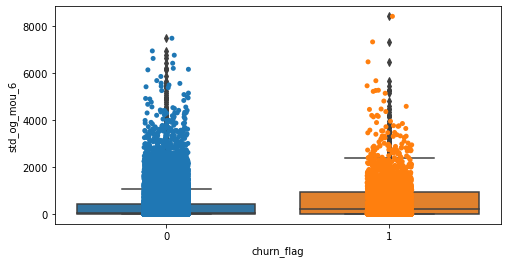

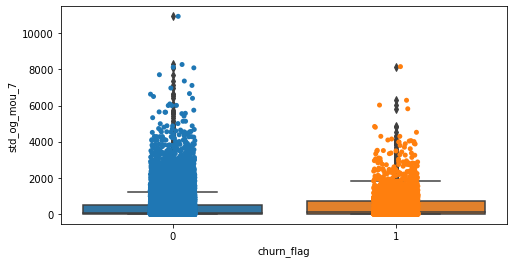

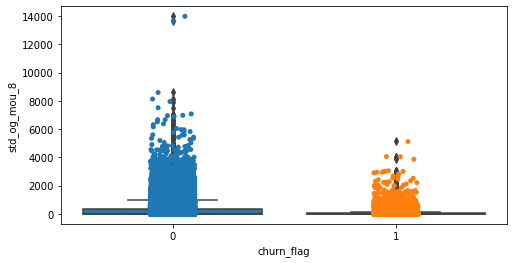

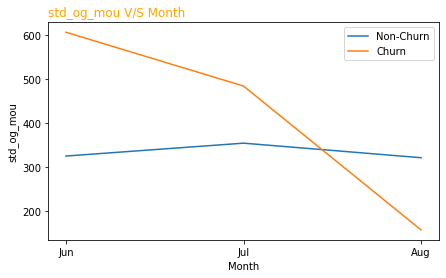

------------------------------------------------------------------------------------
Feature name:  isd_og_mou


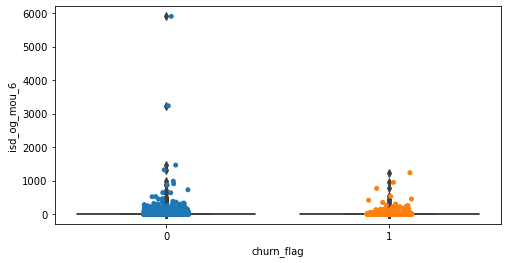

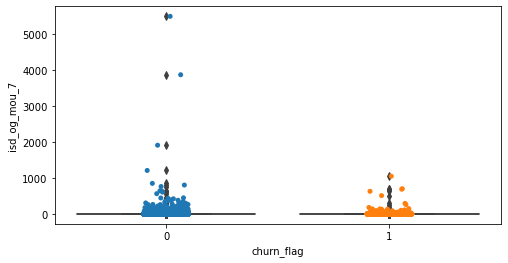

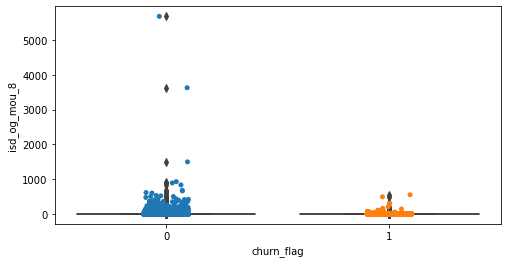

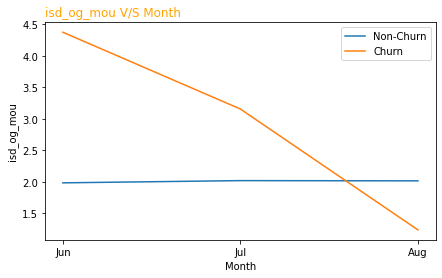

------------------------------------------------------------------------------------
Feature name:  spl_og_mou


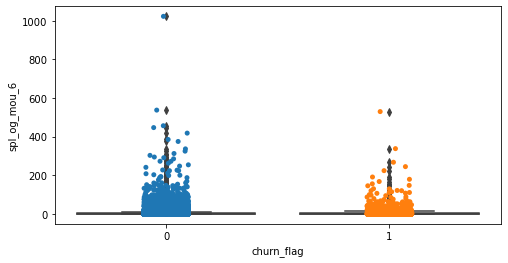

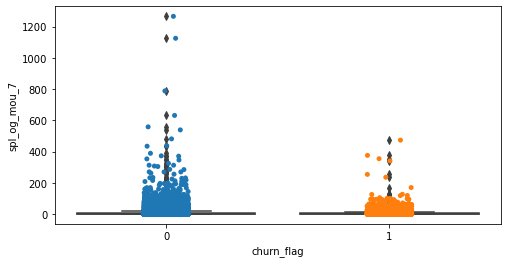

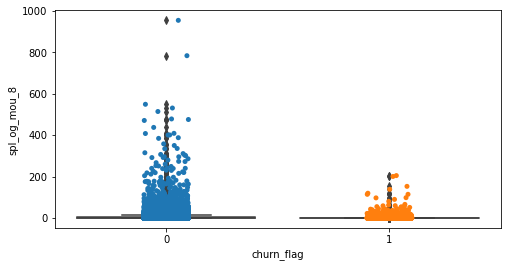

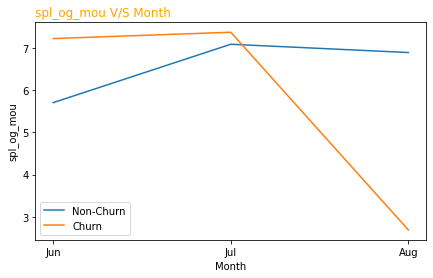

------------------------------------------------------------------------------------
Feature name:  og_others


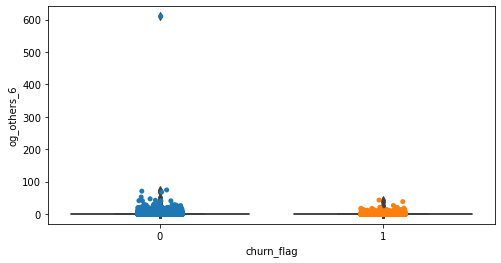

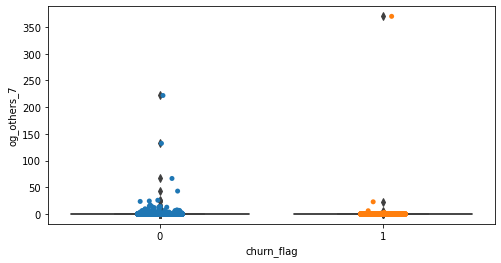

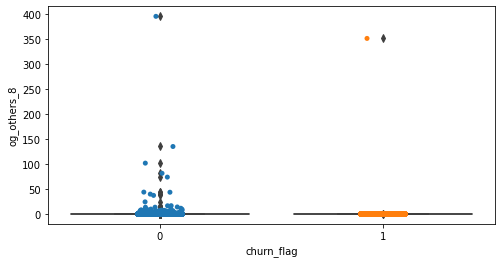

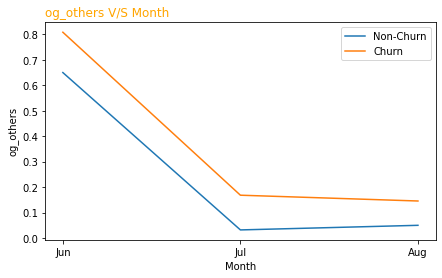

------------------------------------------------------------------------------------
Feature name:  total_og_mou


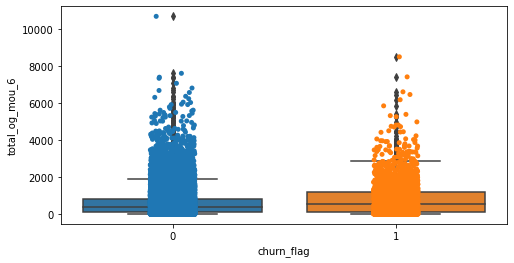

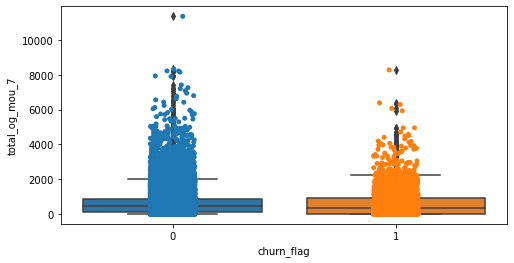

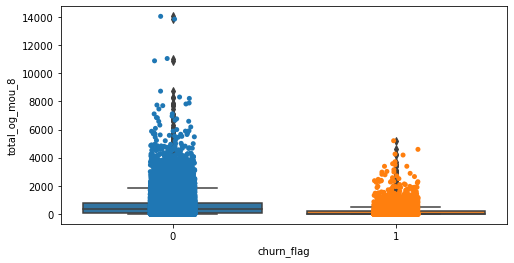

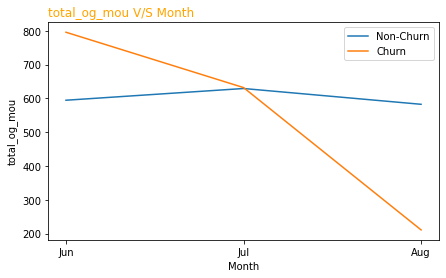

------------------------------------------------------------------------------------
Feature name:  loc_ic_t2t_mou


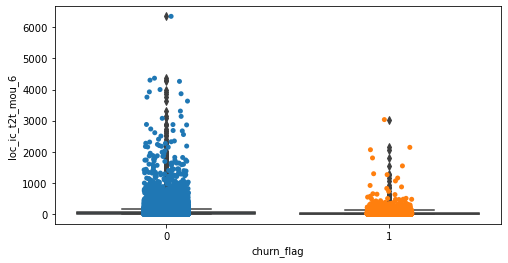

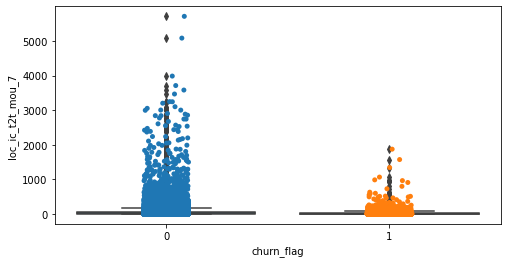

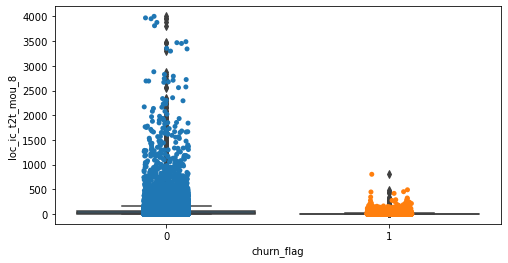

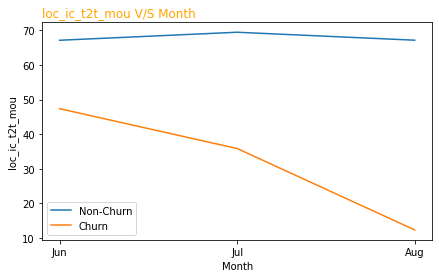

------------------------------------------------------------------------------------
Feature name:  loc_ic_t2m_mou


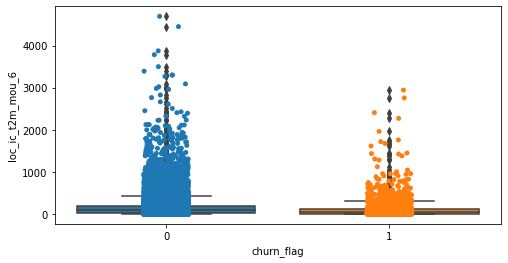

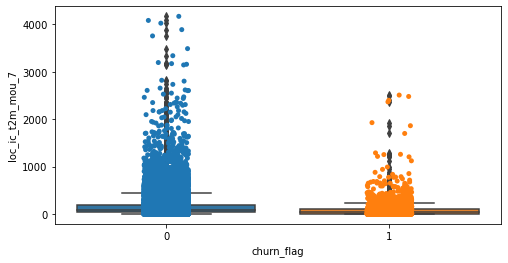

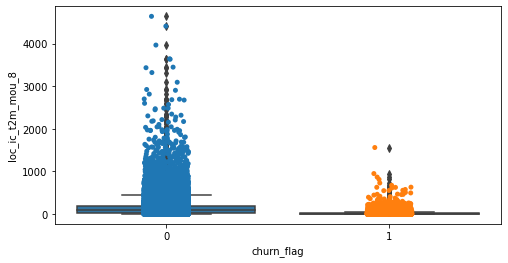

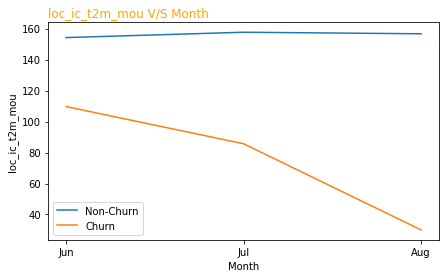

------------------------------------------------------------------------------------
Feature name:  loc_ic_t2f_mou


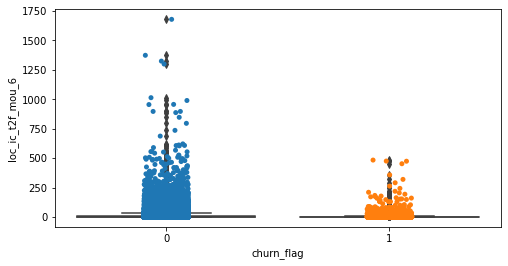

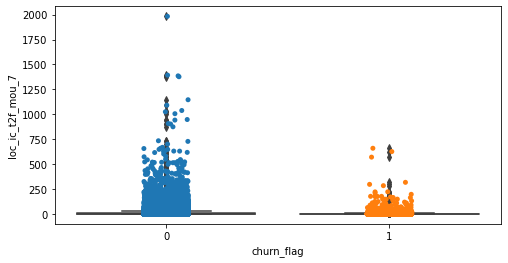

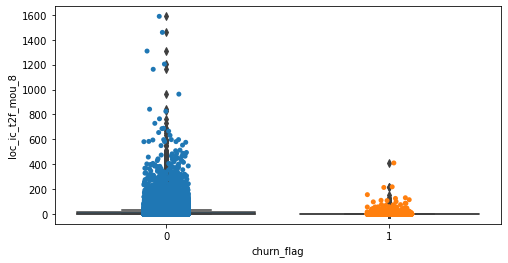

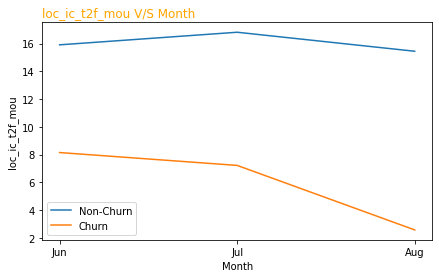

------------------------------------------------------------------------------------
Feature name:  loc_ic_mou


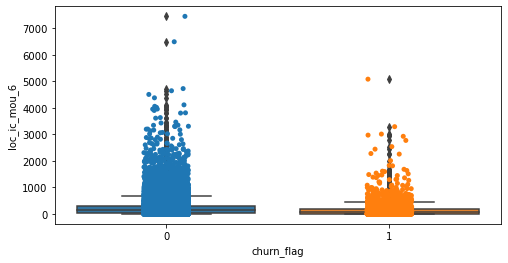

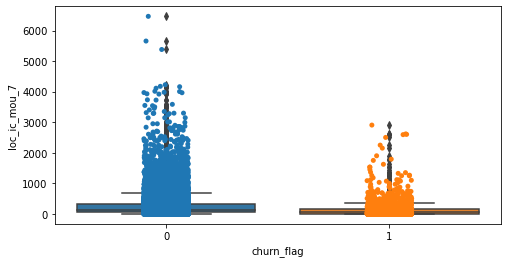

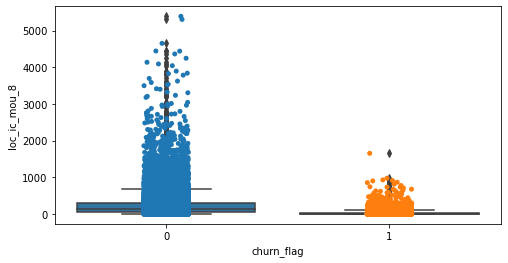

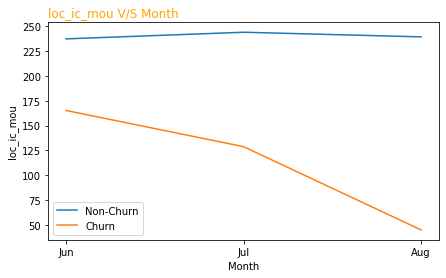

------------------------------------------------------------------------------------
Feature name:  std_ic_t2t_mou


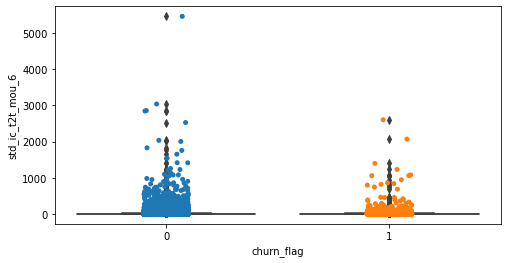

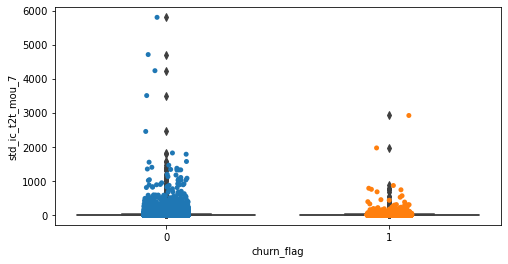

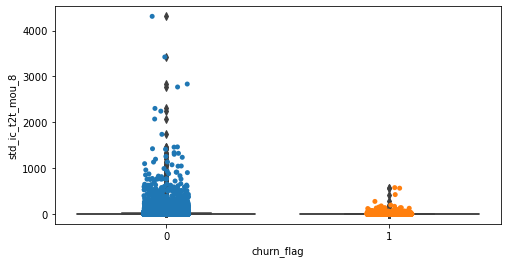

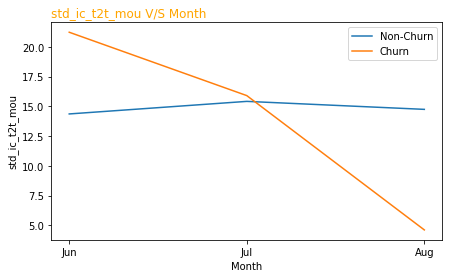

------------------------------------------------------------------------------------
Feature name:  std_ic_t2m_mou


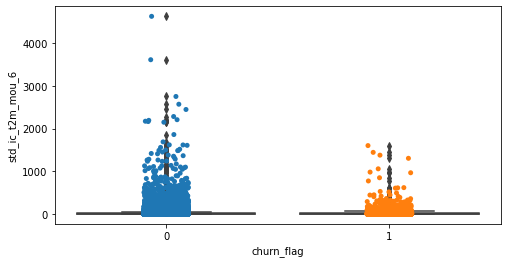

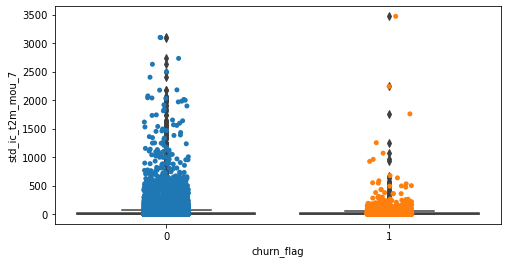

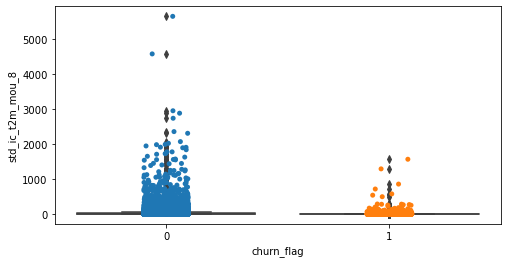

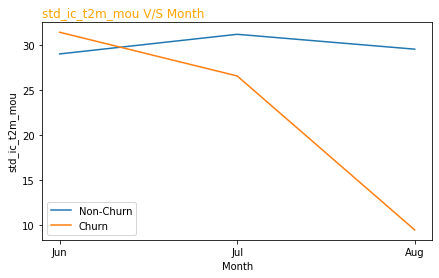

------------------------------------------------------------------------------------
Feature name:  std_ic_t2f_mou


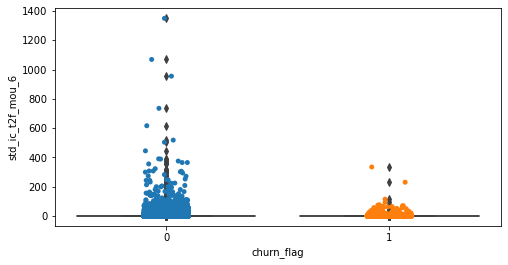

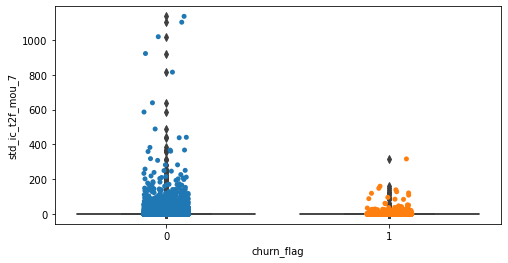

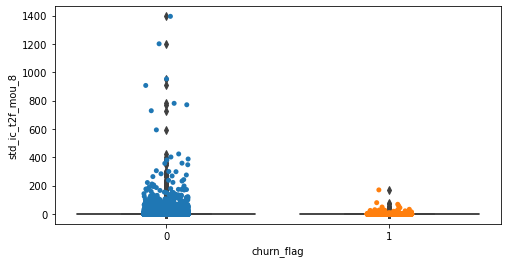

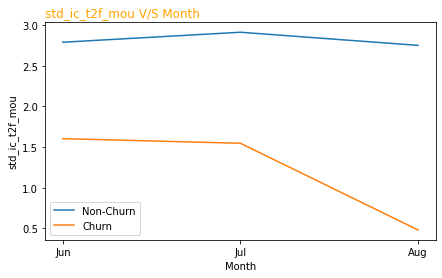

------------------------------------------------------------------------------------
Feature name:  std_ic_mou


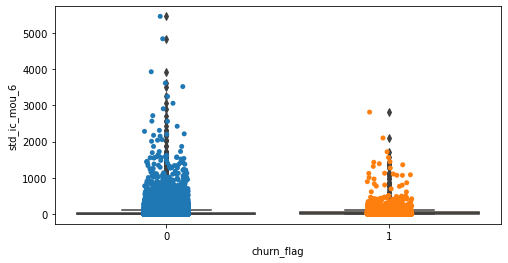

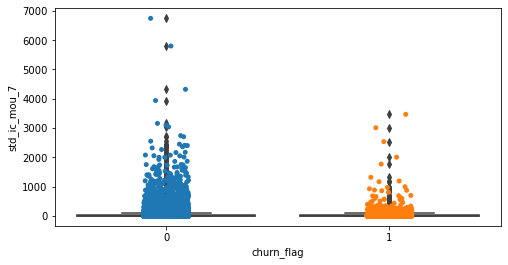

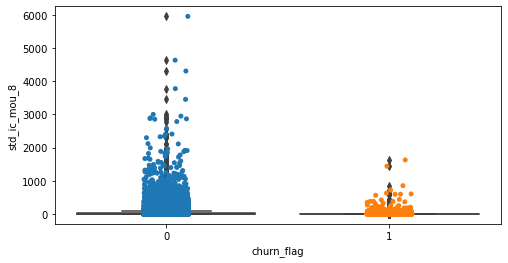

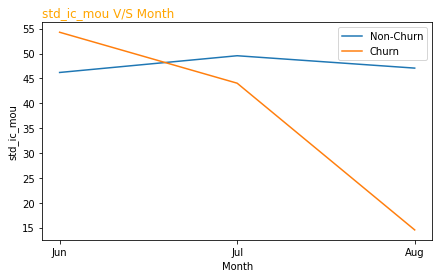

------------------------------------------------------------------------------------
Feature name:  total_ic_mou


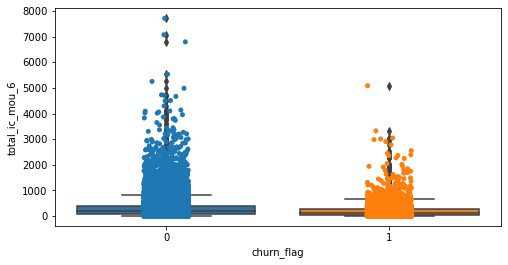

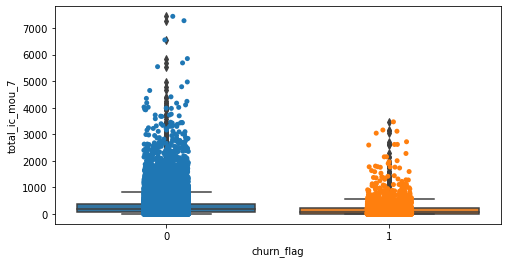

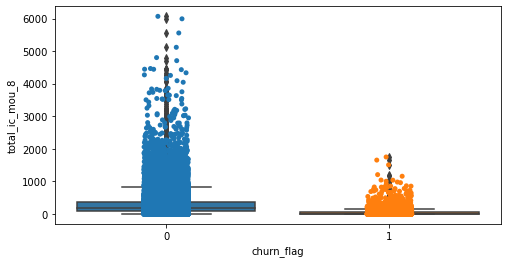

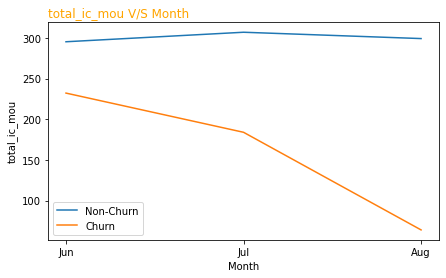

------------------------------------------------------------------------------------
Feature name:  spl_ic_mou


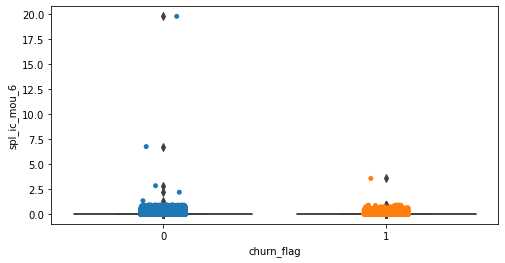

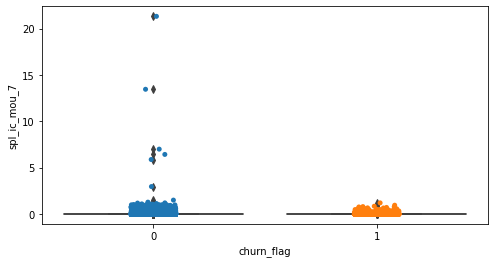

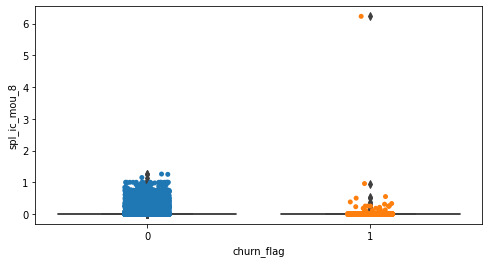

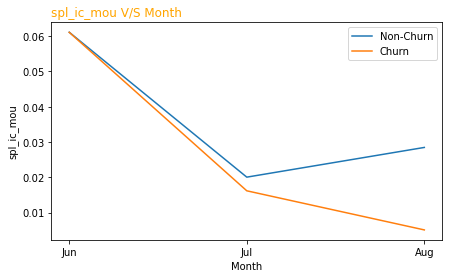

------------------------------------------------------------------------------------
Feature name:  isd_ic_mou


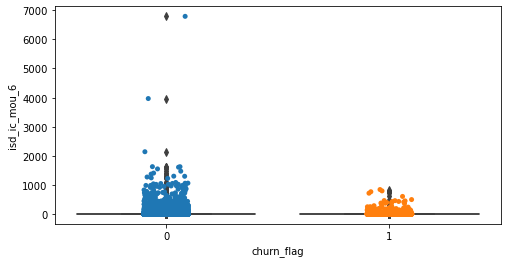

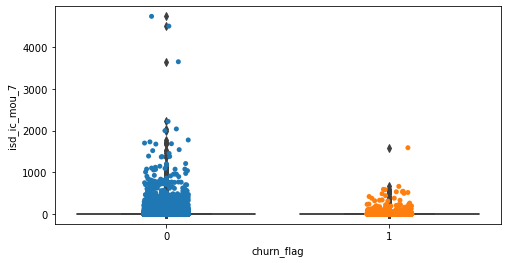

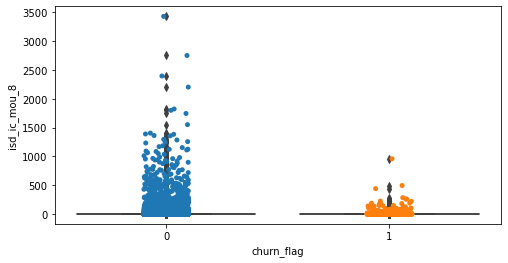

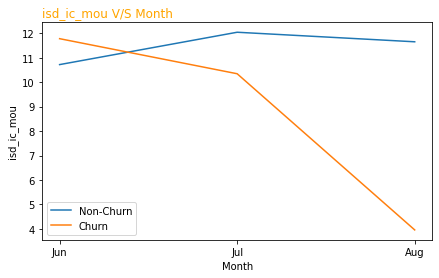

------------------------------------------------------------------------------------
Feature name:  ic_others


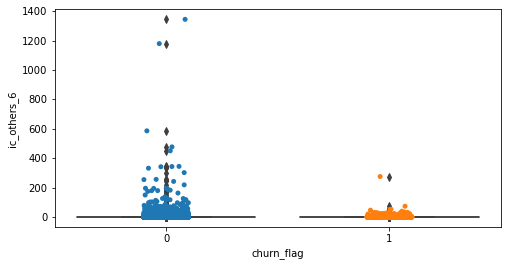

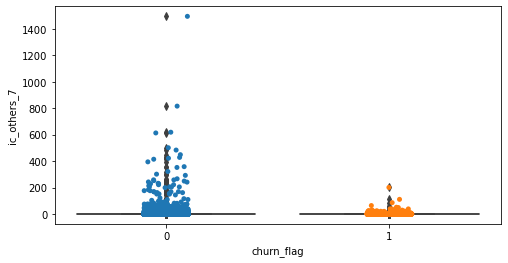

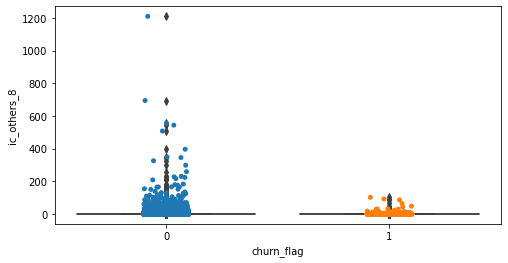

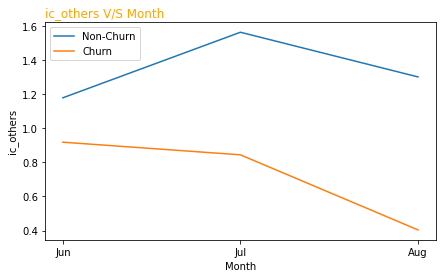

------------------------------------------------------------------------------------
Feature name:  total_rech_num


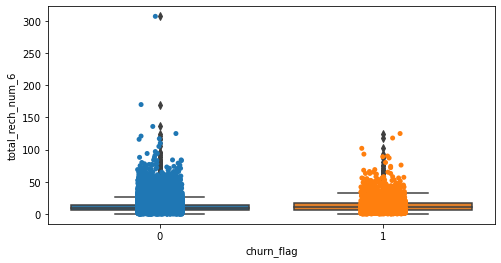

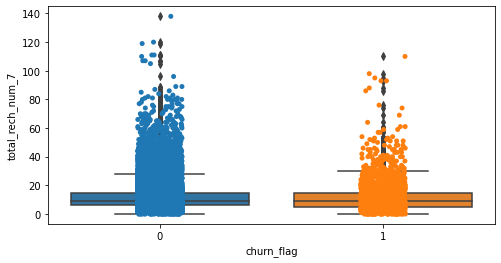

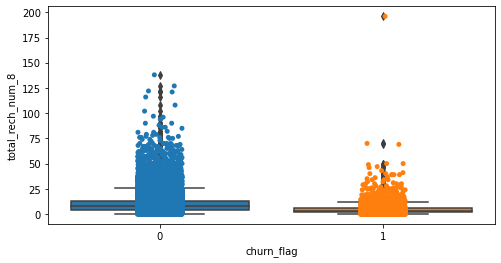

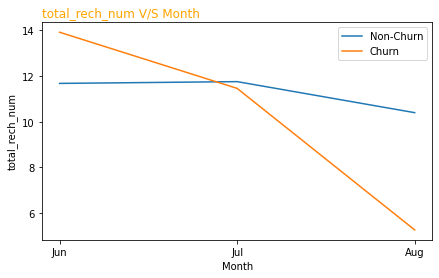

------------------------------------------------------------------------------------
Feature name:  total_rech_amt


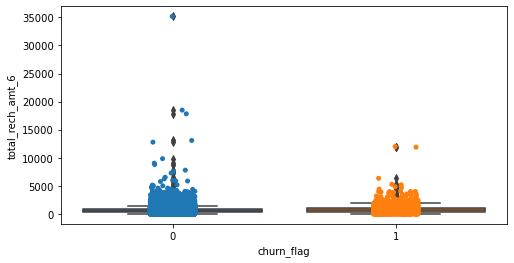

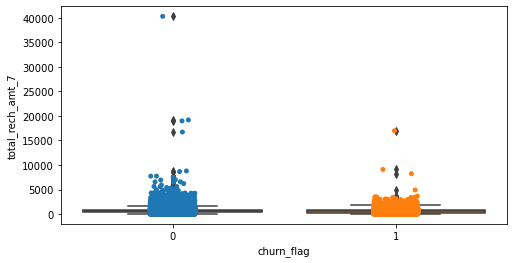

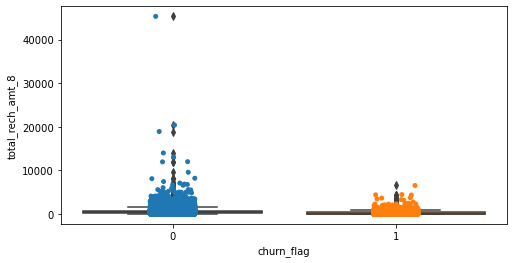

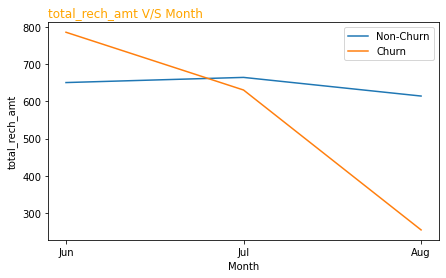

------------------------------------------------------------------------------------
Feature name:  max_rech_amt


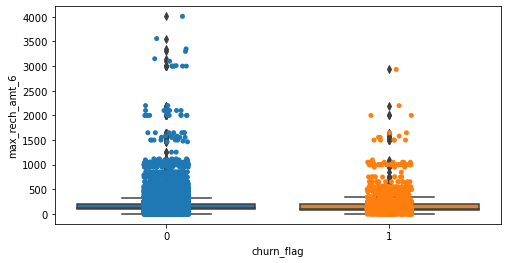

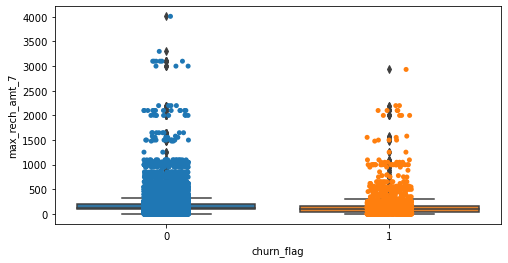

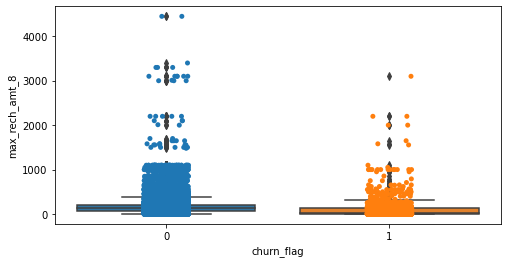

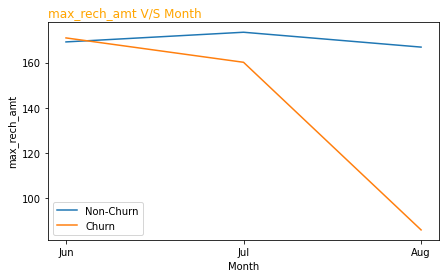

------------------------------------------------------------------------------------
Feature name:  last_day_rch_amt


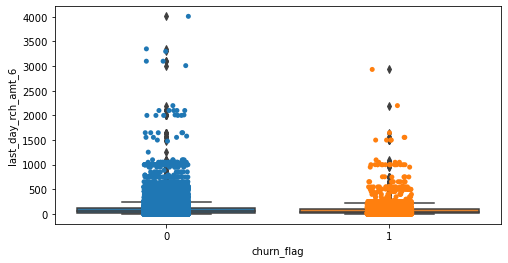

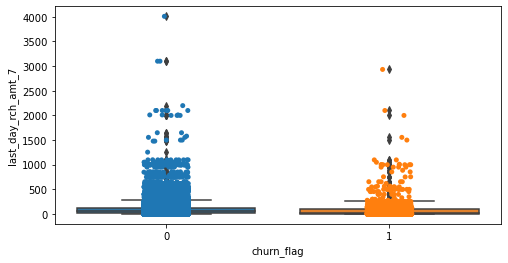

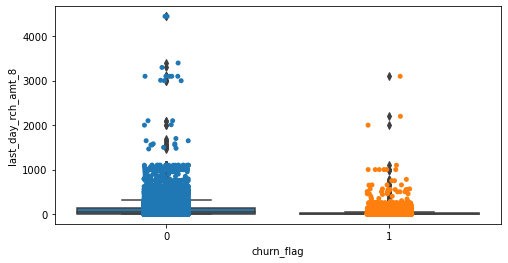

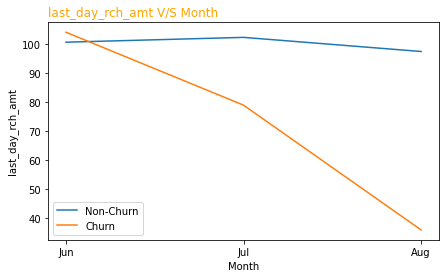

------------------------------------------------------------------------------------
Feature name:  total_rech_data


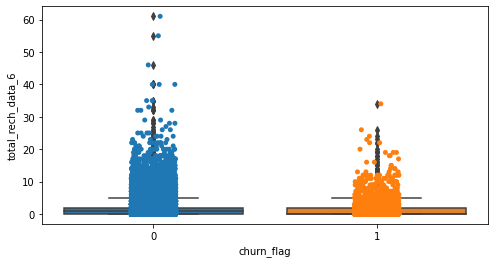

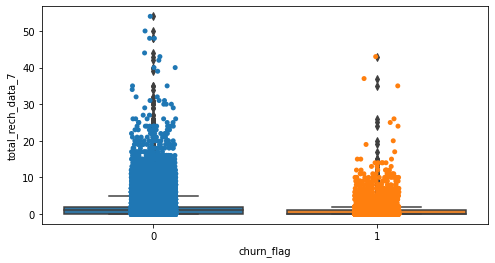

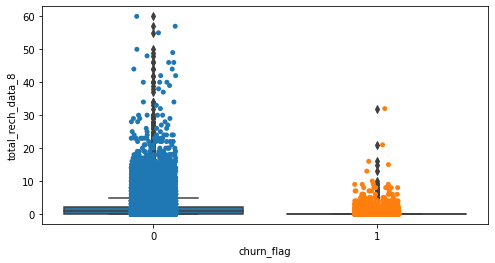

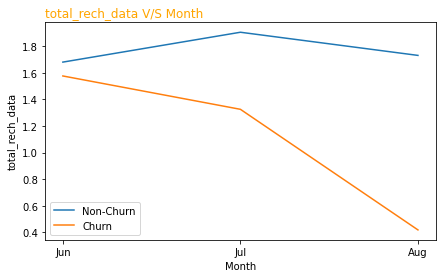

------------------------------------------------------------------------------------
Feature name:  max_rech_data


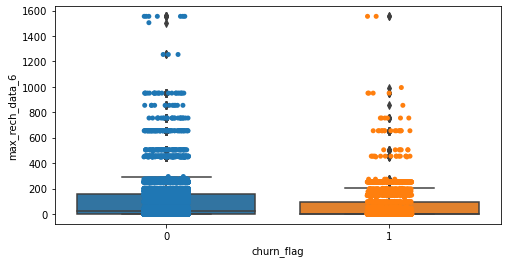

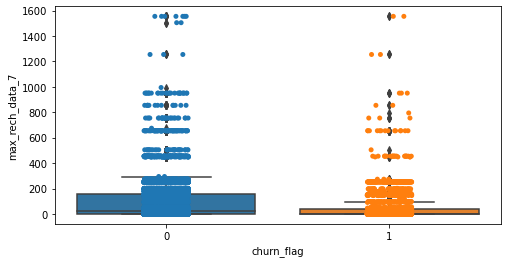

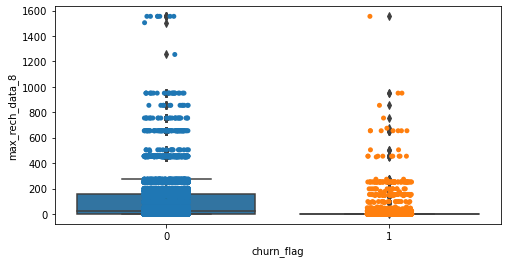

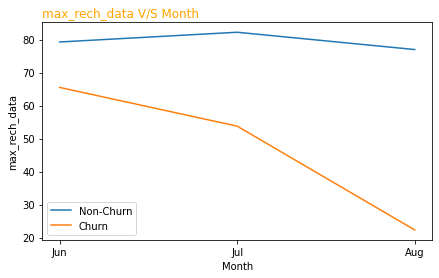

------------------------------------------------------------------------------------
Feature name:  count_rech_2g


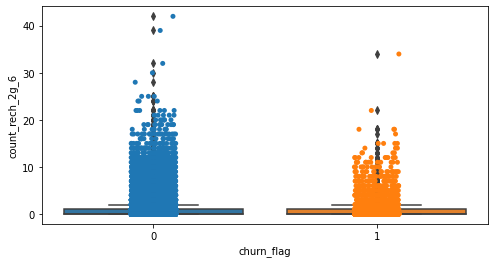

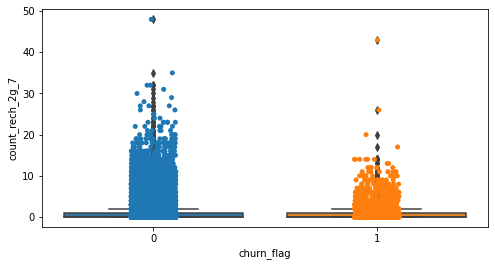

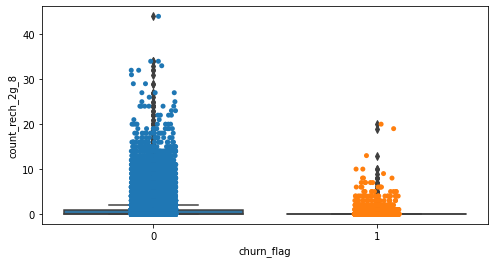

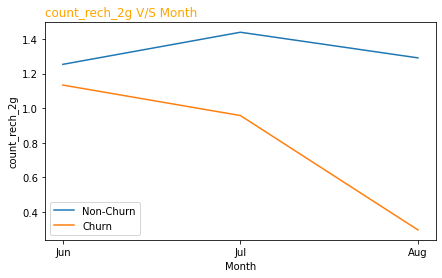

------------------------------------------------------------------------------------
Feature name:  count_rech_3g


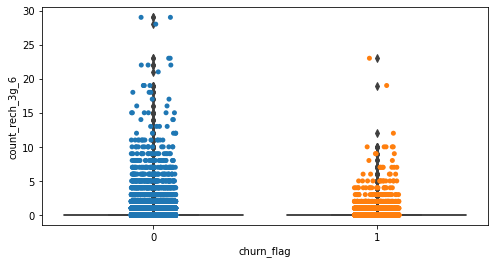

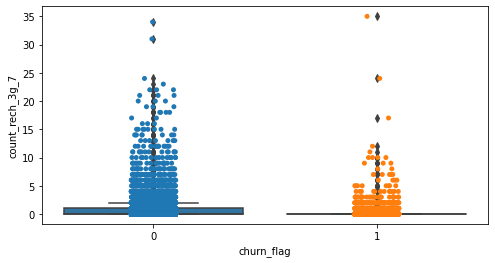

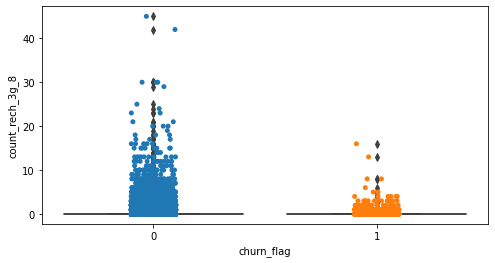

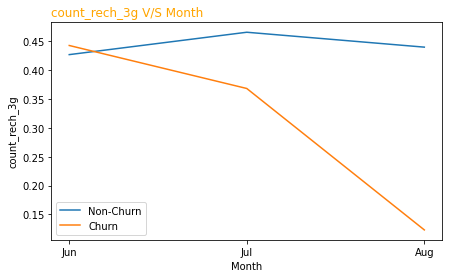

------------------------------------------------------------------------------------
Feature name:  av_rech_amt_data


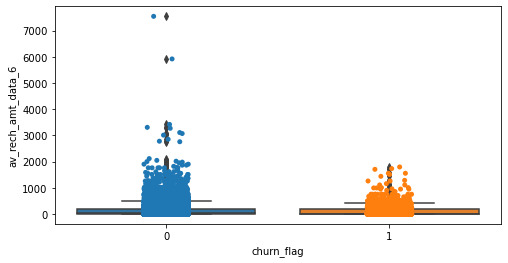

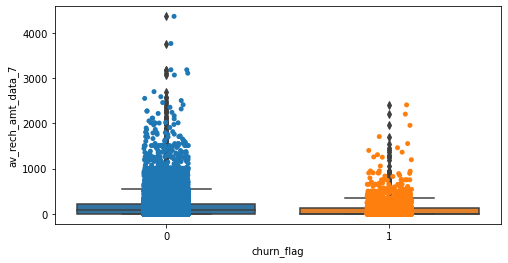

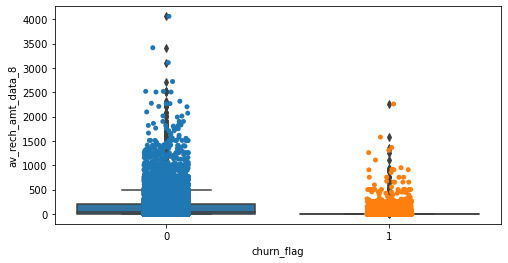

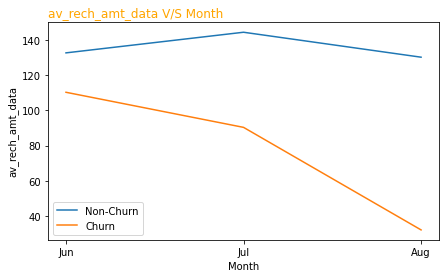

------------------------------------------------------------------------------------
Feature name:  vol_2g_mb


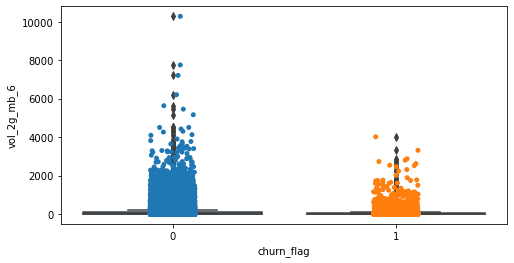

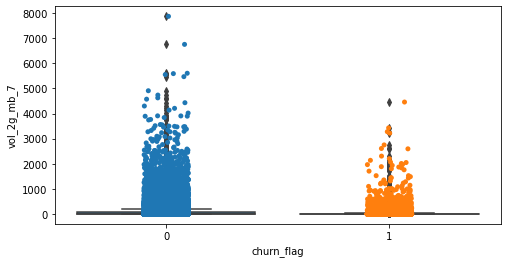

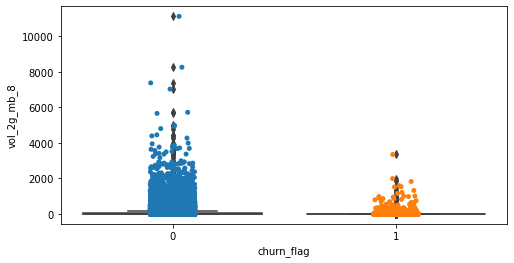

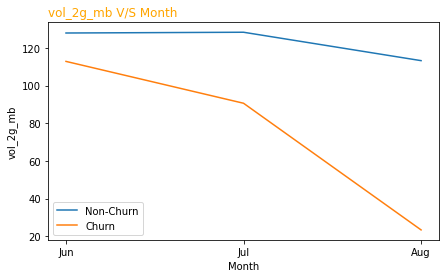

------------------------------------------------------------------------------------
Feature name:  vol_3g_mb


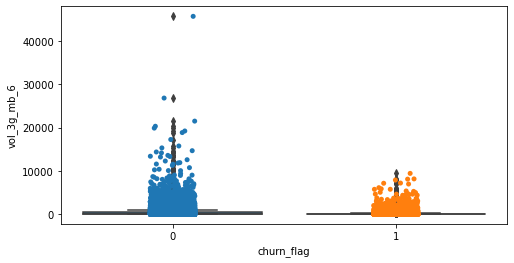

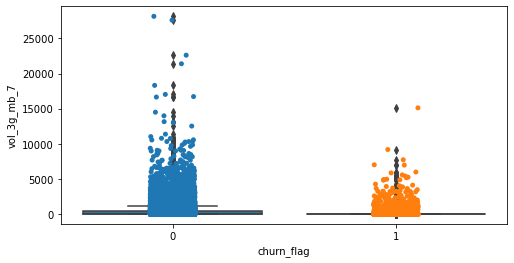

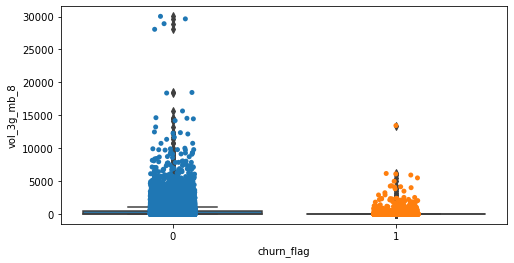

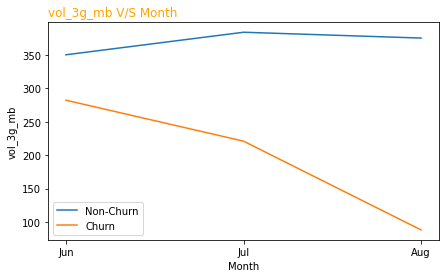

------------------------------------------------------------------------------------
Feature name:  arpu_3g


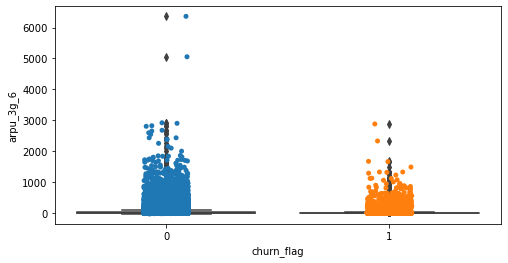

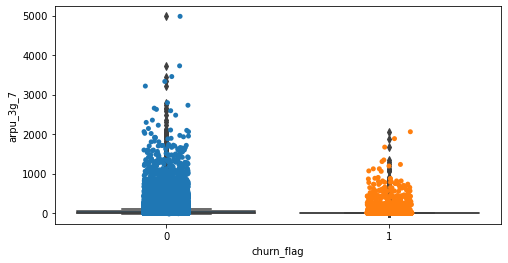

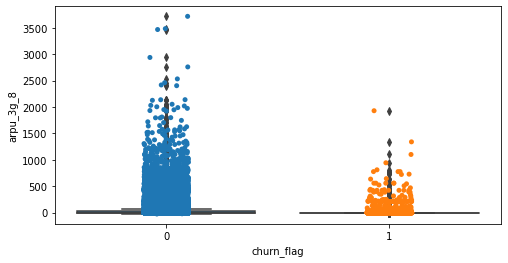

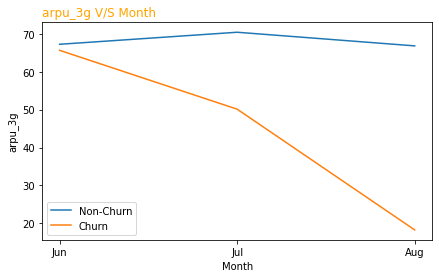

------------------------------------------------------------------------------------
Feature name:  arpu_2g


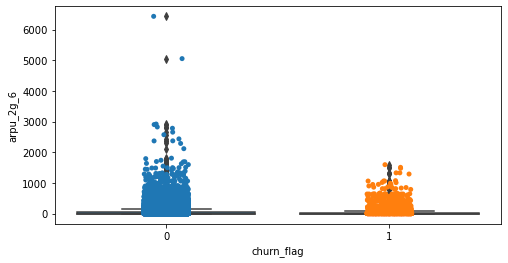

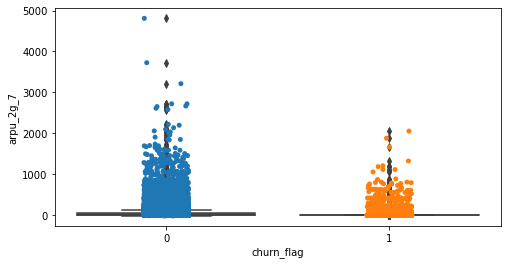

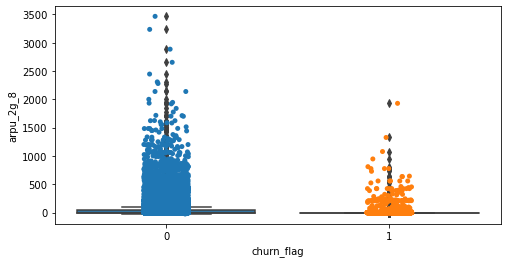

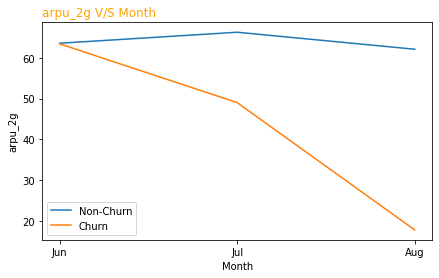

------------------------------------------------------------------------------------
Feature name:  night_pck_user


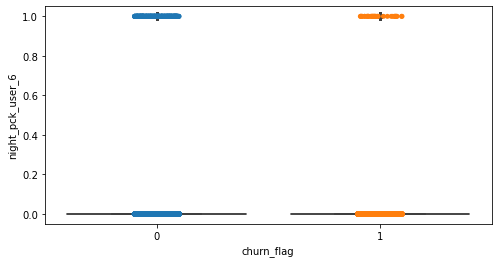

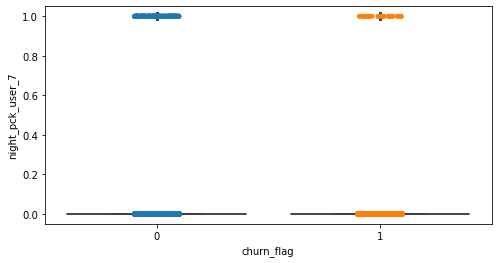

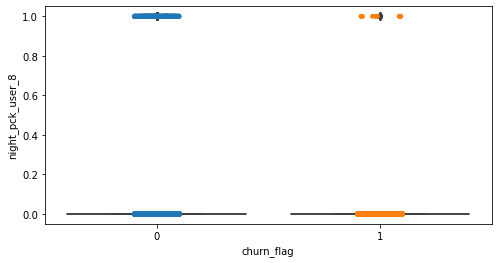

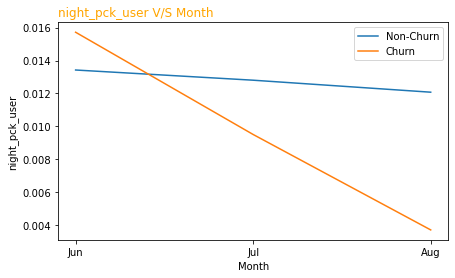

------------------------------------------------------------------------------------
Feature name:  monthly_2g


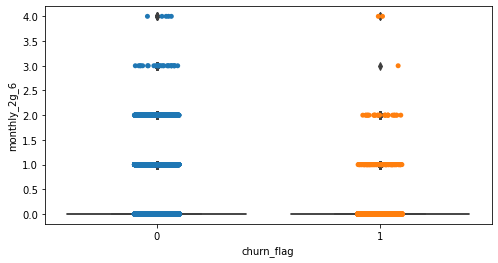

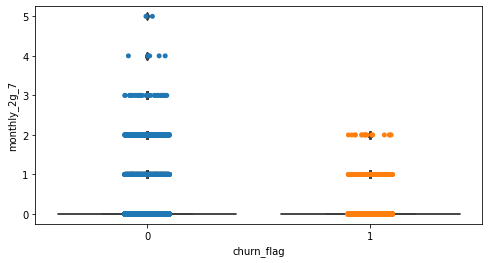

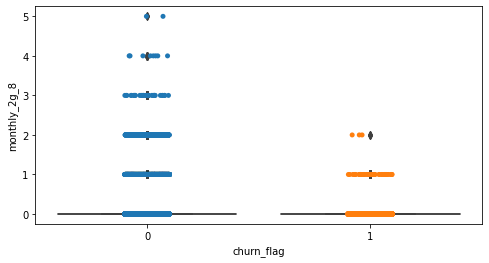

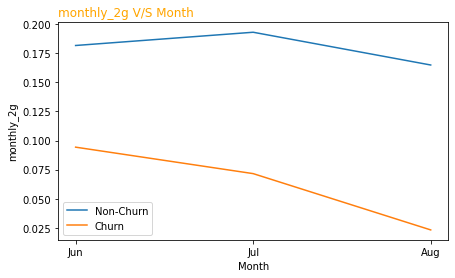

------------------------------------------------------------------------------------
Feature name:  sachet_2g


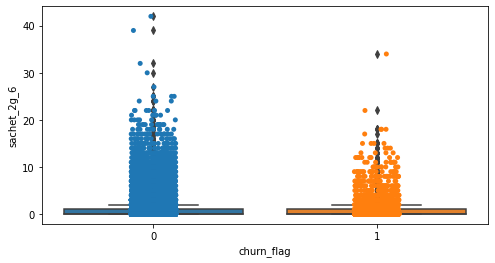

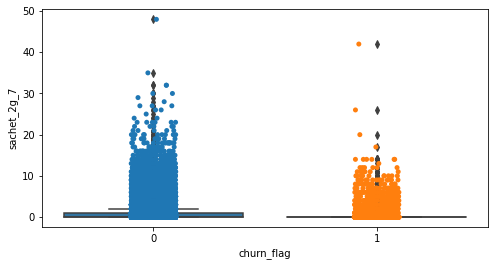

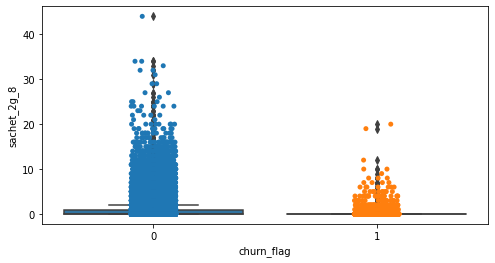

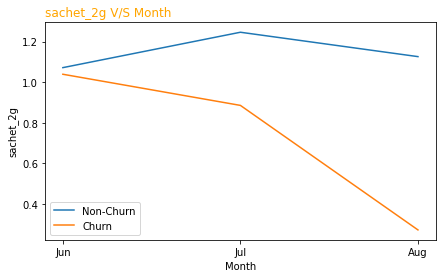

------------------------------------------------------------------------------------
Feature name:  monthly_3g


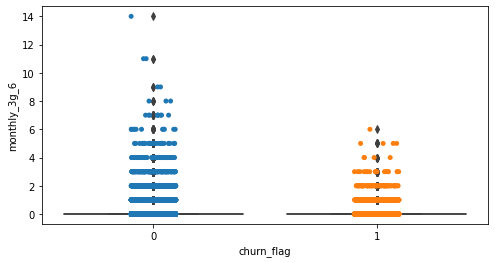

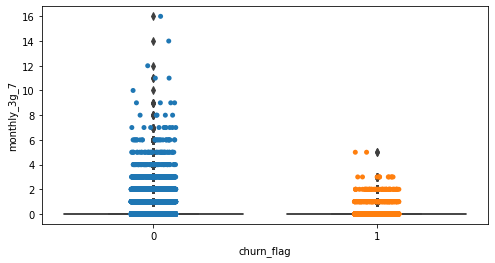

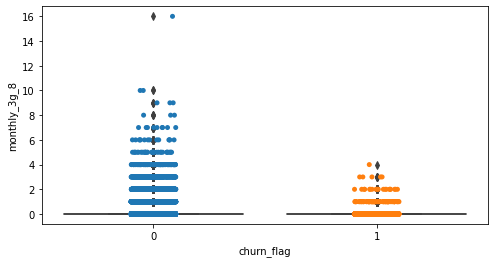

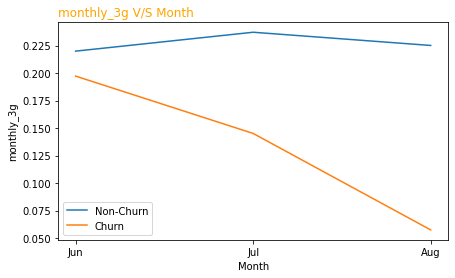

------------------------------------------------------------------------------------
Feature name:  sachet_3g


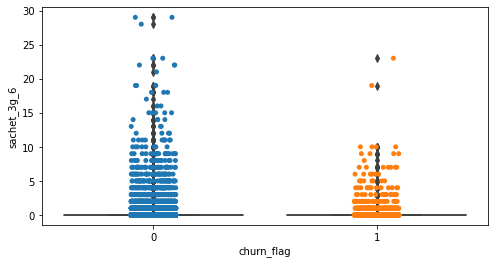

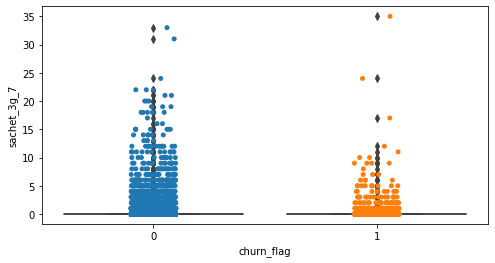

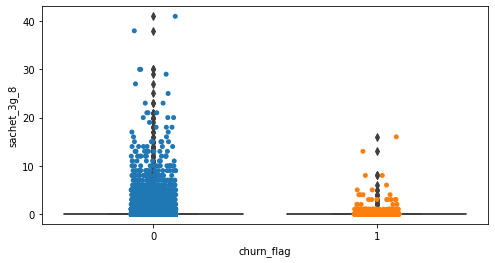

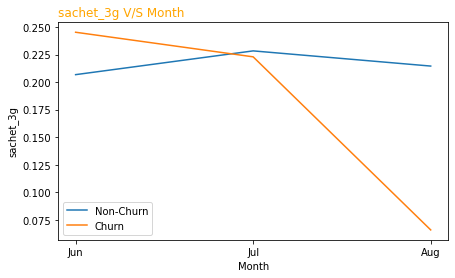

------------------------------------------------------------------------------------
Feature name:  fb_user


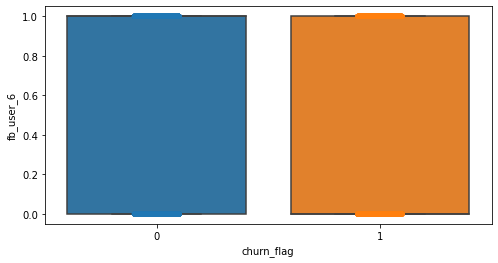

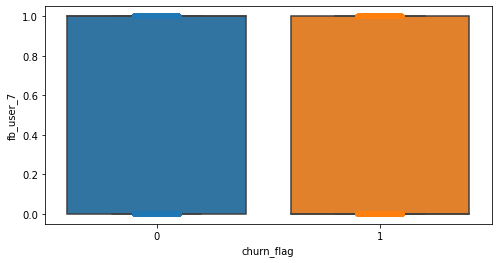

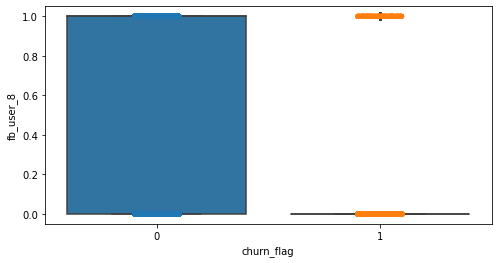

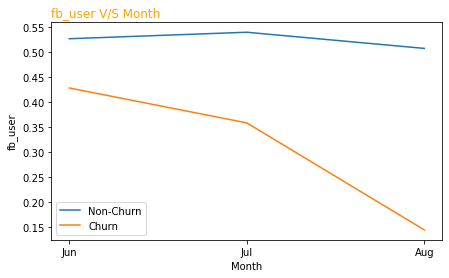

------------------------------------------------------------------------------------
Feature name:  vbc_3g


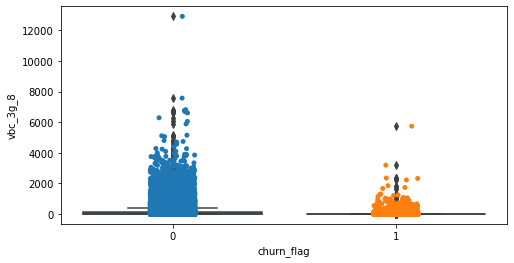

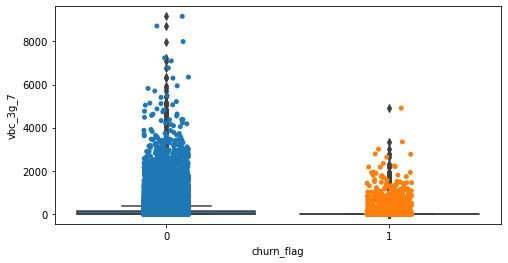

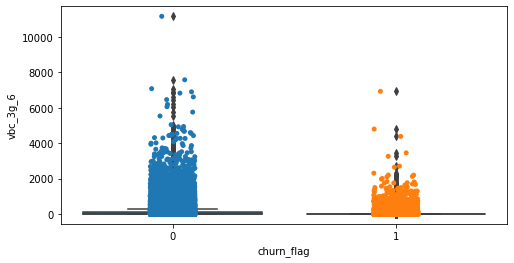

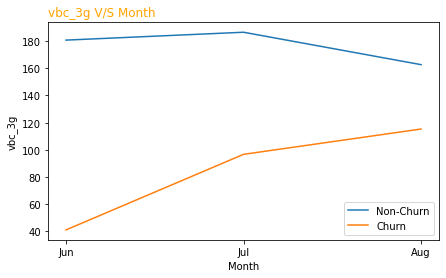

------------------------------------------------------------------------------------
Feature name:  total_data_rech


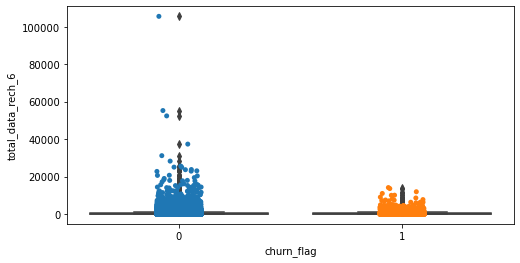

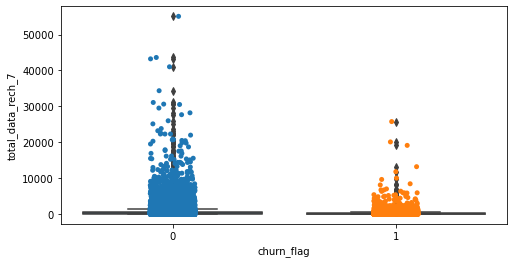

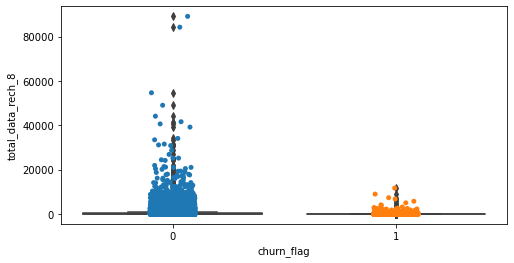

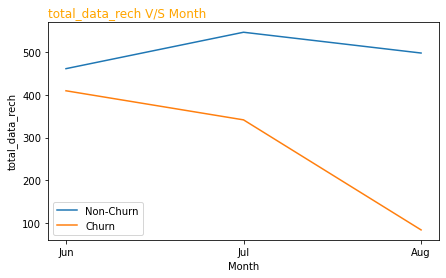

------------------------------------------------------------------------------------
Feature name:  amt_data


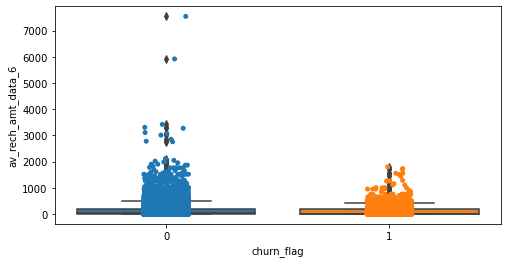

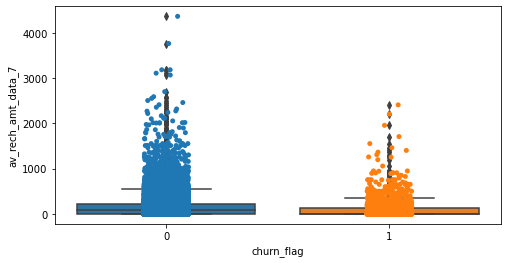

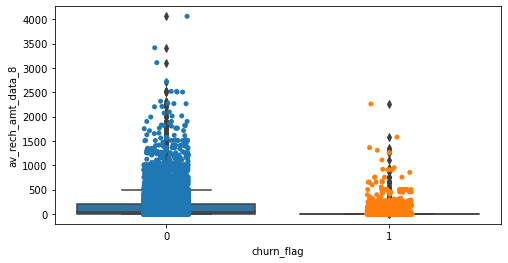

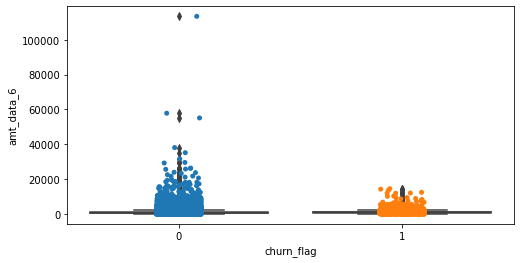

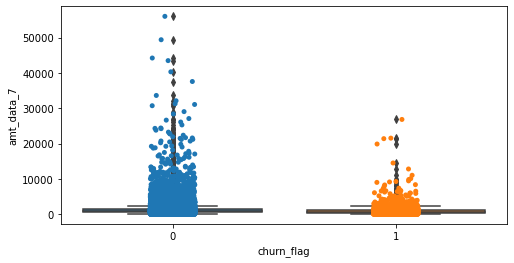

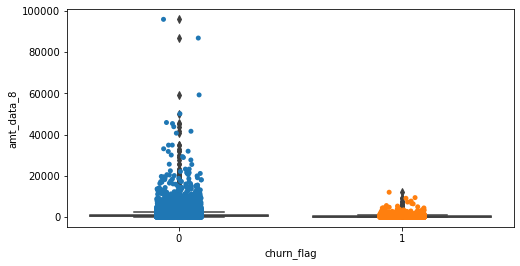

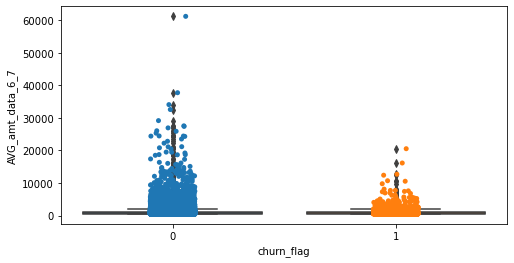

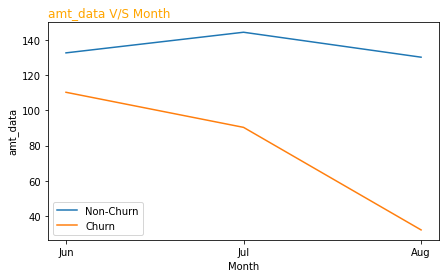

In [101]:
## Draw the distribution plots by months
for feature in month_features:
    if not 'date' in feature:
        print('------------------------------------------------------------------------------------')
        print("Feature name: ",feature)
        colList=df_churn.filter(regex=(feature)).columns
        for col in colList:
            fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(8, 4))
            #plt.legend(['Non-Churn', 'Churn'])
            sns.boxplot(x='churn_flag', y=col, data=df_churn)
            sns.stripplot(x='churn_flag', y=col, data=df_churn, jitter=True, edgecolor="gray")
        distribution_by_churn(df_churn,feature)
        #print('-------------------------------------------------------------------------------------')
        

### Observation:

- Based of the obseravtion above we can find that most of the features have 5-10% outliers. However the outliers distributions are same for both churn and non-churn scenarios. Hence, We don't need any outlier treatment.
- Monthly usage dropped significantly from Jun(6) to Aug(8) for most of the churn cases

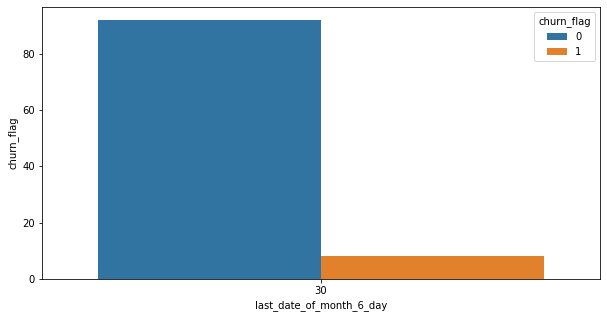

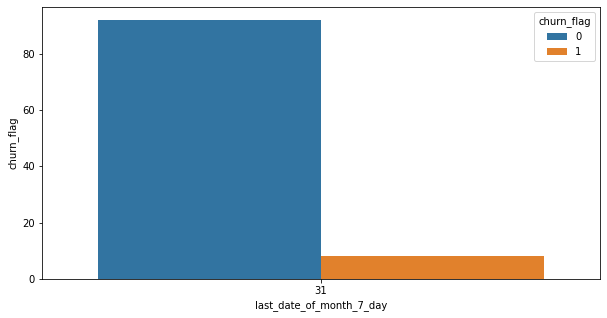

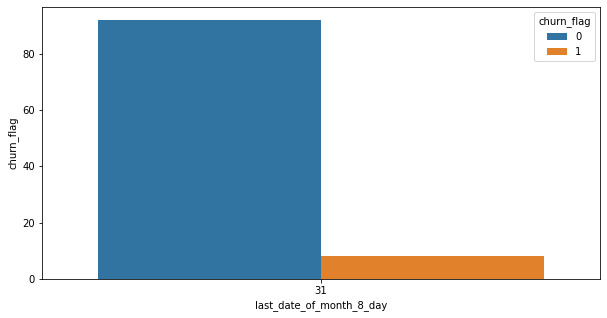

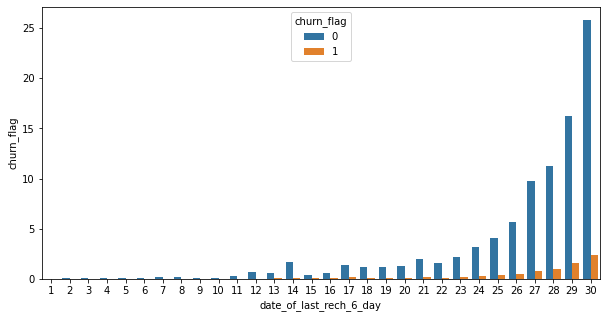

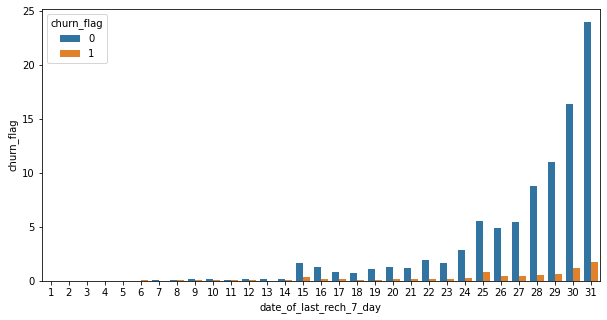

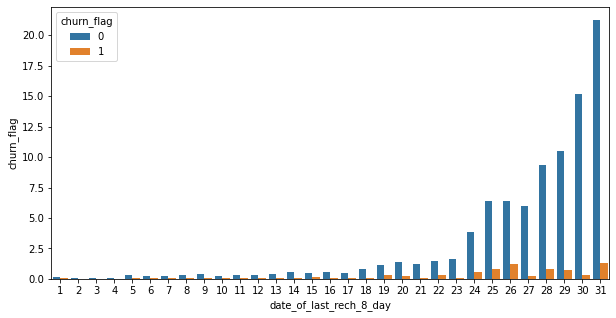

In [102]:
## Data analysis on date features
## Deriving a column to set the day of the month
for feature in month_features:
     if 'date' in feature:
        
        colList=df_churn.filter(regex=(feature)).columns
        for col in colList:
            new_col = col + "_day"
            plt.figure(figsize=(10,5))
            ## Derived column to make it to the day
            df_churn[new_col] = pd.to_datetime(df_churn[col]).dt.day
            sns.barplot(x=new_col, y="churn_flag", hue="churn_flag", data=df_churn, estimator=lambda x: len(x) / len(df_churn) * 100)
            df_churn.drop(new_col , axis=1 , inplace=True)

#### Observation:
- The most of recharges happens at the end of the month for both churn and non-churn cases
- last_date_of_month is same for all the months Jun(6),Jul(7) and Aug(8) as expected

In [103]:
## Let's check if there is any further features with unique values
unique_stats = pd.DataFrame(df_churn.nunique()).reset_index().rename(columns = {'index': 'feature', 0: 'nunique'})
print(unique_stats[unique_stats['nunique'] == 1])
print('%d features with a single unique value.\n' % len(unique_stats[unique_stats['nunique'] == 1]))

                feature  nunique
0  last_date_of_month_6        1
1  last_date_of_month_7        1
2  last_date_of_month_8        1
3 features with a single unique value.



In [104]:
## Lets drop last_date_of_month as this is not important as it contains the unique values
df_churn = df_churn.drop(columns = list(unique_stats[unique_stats['nunique'] == 1]['feature']))

## Derived Features:

- In this section we will derive some features from the existing features

In [105]:
## Let's start with the last reacharge days - to figure out if the day or the date of the week is causing any troubles
for i in range(6,9):
    df_churn['date_of_last_rech_day_'+str(i)] = df_churn['date_of_last_rech_'+str(i)].dt.day
    df_churn['date_of_last_rech_dayofwk_'+str(i)] = df_churn['date_of_last_rech_'+str(i)].dt.dayofweek.astype(str)

In [106]:
## Let's check the data frame
df_churn.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29906 entries, 0 to 99997
Data columns (total 169 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   arpu_6                       29906 non-null  float64       
 1   arpu_7                       29906 non-null  float64       
 2   arpu_8                       29906 non-null  float64       
 3   onnet_mou_6                  29906 non-null  float64       
 4   onnet_mou_7                  29906 non-null  float64       
 5   onnet_mou_8                  29906 non-null  float64       
 6   offnet_mou_6                 29906 non-null  float64       
 7   offnet_mou_7                 29906 non-null  float64       
 8   offnet_mou_8                 29906 non-null  float64       
 9   roam_ic_mou_6                29906 non-null  float64       
 10  roam_ic_mou_7                29906 non-null  float64       
 11  roam_ic_mou_8                29906 non-n

In [107]:
## Check the numerical features
df_churn.describe()

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  29906.000000  29906.000000  29906.000000  29906.000000  29906.000000   
mean     558.806269    561.616785    509.247607    261.171296    268.288923   
std      460.374956    480.202624    502.346776    460.136333    480.586917   
min    -2258.709000  -2014.045000   -945.808000      0.000000      0.000000   
25%      310.568500    310.641000    231.802000     17.160000     16.045000   
50%      482.619000    481.813000    427.616000     84.780000     82.890000   
75%      700.290750    699.132750    662.286750    290.895000    290.755000   
max    27731.088000  35145.834000  33543.624000   7376.710000   8157.780000   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  29906.000000  29906.000000  29906.000000  29906.000000   29906.000000   
mean     234.500335    374.178469    378.617878    335.389773      16.143950   
std      458.952539    482.957035    499.398782    482.226943      76.401177   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%       10.510000     71.730000     70.090000     46.895000       0.000000   
50%       65.730000    222.860000    220.300000    183.035000       0.000000   
75%      240.710000    488.307500    494.437500    438.937500       0.000000   
max    10752.560000   8362.360000   9667.130000  14007.340000    2613.310000   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count   29906.000000   29906.000000   29906.000000   29906.000000   
mean       12.664033      12.530086      26.623576      20.184344   
std        75.891527      74.235971     116.354841      96.206562   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      3813.290000    4169.810000    3775.110000    2812.040000   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count   29906.000000      29906.000000      29906.000000      29906.000000   
mean       19.917004         84.665095         85.847614         78.227214   
std       104.879093        229.124147        240.874675        227.701332   
min         0.000000          0.000000          0.000000          0.000000   
25%         0.000000          4.380000          4.630000          2.550000   
50%         0.000000         24.380000         24.745000         20.780000   
75%         0.000000         78.225000         78.540000         72.225000   
max      5337.040000       6431.330000       7400.660000      10752.560000   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
count      29906.000000      29906.000000      29906.000000      29906.000000   
mean         163.453724        163.225681        151.923362          6.350698   
std          250.358495        241.815823        233.860467         22.151286   
min            0.000000          0.000000          0.000000          0.000000   
25%           19.210000         20.540000         13.210000          0.000000   
50%           77.360000         79.070000         67.840000          0.000000   
75%          209.152500        208.755000        197.075000          4.230000   
max         4729.740000       4557.140000       4961.330000       1466.030000   

       loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
count      29906.000000      29906.000000      29906.000000      29906.000000   
mean           6.428331          5.894056          1.579472          1.889888   
std           21.968278         19.523889          6.312729          9.149669   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.100000          0.0000

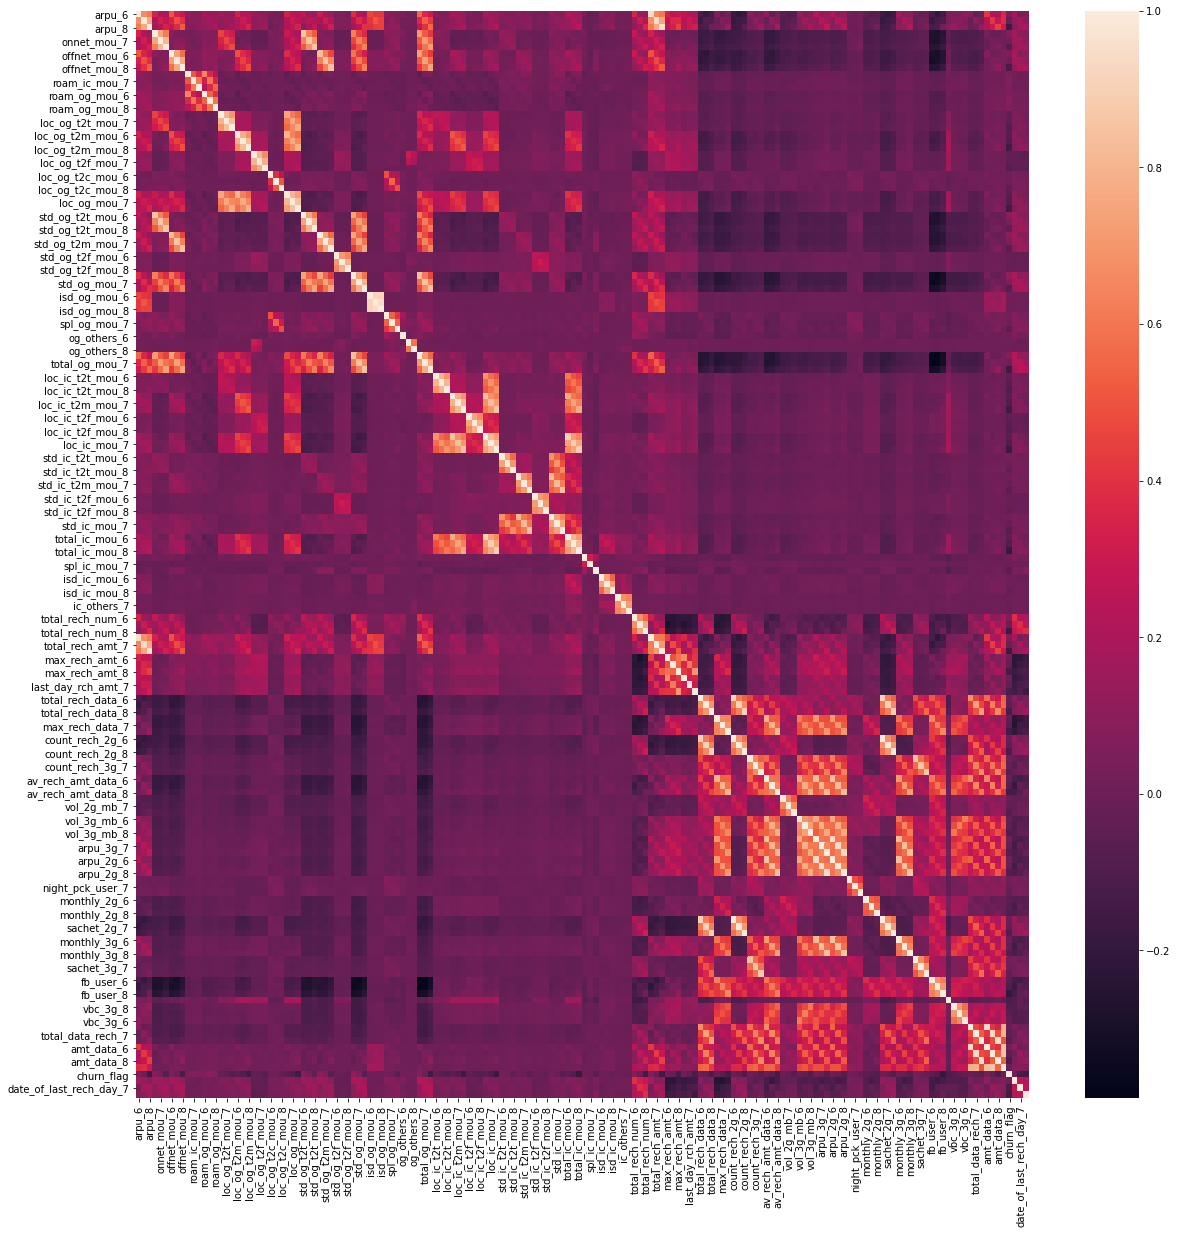

In [108]:
#Check heatmap for correlation
plt.figure(figsize=(20,20))
sns.heatmap(df_churn.corr())

In [109]:
## From the heatmap we can see there are high correlation exists between the features
joincorr= df_churn.corr()
df_corr = joincorr.stack().reset_index().sort_values(by = 0, ascending = False)
df_corr_features=df_corr[((df_corr[0] < 1) & (df_corr[0] >= 0.6)) | ((df_corr[0] <= -0.6) & (df_corr[0] > -1))]
pd.set_option('display.max_rows', df_corr_features.shape[0]+1)
df_corr_features

level_0             level_1         0
17957     count_rech_2g_8         sachet_2g_8  0.987202
22304         sachet_2g_8     count_rech_2g_8  0.987202
17794     count_rech_2g_7         sachet_2g_7  0.986431
22141         sachet_2g_7     count_rech_2g_7  0.986431
17631     count_rech_2g_6         sachet_2g_6  0.984944
21978         sachet_2g_6     count_rech_2g_6  0.984944
419                arpu_8    total_rech_amt_8  0.955317
15392    total_rech_amt_8              arpu_8  0.955317
93                 arpu_6    total_rech_amt_6  0.946230
15066    total_rech_amt_6              arpu_6  0.946230
15229    total_rech_amt_7              arpu_7  0.943547
256                arpu_7    total_rech_amt_7  0.943547
7010         isd_og_mou_7        isd_og_mou_8  0.943125
7171         isd_og_mou_8        isd_og_mou_7  0.943125
24942   total_data_rech_8          amt_data_8  0.941899
25425          amt_data_8   total_data_rech_8  0.941899
20052           arpu_3g_6           arpu_2g_6  0.940060
20535           arpu_2g_6           arpu_3g_6  0.940060
20378           arpu_3g_8           arpu_2g_8  0.937739
20861           arpu_2g_8           arpu_3g_8  0.937739
20698           arpu_2g_7           arpu_3g_7  0.936457
20215           arpu_3g_7           arpu_2g_7  0.936457
24779   total_data_rech_7          amt_data_7  0.934690
25262          amt_data_7   total_data_rech_7  0.934690
24616   total_data_rech_6          amt_data_6  0.934173
25099          amt_data_6   total_data_rech_6  0.934173
6848         isd_og_mou_6        isd_og_mou_8  0.918192
7170         isd_og_mou_8        isd_og_mou_6  0.918192
7008         isd_og_mou_7        isd_og_mou_6  0.915247
6847         isd_og_mou_6        isd_og_mou_7  0.915247
17598     count_rech_2g_6   total_rech_data_6  0.911375
16632   total_rech_data_6     count_rech_2g_6  0.911375
17761     count_rech_2g_7   total_rech_data_7  0.910252
16795   total_rech_data_7     count_rech_2g_7  0.910252
17924     count_rech_2g_8   total_rech_data_8  0.906666
16958   total_rech_data_8     count_rech_2g_8  0.906666
16822   total_rech_data_7         sachet_2g_7  0.904230
22135         sachet_2g_7   total_rech_data_7  0.904230
16659   total_rech_data_6         sachet_2g_6  0.903885
21972         sachet_2g_6   total_rech_data_6  0.903885
22298         sachet_2g_8   total_rech_data_8  0.900659
16985   total_rech_data_8         sachet_2g_8  0.900659
10284        loc_ic_mou_6      total_ic_mou_6  0.896409
12699      total_ic_mou_6        loc_ic_mou_6  0.896409
13025      total_ic_mou_8        loc_ic_mou_8  0.896203
10610        loc_ic_mou_8      total_ic_mou_8  0.896203
10447        loc_ic_mou_7      total_ic_mou_7  0.884351
12862      total_ic_mou_7        loc_ic_mou_7  0.884351
23279         sachet_3g_8     count_rech_3g_8  0.875255
18449     count_rech_3g_8         sachet_3g_8  0.875255
842           onnet_mou_8    std_og_t2t_mou_8  0.860569
5189     std_og_t2t_mou_8         onnet_mou_8  0.860569
5026     std_og_t2t_mou_7         onnet_mou_7  0.860279
679           onnet_mou_7    std_og_t2t_mou_7  0.860279
4863     std_og_t2t_mou_6         onnet_mou_6  0.859306
516           onnet_mou_6    std_og_t2t_mou_6  0.859306
18286     count_rech_3g_7         sachet_3g_7  0.857974
23116         sachet_3g_7     count_rech_3g_7  0.857974
25267          amt_data_7    AVG_amt_data_6_7  0.856256
25589    AVG_amt_data_6_7          amt_data_7  0.856256
22808        monthly_3g_8           arpu_2g_8  0.854798
20876           arpu_2g_8        monthly_3g_8  0.854798
5515     std_og_t2m_mou_7        offnet_mou_7  0.854591
1168         offnet_mou_7    std_og_t2m_mou_7  0.854591
22953         sachet_3g_6     count_rech_3g_6  0.851163
18123     count_rech_3g_6         sachet_3g_6  0.851163
6695         std_og_mou_8      total_og_mou_8  0.851130
8627       total_og_mou_8        std_og_mou_8  0.851130
20713           arpu_2g_7        monthly_3g_7  0.850965
22645        monthly_3g_7           arpu_2g_7  0.850965
1331         offnet_mou_8    std_og_t2m_mo

#### Observation: 
- Looking at the highly correlated features , it appears that there are high correlations between the same features but with different months.
- Since, the monthly features are important to determine the churn cases. We can not simply drop them at this moment as there can be a potential loss of information
- We can try to derive some useful features out of them.

In [110]:
columns=[]

## Step 01:  Let's try to take average from the good month's feature and try to derive a new variable from them. 
for col in df_churn.columns:
    if col.endswith('_6') and not 'date' in col:
        nCol = col.rstrip('_6')
        df_churn['AVG_'+nCol+'_6_7'] = df_churn[[nCol+'_6',nCol+'_7']].mean(axis=1)
        df_churn['is_'+nCol+'_flag'] = np.where((df_churn[nCol+'_8'] > df_churn['AVG_'+nCol+'_6_7']), 0, 1)
        columns.append(nCol)

#### We have dervied 2 features from each monthly features
- Average of good months June(6) and July(7)
- A variable that flags the increase or decrease of usage in August(8) from the average usage of June(6) and July(8)

In [111]:
## Step 02: Find the difference between the values of all the months and then try to derive some more features

for col in df_churn.columns:
    if col.endswith('_6') and not 'date' in col:
        nCol = col.rstrip('_6')
        df_churn[nCol+'_7diff6'] = df_churn[nCol+'_7'] - df_churn[nCol+'_6']
        df_churn[nCol+'_8diff7'] = df_churn[nCol+'_8'] - df_churn[nCol+'_7']

#### We have dervied two more features with difference of usage from July to June and August to July.

In [112]:
## Step 03: Check if we have all the new features created
df_churn.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29906 entries, 0 to 99997
Data columns (total 376 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   arpu_6                       float64       
 1   arpu_7                       float64       
 2   arpu_8                       float64       
 3   onnet_mou_6                  float64       
 4   onnet_mou_7                  float64       
 5   onnet_mou_8                  float64       
 6   offnet_mou_6                 float64       
 7   offnet_mou_7                 float64       
 8   offnet_mou_8                 float64       
 9   roam_ic_mou_6                float64       
 10  roam_ic_mou_7                float64       
 11  roam_ic_mou_8                float64       
 12  roam_og_mou_6                float64       
 13  roam_og_mou_7                float64       
 14  roam_og_mou_8                float64       
 15  loc_og_t2t_mou_6             float64       
 16  loc

### Feature Selection

#### Introduction

When building a machine learning model in real-life, it’s almost rare that all the variables in the dataset are useful to build a model. Adding redundant variables reduces the generalization capability of the model and may also reduce the overall accuracy of a classifier. Furthermore adding more and more variables to a model increases the overall complexity of the model.

As per the Law of Parsimony of ‘Occam’s Razor’, the best explanation to a problem is that which involves the fewest possible assumptions. Thus, feature selection becomes an indispensable part of building machine learning models.

#### Methods for Feature selection

There are several ways for feature selection: To begin with all feature selection starts with some business domain knowledge. Variables that are relevant, available prior to modeling should be used.

- Variables with no variance or single value should be eliminated. We did such an analysis of understanding the data and eliminated the variables.
- Nominal data with no specific relevant to the modeling exercise can be removed- like mobile_number.
- Variables like Date can be converted to numerical by extracting features like day of a week, day of a month etc.
- Categorical variables have to be encoded as dummy variables

Other more automated methods for feature selection are: 

1) **Filter Methods** – features are selected on the basis of their scores in various statistical tests for their relationship with the outcome variable. Eg: Correlation, Anova, Linear Discriminant analysis, Chi-square test 

2) **Wrapper Methods** – Is like a search problem and is iterative. We add/delete a subset of features, train a model iteratively until the best possible model is found. Examples are:

- Forward selection
- Backward selection
- Recursive feature elimination


3) **Embedded Methods** - Embedded methods combine the qualities of both filter and wrapper methods. These Algorithms that have their own built-in feature selection methodology implement it. Examples are:

- Lasso Regression
- Ridge Regression
- Random Forest with Gini coefficient
- Gradient boosting with feature importance

For more details please have a look at this article - https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/



In [113]:
## Let's drop date related features as we derived new features out of it
df_churn.drop(list(df_churn.select_dtypes(include=['datetime64']).columns),axis=1,inplace=True)

In [114]:
## Since we have the good data for both month 6, 7 as average, we dont need the raw columns, so dropping them
for col in columns:
    df_churn.drop([col+'_6',col+'_7'],axis=1, inplace=True)

In [115]:
df_churn.shape

(29906, 269)

In [116]:
## We are trying to identify the highly correlated features
## For more details please have a look at this article https://stackabuse.com/applying-filter-methods-in-python-for-feature-selection/
correlation_matrix = df_churn.corr()
AbsoluteCorrelationMatrix = correlation_matrix.abs()
AbsoluteCorrelationMatrix = AbsoluteCorrelationMatrix.where(np.triu(np.ones(AbsoluteCorrelationMatrix.shape), k=1).astype(np.bool))
highCorrelatedIndices = np.where(AbsoluteCorrelationMatrix > 0.8)
correlated_pairs = [(AbsoluteCorrelationMatrix.index[x], AbsoluteCorrelationMatrix.columns[y]) 
                     for x,y in zip(*highCorrelatedIndices) if x!=y and x < y]

print("Total Number of correlated pairs: ", len(correlated_pairs))
print(correlated_pairs)

Total Number of correlated pairs:  71
[('arpu_8', 'total_rech_amt_8'), ('onnet_mou_8', 'std_og_t2t_mou_8'), ('offnet_mou_8', 'std_og_t2m_mou_8'), ('loc_og_t2t_mou_8', 'AVG_loc_og_t2t_mou_6_7'), ('loc_og_mou_8', 'AVG_loc_og_mou_6_7'), ('std_og_mou_8', 'total_og_mou_8'), ('isd_og_mou_8', 'AVG_isd_og_mou_6_7'), ('loc_ic_t2m_mou_8', 'loc_ic_mou_8'), ('loc_ic_mou_8', 'total_ic_mou_8'), ('loc_ic_mou_8', 'AVG_loc_ic_mou_6_7'), ('std_ic_t2m_mou_8', 'std_ic_mou_8'), ('total_ic_mou_8', 'AVG_total_ic_mou_6_7'), ('total_rech_data_8', 'count_rech_2g_8'), ('total_rech_data_8', 'sachet_2g_8'), ('max_rech_data_8', 'av_rech_amt_data_8'), ('count_rech_2g_8', 'sachet_2g_8'), ('count_rech_3g_8', 'sachet_3g_8'), ('av_rech_amt_data_8', 'arpu_3g_8'), ('av_rech_amt_data_8', 'arpu_2g_8'), ('arpu_3g_8', 'arpu_2g_8'), ('arpu_3g_8', 'monthly_3g_8'), ('arpu_2g_8', 'monthly_3g_8'), ('total_data_rech_8', 'amt_data_8'), ('AVG_amt_data_6_7', 'AVG_total_data_rech_6_7'), ('AVG_arpu_6_7', 'AVG_total_rech_amt_6_7'), ('AVG

In [117]:
## Lets drop the features with very high correlations 
corr_matrix = df_churn.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]

In [118]:
df_churn.drop(columns=to_drop, axis=1,inplace=True)

In [119]:
## Let's drop the Object and categorical columns , since we have derived all the numerical features for model building
list(df_churn.select_dtypes(include=['category']).columns)

['aon_bin']

In [120]:
df_churn.drop(columns = list(df_churn.select_dtypes(include=['category']).columns), axis =1, inplace = True)

In [121]:
list(df_churn.select_dtypes(include=[object]).columns)

['date_of_last_rech_dayofwk_6',
 'date_of_last_rech_dayofwk_7',
 'date_of_last_rech_dayofwk_8']

In [122]:
df_churn.drop(columns = list(df_churn.select_dtypes(include=[object]).columns), axis = 1, inplace = True)

In [123]:
df_churn.shape

(29906, 227)

In [124]:
## Check if we have any missing columns in any of the features
df_churn.isnull().values.any()

False

#### Observation:
- We have dropped and some features not important for analysis and we don't have any null values in the dataset

## 04. Model Building

In [125]:
## Import libraries
import sklearn.preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [126]:
from sklearn.model_selection import train_test_split

#putting features variables in X
X = df_churn.drop(['churn_flag'], axis=1)

#putting response variables in Y
y = df_churn['churn_flag']    

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [127]:
#Rescaling the features before PCA as it is sensitive to the scales of the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [128]:
# fitting and transforming the scaler on train
X_train = scaler.fit_transform(X_train)
# transforming the train using the already fit scaler
X_test = scaler.transform(X_test)

#### Handling class imbalance.

Standard classifier algorithms like Decision Tree and Logistic Regression have a bias towards classes which have number of instances. They tend to only predict the majority class data. The features of the minority class are treated as noise and are often ignored. Thus, there is a high probability of misclassification of the minority class as compared to the majority class.

#### Informed Over Sampling: Synthetic Minority Over-sampling Technique

This technique is followed to avoid overfitting which occurs when exact replicas of minority instances are added to the main dataset. A subset of data is taken from the minority class as an example and then new synthetic similar instances are created. These synthetic instances are then added to the original dataset. The new dataset is used as a sample to train the classification models.

Advantages

- Mitigates the problem of overfitting caused by random oversampling as synthetic examples are generated rather than replication of instances
- No loss of useful information


For more details please have a look  - https://imbalanced-learn.readthedocs.io/en/stable/over_sampling.html

Prerequisite : Please download and install the imblearn library using **pip install imblearn**


In [129]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))
print("Before OverSampling, churn event rate : {}% \n".format(round(sum(y_train==1)/len(y_train)*100,2)))

Before OverSampling, counts of label '1': 1700
Before OverSampling, counts of label '0': 19234 

Before OverSampling, churn event rate : 8.12% 



In [130]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [131]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))
print("After OverSampling, churn event rate : {}% \n".format(round(sum(y_train_res==1)/len(y_train_res)*100,2)))

After OverSampling, the shape of train_X: (38468, 226)
After OverSampling, the shape of train_y: (38468,) 

After OverSampling, counts of label '1': 19234
After OverSampling, counts of label '0': 19234
After OverSampling, churn event rate : 50.0% 



#### Observation: 
- Applying Synthetic Minority Over-sampling Technique , we have overcome the class imbalance issue in our dataset. We  have 50% churn and 50% non-churn cases in our datasets. Let's proceed with PCA further. 

#### PCA - Principle Component Analysis

n observations with p features can be interpreted as n points in a p-dimensional space. PCA aims to project this space into a q-dimensional subspace (with q<p) with as little information loss as possible.

It does so by finding the q directions in which the n points vary the most (the principal components). It then projects the original data points into the q-dimensional subspace. PCA returns a n x q dimensional matrix.

Using PCA on our data will decrease the amount of operations during training and testing

For further details please have a look - https://builtin.com/data-science/step-step-explanation-principal-component-analysis


In [132]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [133]:
#Doing the PCA on the train data
pca.fit(X_train_res)

PCA(random_state=42, svd_solver='randomized')

In [134]:
pca.components_

array([[ 5.10641554e-03,  8.43223449e-03,  9.46312113e-03, ...,
         1.61919299e-03,  6.35785573e-04,  1.00732111e-03],
       [-2.78778610e-04, -8.03668226e-03, -7.28907252e-03, ...,
         2.38846184e-03,  5.31806677e-04,  2.01936472e-03],
       [ 4.87598635e-03,  1.35780435e-02,  1.13518064e-02, ...,
         2.44594579e-03,  1.35753655e-04,  2.88020062e-03],
       ...,
       [-0.00000000e+00,  1.49037485e-01, -6.70005441e-02, ...,
         1.29379074e-01,  4.26893763e-15,  2.52142057e-15],
       [ 0.00000000e+00,  6.76415114e-02,  1.25872232e-02, ...,
         2.84677811e-02,  5.86119694e-16,  3.15589568e-15],
       [ 6.38605567e-01,  1.31475248e-04,  5.36844947e-05, ...,
        -6.48418254e-06,  2.23952801e-15, -1.73472348e-18]])

In [135]:
sum(list(pca.explained_variance_ratio_)[:50])

0.9723946312598301

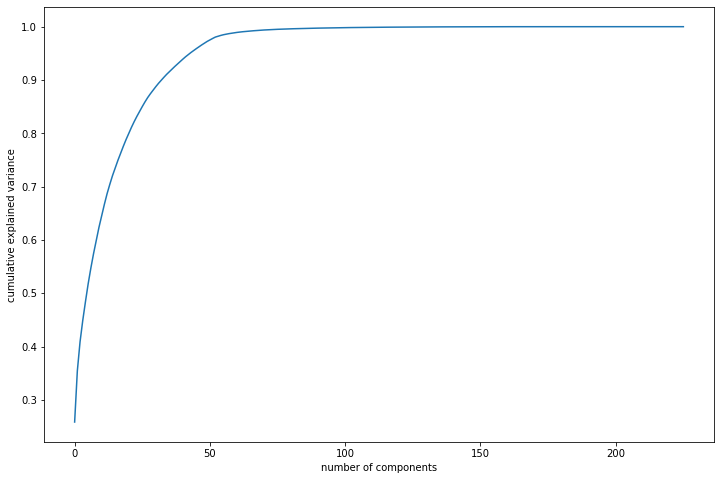

In [136]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#### Observation:
- It looks like 50 components are enough to describe 97.23% of the variance in the dataset

In [137]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=50)

In [138]:
X_train_pca = pca_final.fit_transform(X_train_res)
X_train_pca.shape

(38468, 50)

#### Checking for multicollinearity

In [139]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(X_train_pca.transpose())
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.005434836522287321 , min corr:  -0.0024397264546239367


#### Observation:
- We have effectively removed multicollinearity from our dataset. So, our model will be stable.

In [140]:
#Applying selected components to the test data - 45 components
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(8972, 50)

In [141]:
X_train_pca

array([[-0.22547458, -1.05517037,  0.30850123, ...,  0.40713084,
         0.10935838,  0.44450349],
       [-2.09431933, -1.36142979, -0.34052695, ..., -0.36833181,
         0.02716133,  0.00383986],
       [-0.02873971, -0.20673175,  0.32655345, ..., -0.01505763,
        -0.04931933, -0.06868344],
       ...,
       [ 1.435606  , -0.19197202, -0.69255266, ...,  0.00615676,
         0.0265187 ,  0.01548991],
       [ 1.36060309,  0.02940246,  0.46395773, ..., -0.00270825,
        -0.01602327,  0.00780508],
       [ 0.77977976,  1.0394664 , -0.69541712, ..., -0.01345366,
        -0.03523022, -0.03331512]])

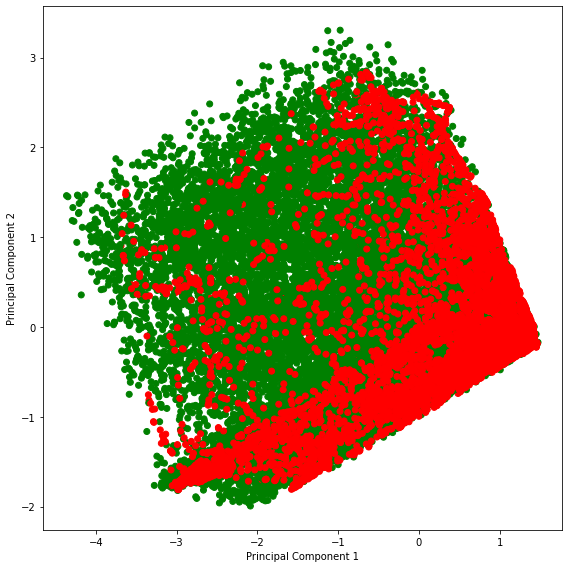

In [269]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c = y_train_res.map({0:'green',1:'red'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

### Evaluation Metrics

After doing the usual feature engineering, selection, implementing a model and getting some output in the form of a probability or a class, the next step is to find out how effective is the model based on some metric using test datasets. The metric explains the performance of a model.

The model may give satisfying results when evaluated using a metric say accuracy_score but may give poor results when evaluated against other metrics such as logarithmic_loss or any other such metric. Hence, it is very much important to choose the right metric to evaluate the Machine Learning model.

Choice of metrics influences how the performance of machine learning algorithms is measured and compared. They influence how we weight the importance of different characteristics in the results.


**Accuracy = correct predictions / total predictions = (TP + TN)/ (all)** For a data set which is balanced, this might make a good measure. For an imbalanced dataset like the current one, where the negative class is heavier, this measure may show a high accuracy but fail to serve the purpose of the modeling exercise. We need to be able to predict non-churn i.e.; positive outcomes correctly to help business. So Accuracy may not be the best measure here.

**Recall(sensitivity) = ability to identify Positives as true = TP/(TP + FN)** Considering that we wish to clearly identify customers who might churn vs non-churn, recall as a metric with its ability to identify true positives might be more apt. But this does not capture models ability to mis-classify negative class as positive i.e.; False positive rate. So, if we choose a model purely based on recall, we might be blind sighted by a huge number of false positive.

**Precision = TP/ (TP + FP) = Positive predictive value:** It is important to not only understand the rate of identifying positives as true but also identify False positives. If business is to make a decision on marketing spend to retain customers to all positive output of the model, it becomes important that the false positive rate should not be too high. So Precision as a metric - which provides the rate of true positive /total predicted positives is an apt metric to look at here.

**F Score = 2 Precision Recall/ (Precision * Recall):** Fscore is the harmonic mean of Precision and Recall and provides the ability to balance the need between having a better true positive rate and not too high a false positive rate.

**Area under the Curve:**

AUC or in the classification world – AUC ROC – Area under the curve for Receiver Operating Characteristic curve is generally used to compare two different models. It used two metrics from the confusion matrix the true positive rate and false positive rate.

**True positive rate (TPR), recall** as described above is proportion of positive data points correctly identified as positive by the model False positive rate (FPR), which is defined as FP/(FP+TN) is all the negative data points that are mistakenly identified as positive as a proportion of all negative data points.

The TPR and FPR metrics are calculated for several threshold values and a curve is plotted with these. The resulting curve is called ROC. AUC is the computation of the area under ROC curve. For a model selection, we always look for maximizing the AUC for the classifier. As this value is comparable across models.


Sources:


https://machinelearningmastery.com/tour-of-evaluation-metrics-for-imbalanced-classification/

https://www.kaggle.com/vipulgandhi/how-to-choose-right-metric-for-evaluating-ml-model


#### Based on our business scenario we will use Recall(sensitivity) as our evaluation metric for our models for it's ability to identify the true positive rates.

#### The below functions are being used for the following purposes
- draw_roc - to draw the ROC curve
- getModelMetrics - get the model metrices based on actual and predicted value on the both train and test dataset
- predictChurnWithProb - funtion to predict the churn using the input probability cut-off
- findOptimalCutoff - function to find the optimal cutoff for classifing as churn/non-churn
- modelfit - function to fit algorithm on the data

In [142]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

In [143]:
def getModelMetrics(actual_churn=False,pred_churn=False):

    confusion = metrics.confusion_matrix(actual_churn, pred_churn)

    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    print("Roc_auc_score : {}".format(metrics.roc_auc_score(actual_churn,pred_churn)))
    # Let's see the sensitivity of our logistic regression model
    print('Sensitivity/Recall : {}'.format(TP / float(TP+FN)))
    # Let us calculate specificity
    print('Specificity: {}'.format(TN / float(TN+FP)))
    # Calculate false postive rate - predicting churn when customer does not have churned
    print('False Positive Rate: {}'.format(FP/ float(TN+FP)))
    # positive predictive value 
    print('Positive predictive value: {}'.format(TP / float(TP+FP)))
    # Negative predictive value
    print('Negative Predictive value: {}'.format(TN / float(TN+ FN)))
    # sklearn precision score value 
    print('sklearn precision score value: {}'.format(metrics.precision_score(actual_churn, pred_churn )))

In [144]:
def predictChurnWithProb(model,X,y,prob):
    # Funtion to predict the churn using the input probability cut-off
    # Input arguments: model instance, x and y to predict using model and cut-off probability
    
    # predict
    pred_probs = model.predict_proba(X)[:,1]
    
    y_df= pd.DataFrame({'churn':y, 'churn_Prob':pred_probs})
    # Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
    y_df['final_predicted'] = y_df.churn_Prob.map( lambda x: 1 if x > prob else 0)
    # Let's see the head
    getModelMetrics(y_df.churn,y_df.final_predicted)
    return y_df

In [145]:
def findOptimalCutoff(df):
    #Function to find the optimal cutoff for classifing as churn/non-churn
    # Let's create columns with different probability cutoffs 
    numbers = [float(x)/10 for x in range(10)]
    for i in numbers:
        df[i] = df.churn_Prob.map( lambda x: 1 if x > i else 0)
    #print(df.head())
    
    # Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
    cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
    from sklearn.metrics import confusion_matrix
    
    # TP = confusion[1,1] # true positive 
    # TN = confusion[0,0] # true negatives
    # FP = confusion[0,1] # false positives
    # FN = confusion[1,0] # false negatives
    
    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in num:
        cm1 = metrics.confusion_matrix(df.churn, df[i] )
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1
        
        speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    print(cutoff_df)
    # Let's plot accuracy sensitivity and specificity for various probabilities.
    cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
    plt.show()

In [146]:
def modelfit(alg, X_train, y_train, performCV=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(X_train, y_train)
        
    #Predict training set:
    dtrain_predictions = alg.predict(X_train)
    dtrain_predprob = alg.predict_proba(X_train)[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_val_score(alg, X_train, y_train, cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.roc_auc_score(y_train, dtrain_predictions))
    print ("Recall/Sensitivity : %.4g" % metrics.recall_score(y_train, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_train, dtrain_predprob))
    
    if performCV:
        print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))

#### To predict to the churn customer , we will try to build different model using the data available after applying PCA and then try to find out the best predictor for Churn.

1. Logistic Regression
2. Decision Tree
3. Random Forest
4. Boosting models - Gradient Boosting Classifier and XGBoost Classifier
5. SVM

## 04.01 Logistics Regression 

Logistic Regression is a classification algorithm. It is used to predict a binary outcome or Multi class outcome, given a set of independent variables. Logistic regression is a special case of linear regression when the outcome variable is categorical, where we are using log of odds as dependent variable. In simple words, it predicts the probability of occurrence of an event by fitting data to a logit function. 

**Let's implement Logistics Regression with PCA**

In [147]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr0 = LogisticRegression(class_weight='balanced')

In [148]:
modelfit(lr0, X_train_pca, y_train_res)


Model Report
Accuracy : 0.8522
Recall/Sensitivity : 0.8688
AUC Score (Train): 0.917667
CV Score : Mean - 0.9170357 | Std - 0.002891197 | Min - 0.9128842 | Max - 0.9206214


In [149]:
# predictions on Test data
pred_probs_test = lr0.predict(X_test_pca)
getModelMetrics(y_test,pred_probs_test)

Roc_auc_score : 0.8307500777878944
Sensitivity/Recall : 0.8259052924791086
Specificity: 0.8355948630966804
False Positive Rate: 0.1644051369033196
Positive predictive value: 0.3041025641025641
Negative Predictive value: 0.9821988037596127
sklearn precision score value: 0.3041025641025641


In [150]:
print("Accuracy : {}".format(metrics.accuracy_score(y_test,pred_probs_test)))
print("Recall : {}".format(metrics.recall_score(y_test,pred_probs_test)))
print("Precision : {}".format(metrics.precision_score(y_test,pred_probs_test)))

Accuracy : 0.8348194382523406
Recall : 0.8259052924791086
Precision : 0.3041025641025641


In [151]:
#Making prediction on the test data
pred_probs_train = lr0.predict_proba(X_train_pca)[:,1]
print("roc_auc_score(Train) {:2.2}".format(metrics.roc_auc_score(y_train_res, pred_probs_train)))

roc_auc_score(Train) 0.92


#### Let's predict the churn with the cut-off probability 0.5

In [152]:
cut_off_prob=0.5
y_train_df = predictChurnWithProb(lr0,X_train_pca,y_train_res,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.8521888322761776
Sensitivity/Recall : 0.8687740459602786
Specificity: 0.8356036185920765
False Positive Rate: 0.16439638140792348
Positive predictive value: 0.8408816425120773
Negative Predictive value: 0.8642718864271887
sklearn precision score value: 0.8408816425120773


churn  churn_Prob  final_predicted
0      0    0.213022                0
1      0    0.156259                0
2      0    0.253604                0
3      0    0.333829                0
4      0    0.867390                1

**Plotting the ROC Curve : An ROC curve demonstrates several things:**
- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.



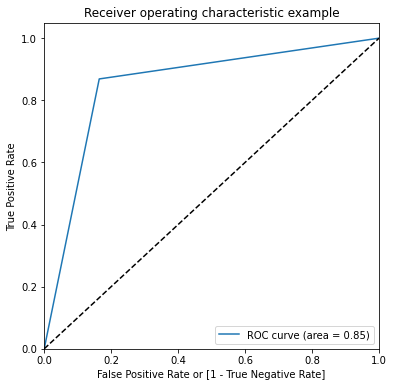

(array([0.        , 0.16439638, 1.        ]),
 array([0.        , 0.86877405, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [153]:
draw_roc(y_train_df.churn, y_train_df.final_predicted)

In [154]:
#draw_roc(y_pred_final.Churn, y_pred_final.predicted)
print("roc_auc_score : {:2.2f}".format(metrics.roc_auc_score(y_train_df.churn, y_train_df.final_predicted)))

roc_auc_score : 0.85


#### Finding Optimal Cutoff Point
Since recall or sensitivity is a much more important metrics for churn prediction. A trade off between sensitivity(or recall) and specificity is to be considered in doing so. We will try adjusting the probability threshold which shall lead to higher sensitivity or recall rate.

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.729541  0.974420  0.484663
0.2   0.2  0.791671  0.954144  0.629198
0.3   0.3  0.824477  0.929500  0.719455
0.4   0.4  0.842986  0.900645  0.785328
0.5   0.5  0.852189  0.868774  0.835604
0.6   0.6  0.852137  0.828533  0.875741
0.7   0.7  0.836383  0.760632  0.912135
0.8   0.8  0.806125  0.669180  0.943070
0.9   0.9  0.674015  0.371946  0.976084


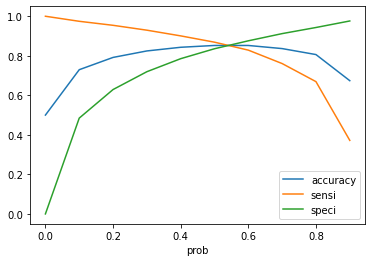

In [155]:
# finding cut-off with the right balance of the metrices
# sensitivity vs specificity trade-off
findOptimalCutoff(y_train_df)

**From the curve above, 0.4 is the optimum point.**

Although, other cutoff between 0.4 and 0.6 can also be taken but to keep the test sensitivity/recall significant we choose 0.4. At this point there is a balance of sensitivity, specificity and accuracy.


In [156]:
# predicting with the choosen cut-off on train
cut_off_prob = 0.4
predictChurnWithProb(lr0,X_train_pca,y_train_res,cut_off_prob)

Roc_auc_score : 0.8429863782884475
Sensitivity/Recall : 0.9006446916917957
Specificity: 0.7853280648850993
False Positive Rate: 0.2146719351149007
Positive predictive value: 0.8075237740070856
Negative Predictive value: 0.8876939351198871
sklearn precision score value: 0.8075237740070856


churn  churn_Prob  final_predicted
0          0    0.213022                0
1          0    0.156259                0
2          0    0.253604                0
3          0    0.333829                0
4          0    0.867390                1
...      ...         ...              ...
38463      1    0.785884                1
38464      1    0.893603                1
38465      1    0.959714                1
38466      1    0.930708                1
38467      1    0.797546                1

[38468 rows x 3 columns]

#### Making predictions on Test

In [157]:
# predicting with the choosen cut-off on test
predictChurnWithProb(lr0,X_test_pca,y_test,cut_off_prob)

Roc_auc_score : 0.8241706730525858
Sensitivity/Recall : 0.8635097493036211
Specificity: 0.7848315968015508
False Positive Rate: 0.21516840319844924
Positive predictive value: 0.2587646076794658
Negative Predictive value: 0.9850973236009732
sklearn precision score value: 0.2587646076794658


churn  churn_Prob  final_predicted
14098      0    0.737487                1
97745      0    0.931953                1
3216       0    0.695178                1
5230       0    0.357986                0
34252      0    0.016001                0
...      ...         ...              ...
20919      0    0.009891                0
4697       0    0.003038                0
61442      0    0.066358                0
77028      0    0.043562                0
59512      0    0.171712                0

[8972 rows x 3 columns]

#### Model Summary:

The resulting model, after PCA and logistic regression (with optimal cutoff setting) has a right balance of different metrics score for sensitivity, specificity and Roc Accuracy on the train and test set.

- **Cut-off :** 0.4
- **train sensitivity :** 90.06%, **train roc auc score :** 84.29%
- **test sensitivity** : 86.35%, **test roc auc score :** 82.41%



## 04.02 Decision Tree

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

**Applying Decision Tree Classifier on our principal components with Hyperparameter tuning**

#### Step 01: Create a decision tree classifier without any hyperparameter first.

In [158]:
dt0 = DecisionTreeClassifier(class_weight='balanced',
                             max_features='auto',
                             min_samples_split=100,
                             min_samples_leaf=100,
                             max_depth=6,
                             random_state=10)
modelfit(dt0, X_train_pca, y_train_res)


Model Report
Accuracy : 0.8265
Recall/Sensitivity : 0.7429
AUC Score (Train): 0.896403
CV Score : Mean - 0.8942069 | Std - 0.004159627 | Min - 0.8890803 | Max - 0.8993372


In [159]:
##make predictions
pred_probs_test = dt0.predict(X_test_pca)
#Let's check the model metrices.
getModelMetrics(actual_churn=y_test,pred_churn=pred_probs_test)

Roc_auc_score : 0.7968824771715308
Sensitivity/Recall : 0.6880222841225627
Specificity: 0.9057426702204991
False Positive Rate: 0.09425732977950085
Positive predictive value: 0.38836477987421386
Negative Predictive value: 0.9709090909090909
sklearn precision score value: 0.38836477987421386


#### Step 02: Now try to tune hyperparameters on the decision tree classifier.

- max_depth - integer or None, optional (default=None)The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples
- min_samples_leaf: (default=1)The minimum number of samples required to be at a leaf node:
    - If int, then consider min_samples_leaf as the minimum number.
    - If float, then min_samples_leaf is a percentage and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.

- min_samples_split - The minimum number of samples required to split an internal node:
- max_features - The number of features to consider when looking for the best split

In [160]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': range(5,15,3),
    'min_samples_leaf': range(100, 400, 50),
    'min_samples_split': range(100, 400, 100),
    'max_features': [8,10,15]
}
# Create a based model
dt = DecisionTreeClassifier(class_weight='balanced',random_state=10)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = dt, param_grid = param_grid, 
                          cv = 3, n_jobs = 4,verbose = 1,scoring="f1_weighted")

In [161]:
# Fit the grid search to the data
grid_search.fit(X_train_pca, y_train_res)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   11.3s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   26.7s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   60.0s
[Parallel(n_jobs=4)]: Done 648 out of 648 | elapsed:  1.5min finished


GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=10),
             n_jobs=4,
             param_grid={'max_depth': range(5, 15, 3),
                         'max_features': [8, 10, 15],
                         'min_samples_leaf': range(100, 400, 50),
                         'min_samples_split': range(100, 400, 100)},
             scoring='f1_weighted', verbose=1)

In [162]:
# printing the optimal accuracy score and hyperparameters
print('We can get recall of',grid_search.best_score_,'using',grid_search.best_params_)

We can get recall of 0.8494753587382883 using {'max_depth': 14, 'max_features': 15, 'min_samples_leaf': 100, 'min_samples_split': 100}


In [163]:
# model with the best hyperparameters
dt_final = DecisionTreeClassifier(class_weight='balanced',
                             max_depth=grid_search.best_params_['max_depth'],
                             min_samples_leaf=grid_search.best_params_['min_samples_leaf'], 
                             min_samples_split=grid_search.best_params_['min_samples_split'],
                             max_features=grid_search.best_params_['max_features'],
                             random_state=10)

In [164]:
modelfit(dt_final,X_train_pca,y_train_res)


Model Report
Accuracy : 0.8669
Recall/Sensitivity : 0.87
AUC Score (Train): 0.945624
CV Score : Mean - 0.9248596 | Std - 0.003705439 | Min - 0.9179316 | Max - 0.9289842


In [165]:
# make predictions
pred_probs_test = dt_final.predict(X_test_pca)
#Let's check the model metrices.
getModelMetrics(actual_churn=y_test,pred_churn=pred_probs_test)

Roc_auc_score : 0.7933314007288103
Sensitivity/Recall : 0.7284122562674095
Specificity: 0.8582505451902108
False Positive Rate: 0.1417494548097892
Positive predictive value: 0.30891907855877143
Negative Predictive value: 0.9732106058524522
sklearn precision score value: 0.30891907855877143


In [166]:
# classification report
print(classification_report(y_test,pred_probs_test))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      8254
           1       0.31      0.73      0.43       718

    accuracy                           0.85      8972
   macro avg       0.64      0.79      0.67      8972
weighted avg       0.92      0.85      0.87      8972



Even after hyperparameter tuning for the Decision Tree. The recall rate is 72.84% which is not very significant to predict the churn.

Let's see if we can achive a better Recall rate by deciding an optimal cut-off for the model to predict churn.


In [167]:
# predicting churn with default cut-off 0.5
cut_off_prob = 0.5
y_train_df = predictChurnWithProb(dt_final,X_train_pca,y_train_res,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.8668763647707186
Sensitivity/Recall : 0.8700218363314963
Specificity: 0.8637308932099407
False Positive Rate: 0.13626910679005927
Positive predictive value: 0.8645827951433738
Negative Predictive value: 0.8691989745199602
sklearn precision score value: 0.8645827951433738


churn  churn_Prob  final_predicted
0      0    0.009091                0
1      0    0.451327                0
2      0    0.409449                0
3      0    0.135922                0
4      0    0.769841                1

     prob  accuracy     sensi     speci
0.0   0.0  0.626729  1.000000  0.253457
0.1   0.1  0.773032  0.987730  0.558334
0.2   0.2  0.825621  0.966674  0.684569
0.3   0.3  0.848523  0.943174  0.753873
0.4   0.4  0.860066  0.916242  0.803889
0.5   0.5  0.866876  0.870022  0.863731
0.6   0.6  0.861911  0.816315  0.907508
0.7   0.7  0.847822  0.753405  0.942238
0.8   0.8  0.831522  0.703702  0.959343
0.9   0.9  0.779167  0.577987  0.980347


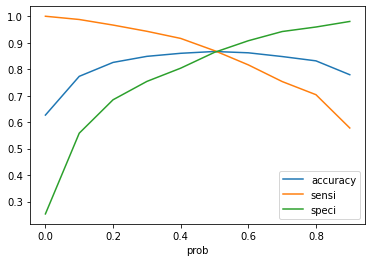

In [168]:
# finding cut-off with the right balance of the metrices
findOptimalCutoff(y_train_df)

#### From the curve above, let'choose 0.4 as the optimum point to make a high enough sensitivity.

In [169]:
# predicting churn with cut-off 0.4
cut_off_prob=0.4
y_train_df = predictChurnWithProb(dt_final,X_train_pca,y_train_res,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.8600655089944891
Sensitivity/Recall : 0.9162420713320162
Specificity: 0.8038889466569616
False Positive Rate: 0.19611105334303838
Positive predictive value: 0.8236971254966113
Negative Predictive value: 0.9056404849762784
sklearn precision score value: 0.8236971254966113


churn  churn_Prob  final_predicted
0      0    0.009091                0
1      0    0.451327                1
2      0    0.409449                1
3      0    0.135922                0
4      0    0.769841                1

In [170]:
#Lets see how it performs on test data.
y_test_df= predictChurnWithProb(dt_final,X_test_pca,y_test,cut_off_prob)
y_test_df.head()

Roc_auc_score : 0.7856590845124134
Sensitivity/Recall : 0.7799442896935933
Specificity: 0.7913738793312334
False Positive Rate: 0.20862612066876665
Positive predictive value: 0.24539877300613497
Negative Predictive value: 0.9763826606875934
sklearn precision score value: 0.24539877300613497


churn  churn_Prob  final_predicted
14098      0    1.000000                1
97745      0    0.619048                1
3216       0    0.000000                0
5230       0    0.056000                0
34252      0    0.000000                0

#### Model Summary:

Decision tree after selecting optimal cut-off also is resulting in a model with

- **Cut-off** : 0.4
- **Train Recall :** 91.62% and **Train Roc_auc_score :** 86%
- **Test Recall :** 77.99% and **Test Roc_auc_score :** 78.56%

#### Observation:

- Decision Tree still seems overfitted to the data.

## 04.03 Random Forest

Random Forest is an ensemble of decision trees. The single decision tree is very sensitive to data variations. It can easily overfit to noise in the data. The Random Forest with only one tree will overfit to data as well because it is the same as a single decision tree. When we add trees to the Random Forest then the tendency to overfitting should decrease (thanks to bagging and random feature selection). However, the generalization error will not go to zero. The variance of generalization error will approach to zero with more trees added but the bias will not! It is a useful feature, which tells us that the more trees in the RF the better. 

**Applying Random Forest Classifier on our principal components with Hyperparameter tuning**

In [171]:
def plot_traintestAcc(score,param):
    scores = score
    # plotting accuracies with max_depth
    plt.figure()
    plt.plot(scores["param_"+param], 
    scores["mean_train_score"], 
    label="training accuracy")
    plt.plot(scores["param_"+param], 
    scores["mean_test_score"], 
    label="test accuracy")
    plt.xlabel(param)
    plt.ylabel("f1")
    plt.legend()
    plt.show()

#### Tuning max_depth - The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

In [172]:
parameters = {'max_depth': range(10, 30, 5)}
rf0 = RandomForestClassifier()
rfgs = GridSearchCV(rf0, parameters, 
                    cv=5, 
                   scoring="f1",return_train_score=True)
rfgs.fit(X_train_pca,y_train_res)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(10, 30, 5)},
             return_train_score=True, scoring='f1')

In [173]:
rfgs.best_params_, rfgs.best_score_

({'max_depth': 25}, 0.9614466603641503)

In [174]:
rf_max_depth = rfgs.best_params_['max_depth']

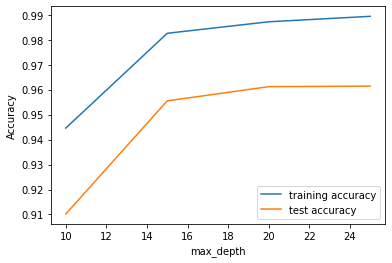

In [175]:
scores = rfgs.cv_results_
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Conclusion:
- Test f1-score almost becomes constant after max_depth=25

#### Tuning n_estimators - The number of trees in the forest.

In [176]:
parameters = {'n_estimators': range(50, 150, 25)}
rf1 = RandomForestClassifier(max_depth=rf_max_depth,random_state=10)
rfgs = GridSearchCV(rf1, parameters, 
                    cv=3, 
                   scoring="f1",return_train_score=True)
rfgs.fit(X_train_pca,y_train_res)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(max_depth=25, random_state=10),
             param_grid={'n_estimators': range(50, 150, 25)},
             return_train_score=True, scoring='f1')

In [177]:
rfgs.best_params_, rfgs.best_score_

({'n_estimators': 125}, 0.9584815843332839)

In [178]:
rf_n_estimators =  rfgs.best_params_['n_estimators']

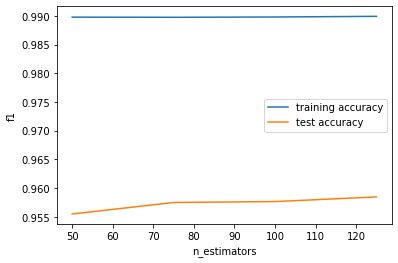

In [179]:
plot_traintestAcc(rfgs.cv_results_,'n_estimators')

**Selecting n_estimators = 125**

#### Tuning max_features - The number of features to consider when looking for the best split

In [180]:
parameters = {'max_features': [4, 8, 14, 20, 24]}
rf3 = RandomForestClassifier(max_depth=rf_max_depth,n_estimators=rf_n_estimators,random_state=10)
rfgs = GridSearchCV(rf3, parameters, 
                    cv=5, 
                   scoring="f1",return_train_score=True)

In [181]:
rfgs.fit(X_train_pca,y_train_res)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=25, n_estimators=125,
                                              random_state=10),
             param_grid={'max_features': [4, 8, 14, 20, 24]},
             return_train_score=True, scoring='f1')

In [182]:
rfgs.best_params_, rfgs.best_score_

({'max_features': 14}, 0.963566476854058)

In [183]:
rf_max_features = rfgs.best_params_['max_features']

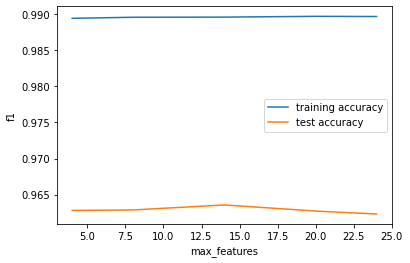

In [184]:
plot_traintestAcc(rfgs.cv_results_,'max_features')

**Selecting max_features = 14**

#### Tuning min_samples_leaf - The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

In [185]:
parameters = {'min_samples_leaf': range(100, 400, 50)}
rf4 = RandomForestClassifier(max_depth=rf_max_depth,n_estimators=rf_n_estimators,max_features=rf_max_features,random_state=10)
rfgs = GridSearchCV(rf4, parameters, 
                    cv=3, 
                   scoring="f1",return_train_score=True)

In [186]:
rfgs.fit(X_train_pca,y_train_res)
rfgs.best_params_, rfgs.best_score_

({'min_samples_leaf': 100}, 0.8593695537837144)

In [187]:
rf_min_samples_leaf =  rfgs.best_params_['min_samples_leaf']

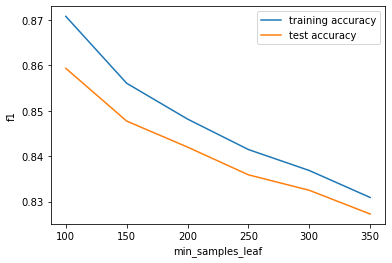

In [188]:
plot_traintestAcc(rfgs.cv_results_,'min_samples_leaf')

**Selecting min_sample_leaf = 100**

#### Tuning min_samples_split - The minimum number of samples required to split an internal node

In [189]:
parameters = {'min_samples_split': range(50, 300, 50)}
rf5 = RandomForestClassifier(max_depth=rf_max_depth,n_estimators=rf_n_estimators,max_features=rf_max_features,min_samples_leaf=rf_min_samples_leaf,random_state=10)
rfgs = GridSearchCV(rf5, parameters, 
                    cv=3, 
                   scoring="f1",return_train_score=True)



In [190]:
rfgs.fit(X_train_pca,y_train_res)
rfgs.best_params_, rfgs.best_score_

({'min_samples_split': 50}, 0.8593695537837144)

In [191]:
rf_min_samples_split= rfgs.best_params_['min_samples_split']

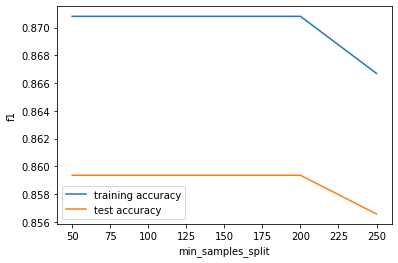

In [192]:

plot_traintestAcc(rfgs.cv_results_,'min_samples_split')

**Selecting min_samples_split = 50**

### Tunned Random Forest

- Based to hyperparameters

In [193]:
rf_final = RandomForestClassifier(max_depth=rf_max_depth,
                                  n_estimators=rf_n_estimators,
                                  max_features=rf_max_features,
                                  min_samples_leaf=rf_min_samples_leaf,
                                  min_samples_split=rf_min_samples_split,
                                  random_state=10)

In [194]:
print("Model performance on Train data:")
modelfit(rf_final,X_train_pca,y_train_res)

Model performance on Train data:

Model Report
Accuracy : 0.8862
Recall/Sensitivity : 0.8483
AUC Score (Train): 0.963555
CV Score : Mean - 0.9512209 | Std - 0.003043436 | Min - 0.9459179 | Max - 0.955412


In [195]:
# predict on test data
predictions = rf_final.predict(X_test_pca)

In [196]:
print("Model performance on Test data:")
getModelMetrics(y_test,predictions)

Model performance on Test data:
Roc_auc_score : 0.8172917596127951
Sensitivity/Recall : 0.7158774373259053
Specificity: 0.9187060818996851
False Positive Rate: 0.081293918100315
Positive predictive value: 0.4337552742616034
Negative Predictive value: 0.9738024913317067
sklearn precision score value: 0.4337552742616034


#### After hyperparameter tuning for the random forest. The Recall rate(Test) is 71.58%.

In [197]:
## Let's see if we can achive a better Recall rate by deciding an optimal cut-off for the model to predict churn.
cut_off_prob=0.5
y_train_df = predictChurnWithProb(rf_final,X_train_pca,y_train_res,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.8861651242591244
Sensitivity/Recall : 0.8482894873661225
Specificity: 0.9240407611521264
False Positive Rate: 0.07595923884787356
Positive predictive value: 0.9178151544130055
Negative Predictive value: 0.8589725001208255
sklearn precision score value: 0.9178151544130055


churn  churn_Prob  final_predicted
0      0    0.144517                0
1      0    0.218405                0
2      0    0.392000                0
3      0    0.238464                0
4      0    0.513432                1

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.632578  1.000000  0.265155
0.2   0.2  0.832042  0.995165  0.668920
0.3   0.3  0.889207  0.966310  0.812104
0.4   0.4  0.895108  0.909483  0.880732
0.5   0.5  0.886165  0.848289  0.924041
0.6   0.6  0.864381  0.778881  0.949880
0.7   0.7  0.833030  0.702246  0.963814
0.8   0.8  0.795284  0.615629  0.974940
0.9   0.9  0.753639  0.523292  0.983987


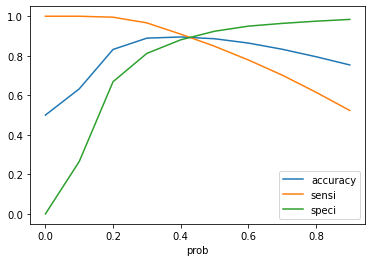

In [198]:
# finding cut-off with the right balance of the metrices
findOptimalCutoff(y_train_df)

#### From the curve above, 0.4 is the optimal point with high enough sensitivity.

In [199]:
cut_off_prob=0.4
predictChurnWithProb(rf_final,X_train_pca,y_train_res,cut_off_prob)

Roc_auc_score : 0.8951076219195175
Sensitivity/Recall : 0.909483206821254
Specificity: 0.880732037017781
False Positive Rate: 0.11926796298221899
Positive predictive value: 0.884065295395967
Negative Predictive value: 0.9068037042984851
sklearn precision score value: 0.884065295395967


churn  churn_Prob  final_predicted
0          0    0.144517                0
1          0    0.218405                0
2          0    0.392000                0
3          0    0.238464                0
4          0    0.513432                1
...      ...         ...              ...
38463      1    0.805254                1
38464      1    0.979510                1
38465      1    0.939683                1
38466      1    0.984372                1
38467      1    0.850831                1

[38468 rows x 3 columns]

#### Making prediction on test

In [200]:
y_test_df= predictChurnWithProb(rf_final,X_test_pca,y_test,cut_off_prob)
y_test_df.head()

Roc_auc_score : 0.8230964914116089
Sensitivity/Recall : 0.7743732590529248
Specificity: 0.8718197237702932
False Positive Rate: 0.12818027622970682
Positive predictive value: 0.3444857496902107
Negative Predictive value: 0.977983147594455
sklearn precision score value: 0.3444857496902107


churn  churn_Prob  final_predicted
14098      0    0.794002                1
97745      0    0.843894                1
3216       0    0.268138                0
5230       0    0.173190                0
34252      0    0.054062                0

#### Model Summary 

Random Forest after selecting optimal cut-off also is resulting in a model with

- **Cut-off** : 0.4
- **Train Recall :** 90.94% and **Train Roc_auc_score :** 89.51%
- **Test Recall :** 77.43% and **Test Roc_auc_score :** 82.30%

## 04.04 -  Boosting Models

### 04.04.01 Gradiant boosting Classifier

Boosting is a method of converting weak learners into strong learners. In boosting, each new tree is a fit on a modified version of the original data set.

Gradient boosting uses the concept of boosting. It also fits separate decision trees to the training data set but the trees are grown sequentially essentially to fix the mistakes of the previous tree. This is why, boosting is called the ensemble of weak prediction models. Suppose the gradient boosting model starts with a weak model Fm. In the next iteration it tries to add to the previous weak model, in such a way, that the prediction becomes stronger, i.e;

                          Fm+1(x) =  Fm (x) + h(x)= y

Here h is essentially a residual from the previous model, so gradient boosting is a generalization of the gradient decent algorithm that reduces the residuals.


**Applying Gradiant boosting Classifier on our principal components with Hyperparameter tuning**

In [201]:
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
# Fitting the default GradientBoostingClassifier
gbm0 = GradientBoostingClassifier(random_state=10)
modelfit(gbm0, X_train_pca, y_train_res)


Model Report
Accuracy : 0.8935
Recall/Sensitivity : 0.8748
AUC Score (Train): 0.958050
CV Score : Mean - 0.9522185 | Std - 0.00374613 | Min - 0.9454509 | Max - 0.9569528


#### n_estimators int, default=100
The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.


In [202]:
# Hyperparameter tuning for n_estimators
param_test1 = {'n_estimators':range(20,150,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='f1',n_jobs=4,iid=False, cv=3)
gsearch1.fit(X_train_pca, y_train_res)

GridSearchCV(cv=3,
             estimator=GradientBoostingClassifier(max_depth=8,
                                                  max_features='sqrt',
                                                  min_samples_leaf=50,
                                                  min_samples_split=500,
                                                  random_state=10,
                                                  subsample=0.8),
             iid=False, n_jobs=4,
             param_grid={'n_estimators': range(20, 150, 10)}, scoring='f1')

In [203]:
gsearch1.best_params_, gsearch1.best_score_

({'n_estimators': 140}, 0.9395176121996872)

In [204]:
gs_n_estimators = gsearch1.best_params_['n_estimators']

#### max_depth int, default=3

    maximum depth of the individual regression estimators. The maximum depth limits the number of nodes in the tree. Tune this parameter for best performance; the best value depends on the interaction of the input variables.
 
#### min_samples_split int or float, default=2

    The minimum number of samples required to split an internal node


In [205]:
# Hyperparameter tuning for max_depth and min_sample_split
param_test2 = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=gs_n_estimators, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test2, scoring='f1',n_jobs=4,iid=False, cv=3)
gsearch2.fit(X_train_pca, y_train_res)

GridSearchCV(cv=3,
             estimator=GradientBoostingClassifier(max_features='sqrt',
                                                  n_estimators=140,
                                                  random_state=10,
                                                  subsample=0.8),
             iid=False, n_jobs=4,
             param_grid={'max_depth': range(5, 16, 2),
                         'min_samples_split': range(200, 1001, 200)},
             scoring='f1')

In [206]:
gsearch2.best_params_, gsearch2.best_score_

({'max_depth': 15, 'min_samples_split': 200}, 0.9663377877028753)

In [207]:
gs_max_depth = gsearch2.best_params_['max_depth']
gs_min_samples_split = gsearch2.best_params_['min_samples_split']

#### min_samples_leaf int or float, default=1

The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

In [208]:
# Hyperparameter tuning for min_sample_leaf
param_test3 = {'min_samples_leaf':range(30,71,10)}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=gs_n_estimators,max_depth=gs_max_depth,min_samples_split=gs_min_samples_split, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test3, scoring='f1',n_jobs=4,iid=False, cv=3)
gsearch3.fit(X_train_pca, y_train_res)

GridSearchCV(cv=3,
             estimator=GradientBoostingClassifier(max_depth=15,
                                                  max_features='sqrt',
                                                  min_samples_split=200,
                                                  n_estimators=140,
                                                  random_state=10,
                                                  subsample=0.8),
             iid=False, n_jobs=4,
             param_grid={'min_samples_leaf': range(30, 71, 10)}, scoring='f1')

In [209]:
gsearch3.best_params_, gsearch3.best_score_

({'min_samples_leaf': 40}, 0.9676741521340263)

In [210]:
gs_min_samples_leaf = gsearch3.best_params_['min_samples_leaf']

#### max_features {‘auto’, ‘sqrt’, ‘log2’}, int or float, default=None

The number of features to consider when looking for the best split

In [211]:
# Hyperparameter tuning for max_features
param_test4 = {'max_features':range(7,20,2)}
gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=gs_n_estimators,max_depth=gs_max_depth,min_samples_split=gs_min_samples_split, min_samples_leaf=gs_min_samples_leaf, subsample=0.8, random_state=10),
param_grid = param_test4, scoring='f1',n_jobs=4,iid=False, cv=3)
gsearch4.fit(X_train_pca, y_train_res)

GridSearchCV(cv=3,
             estimator=GradientBoostingClassifier(max_depth=15,
                                                  min_samples_leaf=40,
                                                  min_samples_split=200,
                                                  n_estimators=140,
                                                  random_state=10,
                                                  subsample=0.8),
             iid=False, n_jobs=4, param_grid={'max_features': range(7, 20, 2)},
             scoring='f1')

In [212]:
gsearch4.best_params_, gsearch4.best_score_

({'max_features': 19}, 0.9686483706239981)

In [213]:
gs_max_features = gsearch4.best_params_['max_features']

#### Tunned GradientBoostingClassifier

In [214]:
# Tunned GradientBoostingClassifier
gbm_final = GradientBoostingClassifier(learning_rate=0.1, n_estimators=gs_n_estimators,max_features=gs_max_features,max_depth=gs_max_depth, min_samples_split=gs_min_samples_split, min_samples_leaf=gs_min_samples_leaf, subsample=0.8, random_state=10)
modelfit(gbm_final, X_train_pca, y_train_res)


Model Report
Accuracy : 0.9982
Recall/Sensitivity : 1
AUC Score (Train): 1.000000
CV Score : Mean - 0.9891362 | Std - 0.001058696 | Min - 0.9877559 | Max - 0.9906231


In [215]:
# predictions on Test data
dtest_predictions = gbm_final.predict(X_test_pca)

#### Let's see if we can achive a better Recall rate by deciding an optimal cut-off for the model to predict churn.

In [216]:
# predicting churn with default cut-off 0.5
cut_off_prob=0.5
y_train_df = predictChurnWithProb(gbm_final,X_train_pca,y_train_res,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.9981543100759073
Sensitivity/Recall : 1.0
Specificity: 0.9963086201518145
False Positive Rate: 0.0036913798481855047
Positive predictive value: 0.9963221963221963
Negative Predictive value: 1.0
sklearn precision score value: 0.9963221963221963


churn  churn_Prob  final_predicted
0      0    0.003555                0
1      0    0.022803                0
2      0    0.021709                0
3      0    0.012146                0
4      0    0.101552                0

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.980841  1.000000  0.961682
0.2   0.2  0.989056  1.000000  0.978112
0.3   0.3  0.992799  1.000000  0.985598
0.4   0.4  0.995581  1.000000  0.991161
0.5   0.5  0.998154  1.000000  0.996309
0.6   0.6  0.999038  1.000000  0.998076
0.7   0.7  0.999610  0.999896  0.999324
0.8   0.8  0.999766  0.999532  1.000000
0.9   0.9  0.996907  0.993813  1.000000


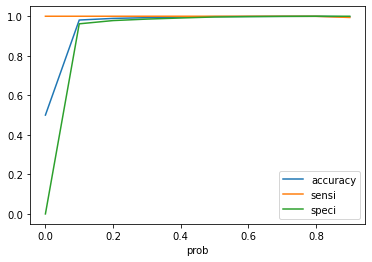

In [217]:
findOptimalCutoff(y_train_df)

In [218]:
cut_off_prob=0.1
predictChurnWithProb(gbm_final,X_train_pca,y_train_res,cut_off_prob)

Roc_auc_score : 0.9808412186752625
Sensitivity/Recall : 1.0
Specificity: 0.9616824373505252
False Positive Rate: 0.03831756264947489
Positive predictive value: 0.96309648991037
Negative Predictive value: 1.0
sklearn precision score value: 0.96309648991037


churn  churn_Prob  final_predicted
0          0    0.003555                0
1          0    0.022803                0
2          0    0.021709                0
3          0    0.012146                0
4          0    0.101552                1
...      ...         ...              ...
38463      1    0.894275                1
38464      1    0.991995                1
38465      1    0.982162                1
38466      1    0.973520                1
38467      1    0.983370                1

[38468 rows x 3 columns]

In [219]:
y_test_df= predictChurnWithProb(gbm_final,X_test_pca,y_test,cut_off_prob)
y_test_df.head()

Roc_auc_score : 0.8262199875404378
Sensitivity/Recall : 0.7534818941504178
Specificity: 0.8989580809304579
False Positive Rate: 0.10104191906954205
Positive predictive value: 0.39345454545454545
Negative Predictive value: 0.97670132947216
sklearn precision score value: 0.39345454545454545


churn  churn_Prob  final_predicted
14098      0    0.828042                1
97745      0    0.627550                1
3216       0    0.005862                0
5230       0    0.011246                0
34252      0    0.000837                0

#### Model Summary 

- **Cut-off** : 0.1
- **Train Recall :** 100% and **Train Roc_auc_score :** 96.16%
- **Test Recall :** 75.34% and **Test Roc_auc_score :** 82.62%


#### Observation:

- This model is litrally over-fitting the Training data with 100% Recall and a lower performance on the Test data.

### 04.04.02 XGBoost Classifier

XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way. The same code runs on major distributed environment (Hadoop, SGE, MPI) and can solve problems beyond billions of examples.


- Applying XGBoost Classifier on our principal components with Hyperparameter tuning

In [220]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
# Fitting the XGBClassifier
xgb1 = XGBClassifier(learning_rate =0.1,
                    n_estimators=1000,
                    max_depth=5,
                    min_child_weight=1,
                    gamma=0,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    objective= 'binary:logistic',
                    nthread=4,
                    scale_pos_weight=1,
                    seed=27)

In [221]:
# Model fit and performance on Train data
modelfit(xgb1, X_train_pca, y_train_res)


Model Report
Accuracy : 0.9986
Recall/Sensitivity : 0.9999
AUC Score (Train): 1.000000
CV Score : Mean - 0.9898176 | Std - 0.001032321 | Min - 0.9883119 | Max - 0.9910226


- **max_depth** is the maximum number of nodes allowed from the root to the farthest leaf of a tree. Deeper trees can model more complex relationships by adding more nodes, but as we go deeper, splits become less relevant and are sometimes only due to noise, causing the model to overfit.
- **min_child_weight** is the minimum weight (or number of samples if all samples have a weight of 1) required in order to create a new node in the tree. A smaller min_child_weight allows the algorithm to create children that correspond to fewer samples, thus allowing for more complex trees, but again, more likely to overfit.

In [222]:
# Hyperparameter tunning for the XGBClassifer
param_test1 = {'max_depth':range(3,10,2),'min_child_weight':range(1,6,2)}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='f1',n_jobs=4,iid=False, cv=3)
gsearch1.fit(X_train_pca, y_train_res)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=0, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=5, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=140, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=1, seed=27, subsample=0.8,
                                     tree_method=

In [223]:
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 9, 'min_child_weight': 1}, 0.9638810785394086)

In [224]:
xg_max_depth = gsearch1.best_params_['max_depth']
xg_min_child_weight = gsearch1.best_params_['min_child_weight']

**gamma** [default=0, alias: min_split_loss]

- Minimum loss reduction required to make a further partition on a leaf node of the tree. The larger gamma is, the more conservative the algorithm will be.

- range: [0,∞]



In [225]:
# Some more hyperparameter tunning for the XGBClassifer
param_test2 = param_test3 = {'gamma':[i/10.0 for i in range(0,5)]}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=xg_max_depth,
 min_child_weight=xg_min_child_weight, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2, scoring='f1',n_jobs=4,iid=False, cv=3)
gsearch2.fit(X_train_pca, y_train_res)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=0, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=9, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=140, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=1, seed=27, subsample=0.8,
                                     tree_method=

In [226]:
gsearch2.best_params_, gsearch2.best_score_

({'gamma': 0.0}, 0.9638810785394086)

In [227]:
xg_gamma = gsearch2.best_params_['gamma']

#### Tunned  XGBoost classifier

In [228]:
# Final XGBClassifier
xgb2 = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=xg_max_depth,
 min_child_weight=xg_min_child_weight, gamma=xg_gamma, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27)

In [229]:
# Fit Train data
modelfit(xgb2, X_train_pca, y_train_res)


Model Report
Accuracy : 0.9884
Recall/Sensitivity : 0.9999
AUC Score (Train): 0.999356
CV Score : Mean - 0.9867922 | Std - 0.00144184 | Min - 0.9855236 | Max - 0.9886397


In [230]:
# Prediction on Test data
dtest_predictions = xgb2.predict(X_test_pca)

In [231]:
# Model evaluation on Test data
getModelMetrics(y_test,dtest_predictions)

Roc_auc_score : 0.7906231670910973
Sensitivity/Recall : 0.6309192200557103
Specificity: 0.9503271141264841
False Positive Rate: 0.04967288587351587
Positive predictive value: 0.5249130938586327
Negative Predictive value: 0.9673202614379085
sklearn precision score value: 0.5249130938586327


**Let's see if we can achive a better Recall rate by deciding an optimal cut-off for the model to predict churn.**

In [232]:
# predicting churn with default cut-off 0.5
cut_off_prob=0.5
y_train_df = predictChurnWithProb(xgb2,X_train_pca,y_train_res,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.9883539565353021
Sensitivity/Recall : 0.9998960174690652
Specificity: 0.9768118956015389
False Positive Rate: 0.023188104398461057
Positive predictive value: 0.9773350950299827
Negative Predictive value: 0.9998935604044704
sklearn precision score value: 0.9773350950299827


churn  churn_Prob  final_predicted
0      0    0.013352                0
1      0    0.040092                0
2      0    0.072174                0
3      0    0.044765                0
4      0    0.315477                0

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.956457  1.000000  0.912915
0.2   0.2  0.974628  1.000000  0.949257
0.3   0.3  0.982089  1.000000  0.964178
0.4   0.4  0.986066  0.999948  0.972185
0.5   0.5  0.988354  0.999896  0.976812
0.6   0.6  0.990616  0.999584  0.981647
0.7   0.7  0.992305  0.998804  0.985806
0.8   0.8  0.991837  0.992305  0.991369
0.9   0.9  0.968909  0.940834  0.996985


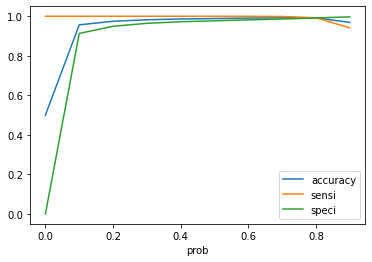

In [233]:
# Finding optimal cut-off probability
findOptimalCutoff(y_train_df)

In [234]:
# Selecting 0.2 as cut-off in an attempt to improve recall rate
cut_off_prob=0.2
predictChurnWithProb(xgb2,X_train_pca,y_train_res,cut_off_prob)

Roc_auc_score : 0.9746282624519081
Sensitivity/Recall : 1.0
Specificity: 0.9492565249038162
False Positive Rate: 0.05074347509618384
Positive predictive value: 0.9517070757050965
Negative Predictive value: 1.0
sklearn precision score value: 0.9517070757050965


churn  churn_Prob  final_predicted
0          0    0.013352                0
1          0    0.040092                0
2          0    0.072174                0
3          0    0.044765                0
4          0    0.315477                1
...      ...         ...              ...
38463      1    0.866461                1
38464      1    0.973226                1
38465      1    0.958521                1
38466      1    0.982180                1
38467      1    0.981228                1

[38468 rows x 3 columns]

#### Making prediction on Test

In [235]:
y_test_df= predictChurnWithProb(xgb2,X_test_pca,y_test,cut_off_prob)
y_test_df.head()

Roc_auc_score : 0.8221027974619209
Sensitivity/Recall : 0.7423398328690808
Specificity: 0.9018657620547613
False Positive Rate: 0.09813423794523868
Positive predictive value: 0.39687267311988084
Negative Predictive value: 0.9757504260060296
sklearn precision score value: 0.39687267311988084


churn  churn_Prob  final_predicted
14098      0    0.905441                1
97745      0    0.756389                1
3216       0    0.021718                0
5230       0    0.021163                0
34252      0    0.005255                0

#### Model Summary 

- **Cut-off** : 0.2
- **Train Recall :** 100% and **Train Roc_auc_score :** 97.46%
- **Test Recall :** 74.23% and **Test Roc_auc_score :** 82.21%


#### Observation:

- This model is litrally over-fitting the Training data with 100% Recall and a lower performance on the Test data.

#### SVM 

“Support Vector Machine” (SVM) is a supervised machine learning algorithm which can be used for both classification or regression challenges. However,  it is mostly used in classification problems. In the SVM algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate.

**kernel {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} ,  default=’rbf’**

specifies the kernel type to be used in the algorithm. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. If none is given, ‘rbf’ will be used. If a callable is given it is used to pre-compute the kernel matrix from data matrices; that matrix should be an array of shape (n_samples, n_samples).

**C float, default=1.0**

Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.



**Using linear kernel**

In [236]:
# instantiate an object of class SVC()
# note that we are using cost C=1
svm0 = SVC(C = 1)

In [237]:
# fit
svm0.fit(X_train_pca, y_train_res)

# predict on train
y_pred = svm0.predict(X_train_pca)
getModelMetrics(y_train_res,y_pred)

Roc_auc_score : 0.9629822189872101
Sensitivity/Recall : 0.9866902360403452
Specificity: 0.9392742019340751
False Positive Rate: 0.06072579806592492
Positive predictive value: 0.942023230417949
Negative Predictive value: 0.9860277262307608
sklearn precision score value: 0.942023230417949


#### Hyperparameter tuning for linear kernal

Let's see if we can tune the hyperparameters of SVM and get a better Sensitivity score.


In [238]:
# specify range of parameters (C) as a list
params = {"C": [0.1, 1, 10, 100, 1000]}

svm1 = SVC()

# set up grid search scheme
# note that we are still using the 5 fold CV scheme
model_cv = GridSearchCV(estimator = svm1, param_grid = params, 
                        scoring= 'f1', 
                        cv = 5, 
                        verbose = 1,
                        n_jobs=4,
                       return_train_score=True) 
model_cv.fit(X_train_pca, y_train_res)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:  8.1min finished


GridSearchCV(cv=5, estimator=SVC(), n_jobs=4,
             param_grid={'C': [0.1, 1, 10, 100, 1000]}, return_train_score=True,
             scoring='f1', verbose=1)

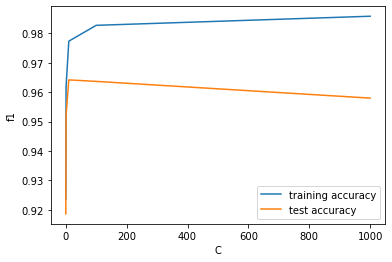

In [239]:
plot_traintestAcc(model_cv.cv_results_,'C')

In [240]:
model_cv.best_params_

{'C': 10}

In [241]:
svm_c = model_cv.best_params_['C']

In [242]:
svm_final = SVC(C = svm_c)
# fit
svm_final.fit(X_train_pca, y_train_res)


SVC(C=10)

In [272]:
# predict
y_train_pred = svm_final.predict(X_train_pca)

In [273]:
getModelMetrics(y_train_res,y_train_pred)

Roc_auc_score : 0.9769938650306749
Sensitivity/Recall : 0.9979203493813039
Specificity: 0.9560673806800457
False Positive Rate: 0.04393261931995425
Positive predictive value: 0.9578322271570437
Negative Predictive value: 0.997829507840903
sklearn precision score value: 0.9578322271570437


In [243]:
# predict
y_pred = svm_final.predict(X_test_pca)

In [244]:
getModelMetrics(y_test,y_pred)

Roc_auc_score : 0.7941941545350173
Sensitivity/Recall : 0.6476323119777159
Specificity: 0.9407559970923188
False Positive Rate: 0.05924400290768112
Positive predictive value: 0.48742138364779874
Negative Predictive value: 0.9684459965078573
sklearn precision score value: 0.48742138364779874


#### Using non-linear Kernel

In [245]:
svm_k = SVC(C = svm_c, kernel='rbf')
svm_k.fit(X_train_pca, y_train_res)

SVC(C=10)

In [246]:
y_pred = svm_k.predict(X_test_pca)

In [247]:
getModelMetrics(y_test,y_pred)

Roc_auc_score : 0.7941941545350173
Sensitivity/Recall : 0.6476323119777159
Specificity: 0.9407559970923188
False Positive Rate: 0.05924400290768112
Positive predictive value: 0.48742138364779874
Negative Predictive value: 0.9684459965078573
sklearn precision score value: 0.48742138364779874


#### Model Summary 

- C : 10
- Train Recall : 99.79% and Train Roc_auc_score : 97.69%
- Test Recall : 64.76% and Test Roc_auc_score : 79.41%


#### Observation:

The SVM seems to overfit the data too.

## Final Model :

Recall is the most important business metric for the telecom churn problem. The company would like to identify most customers at risk of churning, even if there are many customers that are misclassified as churn. The cost to the company of churning is much higher than having a few false positives.

Let's have a look at the performance of the models we built 

### Logistics Regression :

- **Cut-off :** 0.4
- **train sensitivity :** 90.06%, **train roc auc score :** 84.29%
- **test sensitivity** : 86.35%, **test roc auc score :** 82%

### Decision Tree:

Decision tree after selecting optimal cut-off also is resulting in a model with

- **Cut-off** : 0.4
- **Train Recall :** 91.62% and **Train Roc_auc_score :** 86%
- **Test Recall :** 77.99% and **Test Roc_auc_score :** 78.56%

### Random Forest :

Random Forest after selecting optimal cut-off also is resulting in a model with

- **Cut-off** : 0.4
- **Train Recall :** 90.94% and **Train Roc_auc_score :** 89.51%
- **Test Recall :** 77.43% and **Test Roc_auc_score :** 82.30%

### Gradient Boosting

- **Cut-off** : 0.1
- **Train Recall :** 100% and **Train Roc_auc_score :** 96.16%
- **Test Recall :** 75.34% and **Test Roc_auc_score :** 82.62%

### XGBoosting 

- **Cut-off** : 0.2
- **Train Recall :** 100% and **Train Roc_auc_score :** 97.46%
- **Test Recall :** 74.23% and **Test Roc_auc_score :** 82.21%

#### SVM (Linear C=10) 

- **C** : 10
- **Train Recall** : 99.79% and **Train Roc_auc_score :** 97.69%
- **Test Recall :** 64.76% and **Test Roc_auc_score :** 79.41%


## Summary 



Overall, the Logistic Regression model with probability cut-off = 0.4, performs best. It achieved the best recall accuracy of 86.35% for test data. Also the overall accuracy and specificity is consistent for Test and train data, thus avoiding overfitting. The precision is compromised in this effort but the business objective to predict Churn customers is most accuratety captured by it.

Next, Linear SVM which achives a recall rate of 64.76%, a slightly better precision of 48.74% and a balanced overall accuracy on train and test. However , it seems to overfit the data on the training set with recall rate of 99.79%

From the Tree Family, the Decision Tree overfitted the data slightly while obtaining 77.99% recall accuracy on test data. The Random Forest avoided overfitting but obtained only 77.43% recall accuracy on test data.

Among the Bossting Methods, Gradient Boosting Classifer (GBC) achived 75.34% recall rate and XGBoost Classifier achived 74.23% but both tend to overfit the training data with 100% recall rate


## Conclusion

Based on our analysis,we are going to use an instance of Random Forest to identify the churn features.



##  Identification of churn features

In [274]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [8,10,12],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [12, 15, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = 4,verbose = 1)

In [275]:
# Fit the grid search to the data
grid_search.fit(X_train_res, y_train_res)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  5.3min
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed: 29.2min
[Parallel(n_jobs=4)]: Done 324 out of 324 | elapsed: 53.6min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'max_depth': [8, 10, 12], 'max_features': [12, 15, 20],
                         'min_samples_leaf': range(100, 400, 200),
                         'min_samples_split': range(200, 500, 200),
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [250]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9048301188608562 using {'max_depth': 12, 'max_features': 20, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 300}


In [251]:
frf_max_depth = grid_search.best_params_['max_depth']
frf_min_samples_leaf = grid_search.best_params_['min_samples_leaf']
frf_min_samples_split = grid_search.best_params_['min_samples_split']
frf_n_estimators = grid_search.best_params_['n_estimators']
frf_max_features = grid_search.best_params_['max_features']

In [252]:
rf = RandomForestClassifier(max_depth=frf_max_depth,
                            max_features=frf_max_features,
                            min_samples_leaf=frf_min_samples_leaf,
                            min_samples_split=frf_min_samples_split,
                            n_estimators=frf_n_estimators,
                            random_state=10)

In [253]:
rf.fit(X_train_res, y_train_res)

RandomForestClassifier(max_depth=12, max_features=20, min_samples_leaf=100,
                       min_samples_split=200, n_estimators=300,
                       random_state=10)

In [254]:
# predict on test data
y_train_pred = rf.predict(X_train_res)

In [255]:
getModelMetrics(y_train_res,y_train_pred)

Roc_auc_score : 0.9193615472600604
Sensitivity/Recall : 0.9104710408651346
Specificity: 0.928252053654986
False Positive Rate: 0.07174794634501404
Positive predictive value: 0.9269532077069659
Negative Predictive value: 0.9120351450756028
sklearn precision score value: 0.9269532077069659


In [256]:
# predict
y_pred = rf.predict(X_test)

In [257]:
getModelMetrics(y_test,y_pred)

Roc_auc_score : 0.8407583931619547
Sensitivity/Recall : 0.7534818941504178
Specificity: 0.9280348921734917
False Positive Rate: 0.07196510782650836
Positive predictive value: 0.47665198237885464
Negative Predictive value: 0.9774148271022075
sklearn precision score value: 0.47665198237885464


#### Observation:
- The final model has Sensitivity/Recall score - **75.34%** on the test data.

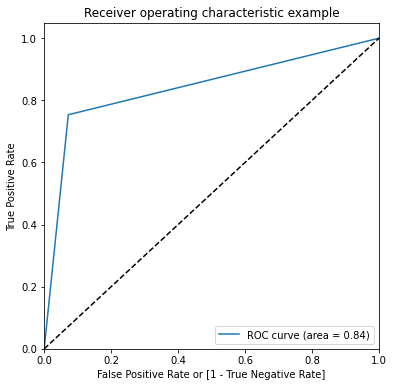

(array([0.        , 0.07196511, 1.        ]),
 array([0.        , 0.75348189, 1.        ]),
 array([2, 1, 0]))

In [263]:
## Draw the ROC curve on the final model.
draw_roc(y_test,y_pred)

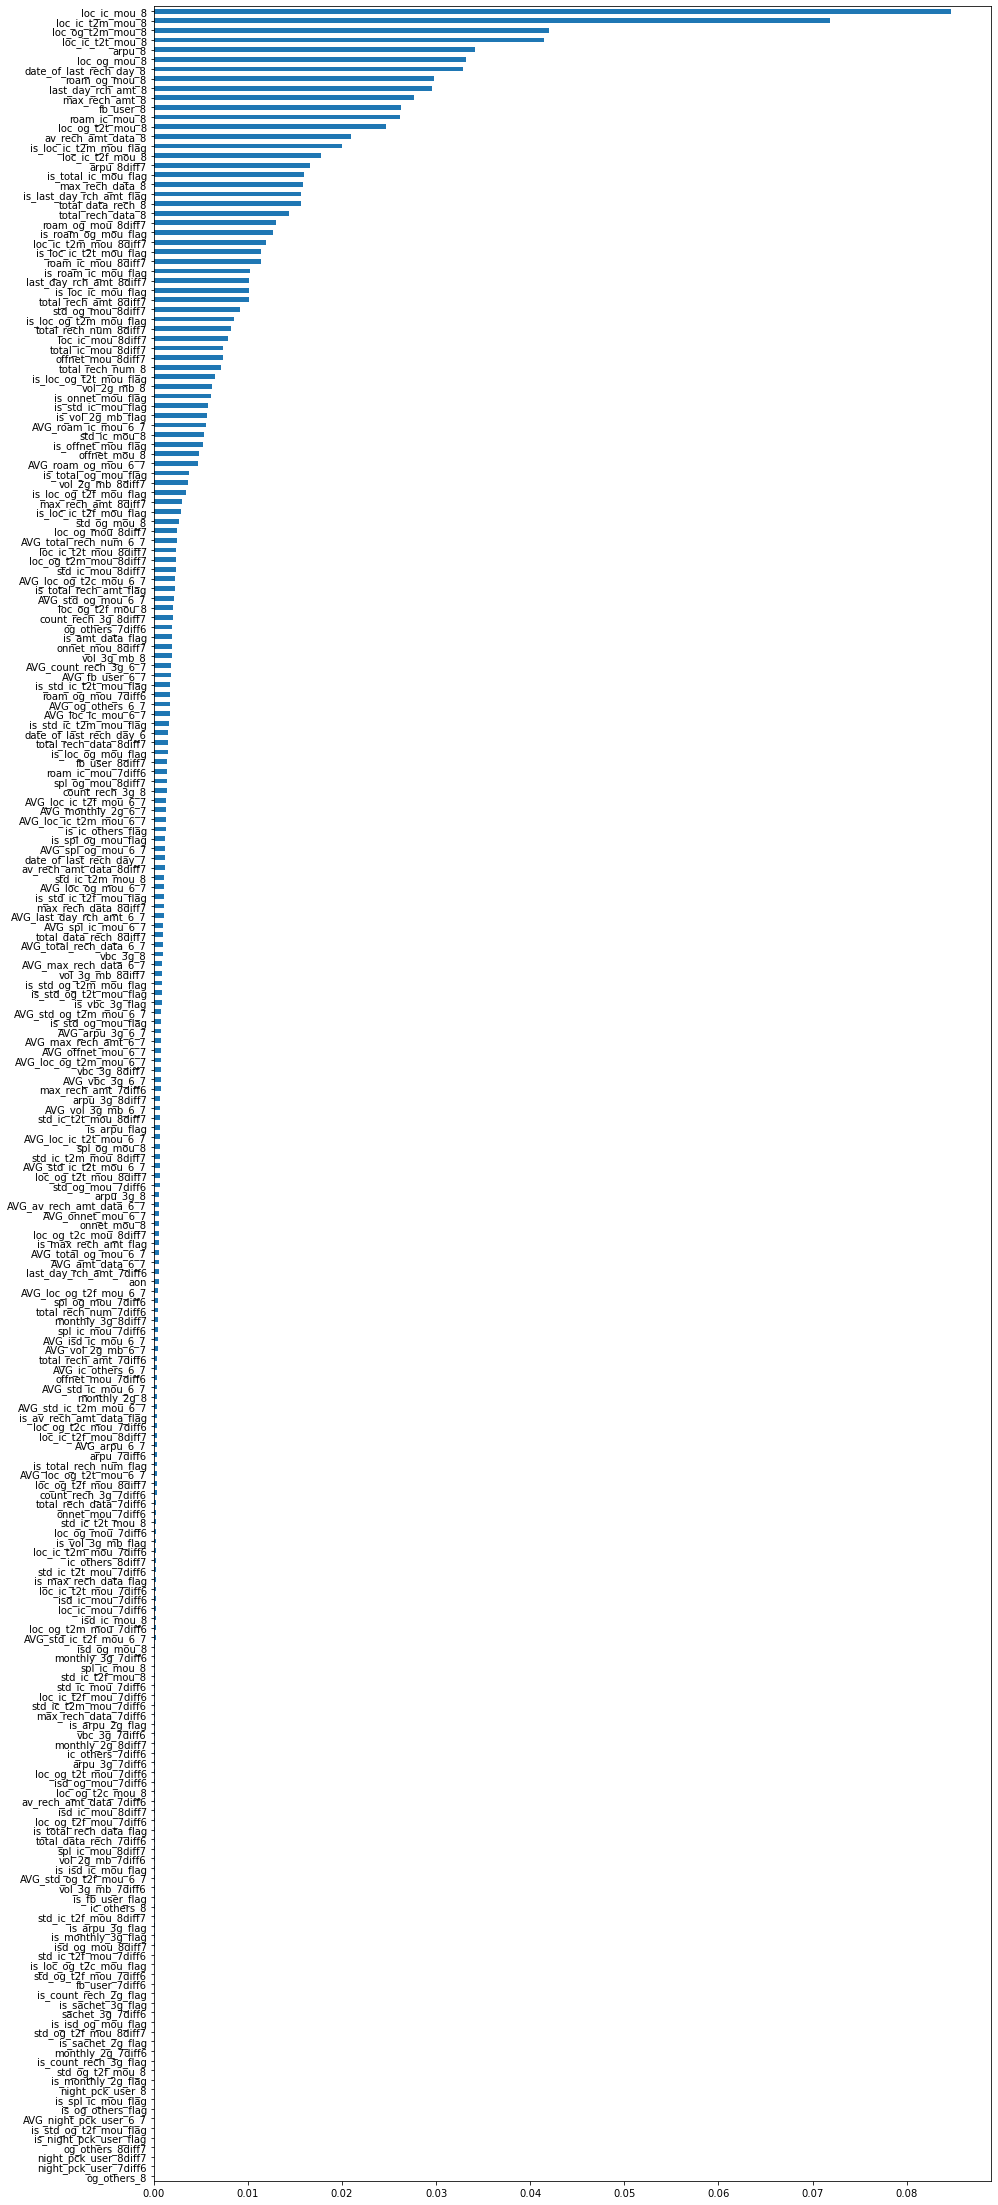

In [258]:
plt.figure(figsize=(15,40))
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(len(X.columns)).sort_values().plot(kind='barh', align='center')

In [261]:
## The top 30 important features to predict churn
feat_importances.nlargest(len(X.columns)).sort_values(ascending=False).head(30)

loc_ic_mou_8                0.084706
loc_ic_t2m_mou_8            0.071824
loc_og_t2m_mou_8            0.041950
loc_ic_t2t_mou_8            0.041434
arpu_8                      0.034099
loc_og_mou_8                0.033209
date_of_last_rech_day_8     0.032836
roam_og_mou_8               0.029745
last_day_rch_amt_8          0.029601
max_rech_amt_8              0.027627
fb_user_8                   0.026262
roam_ic_mou_8               0.026142
loc_og_t2t_mou_8            0.024687
av_rech_amt_data_8          0.020976
is_loc_ic_t2m_mou_flag      0.019987
loc_ic_t2f_mou_8            0.017805
arpu_8diff7                 0.016612
is_total_ic_mou_flag        0.016001
max_rech_data_8             0.015815
is_last_day_rch_amt_flag    0.015668
total_data_rech_8           0.015666
total_rech_data_8           0.014314
roam_og_mou_8diff7          0.012965
is_roam_og_mou_flag         0.012632
loc_ic_t2m_mou_8diff7       0.011915
is_loc_ic_t2t_mou_flag      0.011407
roam_ic_mou_8diff7          0.011382
i


Some of the top main predictiors of churn are the monthly KPI features for the action phase (3rd month August).

the graph above suggest that the top 15 features ranked in order of importance as produced by our RandomForest implementation are the features that belong to month 8 i.e., the action month. Hence, it is clear that what happens in the action phase has a direct impact on the customer churn of high value customers. Specifically, these features are as follows:


- **loc_ic_mou_8**                - local incoming minutes of usage in month Aug(8)
- **loc_ic_t2m_mou_8**            - local incoming calls to another operator minutes of usage in month Aug(8)
- **loc_og_t2m_mou_8**            - local outgoing calls to another operator minutes of usage in month Aug(8)
- **loc_ic_t2t_mou_8**            - local incoming calls to another operator minutes of usage in month Aug(8)
- **arpu_8**                      - local incoming calls from same operator minutes of usage in month Aug(8)
- **loc_og_mou_8**                - average revenue per user in month Aug(8)
- **date_of_last_rech_day_8**     - last recharge day for the month of Aug(8)
- **roam_og_mou_8**               - outgoing roaming calls minutes of usage in month Aug(8)
- **last_day_rch_amt_8**          - last (most recent) recharge amount in month Aug(8)
- **max_rech_amt_8**              - maximum recharge amount in month Aug(8)
- **fb_user_8**                   - Services of Facebook and similar social networking sites for month Aug(8)
- **roam_ic_mou_8**               -Incoming roaming calls minutes of usage in month 8
- **loc_og_t2t_mou_8**            -local outgoing calls to same operator minutes of usage in month Aug(8
- **av_rech_amt_data_8**          -average recharge amount for mobile data in month 8
- **is_loc_ic_t2m_mou_flag**      -Rise/Decline local incoming call with other opeator in Aug(8) compared to the - average of good months - Jun(8) & July(7) 




Local calls Mou's be it incoming or outgoing have a very important role for churn predictions. Reduction in these KPI's forms a clear indicator of churn.

Overall, drop in any of these indicator KPI is a signal that the customer is not actively engaging in the services offered by the Network operator and thus may choose to churn in the near future.

Next, we will look at some of the stratergic steps which can be taken to retain these predicted churners.


## Recommendations

It is a fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.


#### Monitoring Drop in usage

With the Basic exploratory data analysis it is pretty much clear that Customer churn seems to be well predicted by drop in usage.

Aside from using the Machine Learning model for predicting churn, the telecom company should pay close attention to drop in MoU, ARPU and data usage (2g and 3g) month over month. If feasible, the company should track these numbers week over week. Since billing cycles are typically monthly, a drop in usage numbers will give the company time to react when tracked at weekly level.

Contact these customers proactively to find out what's affecting their experience. Perhaps, offer them coupons or other incentives to continue to use the services, while the company fixes the issues reported.

Marketing team must come up with campaigns which targets these high-value to-be churner.


Based on our model. We can see the telecom operator requires improvements in three areas of services

- Incoming service
- Outgoing service
- Roaming Service (Both call and data)


## Incoming Service improvements

#### Observation:

We can see there is a sharp decline for the incoming minutes of usage for the churn users . While we can see it is almost consistent for the non-churn users

#### Recommendation:

- The network operator should check the network coverage for the user's area.
- Check if there is any call drop issues within or outside the network
- Look for network congestions and data quality/speed for the network

## Outgoing Service Imporvements

#### Observation:

Initially, churner's outgoing usage was more than that of non-churners. Gradually they dropped there outgoing usage. May be these customers din't like the outgoing services offered to them or may be the call tariffs seemed expensive to them or may be the overall call quality, network coverage was not liked my them. This could be further investigated by the network service provider. 

#### Recommendation:

- The Network operators must futher investigate their outgoing tariffs, plans and campaigns.
- Might be that the outgoing tariffs offered to it's customer are less competitive to the outgoing tariffs of their competitor.
- New campaigns which targets the customers with high outgoing usage be rolled out.Like,
     1. Discounted outgoing rates during particular hours of the day for these customers.
     2. For every X mou, grant customer with some % of X free mou.
     3. Investigate and if need be revise the outgoing tarrifs to make it competitive.
     4. Free monthly outgoing mou's depending on the users past roaming mou usage.




## Roaming Service Improvements

#### Observation:
Churners show higher roaming usage than non-churners.

#### Recommendation:
    
- The Network operators must futher investigate their roaming tariffs, and quality of service.
- Might be that the roaming tariffs offered are less competitive than their competitor.
- It might be that the customer is not getting good quality of service while roaming. In this case, quality of service guarantees with roaming partners and network quality need to be investigated.
- New campaigns which targets the roaming customers can be rolled out. Like,
   - Discounted roaming rates during particular hours of the day.
   - Free monthly roaming mou's depending on the users past roaming mou usage.


#### Coutesy - https://www.comviva.com/blog/references/efficient-ways-for-customer-churn-analysis-in-telecom-sector/

## General Recommendations:



- ARPU 7th and 8th - Average Revenue Per User decreases from 6th to 7th month to 8th month as most of the users are churned by 8th month.

- date_of_last_rech_8 - Most of the Users are churned between 25th to 31st of the month. Hence providing offers prior to 25th can reduce the churn. Send out periodic offers to customers between 15th of the month to 25th of the month.

- last_day_rch_amt_8 - Lower the last day recharge amount higher the churn rate. Focus on customers whos last day recharge amount has decrased. Specialy for customers without any recharge amount.
